In [149]:
import sys
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np  
from sklearn import datasets, linear_model
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape
import dill

In [5]:
df1=pd.read_csv("WDI_csv/WDIData.csv", error_bad_lines=False)
dfPol=pd.read_csv("WDI_csv/PoliticalStabilityandAbsenceofViolenceTerrorism.csv", error_bad_lines=False)

/Users/mesutunal/opt/anaconda3/envs/conda_ml/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
dfPol = dfPol.drop(['Series Code'],axis=1)
dfPol[:5]

Country Name Country Code  \
0       Turkey          TUR   
1        Libya          LBY   
2      Tunisia          TUN   
3  Afghanistan          AFG   
4      Albania          ALB   

                                         Series Name        1996        1998  \
0  Political Stability and Absence of Violence/Te...   -1.255755   -1.228987   
1  Political Stability and Absence of Violence/Te...  -0.9874045  -0.8082845   
2  Political Stability and Absence of Violence/Te...   0.2631593   0.2650365   
3  Political Stability and Absence of Violence/Te...   -2.414042   -2.422996   
4  Political Stability and Absence of Violence/Te...  -0.3338114  -0.5427064   

         2000        2002        2003        2004        2005  ...  \
0  -0.8001983  -0.8085832  -0.7669207   -0.834218  -0.6015393  ...   
1  -0.2969945  -0.0974668   0.1203807   0.3551953   0.4487674  ...   
2    0.324508   0.1514657    0.319451   0.1486049   0.0238121  ...   
3   -2.440187   -2.035389   -2.197809   -2.296179   -2.070934  ...   
4  -0.5379785  -0.2945781  -0.3088242  -0.4283776  -0.5071405  ...   

         2011        2012        2013        2014        2015       2016  \
0  -0.9599971   -1.220532   -1.249933   -1.086036   -1.493914  -2.009063   
1   -1.287379    -1.58696   -1.844077   -2.353407   -2.196628   -2.28333   
2  -0.3537418  -0.7213169  -0.9025633  -0.8516615  -0.9603872  -1.141327   
3    -2.50206   -2.418561   -2.519349   -2.411068   -2.571222  -2.671054   
4  -0.2823794  -0.1436316   0.0919298   0.4859862   0.3461291  0.3446447   

        2017        2018        2019        2020  
0  -1.788514   -1.318893   -1.371728    -1.18776  
1  -2.362226   -2.444217   -2.568074    -2.47725  
2  -1.024682  -0.8688817  -0.8699231  -0.6339517  
3  -2.801084   -2.763864   -2.655531   -2.729808  
4  0.3784748   0.3705156   0.1111686   0.0839363  

[5 rows x 25 columns]

In [7]:
dfPol = dfPol.rename(columns={"Series Name": "Indicator Name"})
dfPol[0:5]

Country Name Country Code  \
0       Turkey          TUR   
1        Libya          LBY   
2      Tunisia          TUN   
3  Afghanistan          AFG   
4      Albania          ALB   

                                      Indicator Name        1996        1998  \
0  Political Stability and Absence of Violence/Te...   -1.255755   -1.228987   
1  Political Stability and Absence of Violence/Te...  -0.9874045  -0.8082845   
2  Political Stability and Absence of Violence/Te...   0.2631593   0.2650365   
3  Political Stability and Absence of Violence/Te...   -2.414042   -2.422996   
4  Political Stability and Absence of Violence/Te...  -0.3338114  -0.5427064   

         2000        2002        2003        2004        2005  ...  \
0  -0.8001983  -0.8085832  -0.7669207   -0.834218  -0.6015393  ...   
1  -0.2969945  -0.0974668   0.1203807   0.3551953   0.4487674  ...   
2    0.324508   0.1514657    0.319451   0.1486049   0.0238121  ...   
3   -2.440187   -2.035389   -2.197809   -2.296179   -2.070934  ...   
4  -0.5379785  -0.2945781  -0.3088242  -0.4283776  -0.5071405  ...   

         2011        2012        2013        2014        2015       2016  \
0  -0.9599971   -1.220532   -1.249933   -1.086036   -1.493914  -2.009063   
1   -1.287379    -1.58696   -1.844077   -2.353407   -2.196628   -2.28333   
2  -0.3537418  -0.7213169  -0.9025633  -0.8516615  -0.9603872  -1.141327   
3    -2.50206   -2.418561   -2.519349   -2.411068   -2.571222  -2.671054   
4  -0.2823794  -0.1436316   0.0919298   0.4859862   0.3461291  0.3446447   

        2017        2018        2019        2020  
0  -1.788514   -1.318893   -1.371728    -1.18776  
1  -2.362226   -2.444217   -2.568074    -2.47725  
2  -1.024682  -0.8688817  -0.8699231  -0.6339517  
3  -2.801084   -2.763864   -2.655531   -2.729808  
4  0.3784748   0.3705156   0.1111686   0.0839363  

[5 rows x 25 columns]

In [8]:
dfPol['Indicator Name'][0]

'Political Stability and Absence of Violence/Terrorism: Estimate'

In [9]:
df1 = df1.drop(['Indicator Code','Unnamed: 65'],axis=1)
df1[0:5]

Country Name Country Code  \
0  Africa Eastern and Southern          AFE   
1  Africa Eastern and Southern          AFE   
2  Africa Eastern and Southern          AFE   
3  Africa Eastern and Southern          AFE   
4  Africa Eastern and Southern          AFE   

                                      Indicator Name  1960  1961  1962  1963  \
0  Access to clean fuels and technologies for coo...   NaN   NaN   NaN   NaN   
1            Access to electricity (% of population)   NaN   NaN   NaN   NaN   
2  Access to electricity, rural (% of rural popul...   NaN   NaN   NaN   NaN   
3  Access to electricity, urban (% of urban popul...   NaN   NaN   NaN   NaN   
4  Account ownership at a financial institution o...   NaN   NaN   NaN   NaN   

   1964  1965  1966  ...       2011       2012       2013       2014  \
0   NaN   NaN   NaN  ...  15.981256  16.320475  16.643243  16.994695   
1   NaN   NaN   NaN  ...  28.381836  32.224027  32.046478  31.323579   
2   NaN   NaN   NaN  ...  15.295950  20.525353  19.461383  17.790698   
3   NaN   NaN   NaN  ...  65.470615  66.303599  66.496010  65.828988   
4   NaN   NaN   NaN  ...        NaN        NaN        NaN        NaN   

        2015       2016       2017       2018       2019  2020  
0  17.313168  17.604950        NaN        NaN        NaN   NaN  
1  33.312163  38.380433  39.754201  42.168241  43.640661   NaN  
2  16.553470  23.907897  24.624725  26.813900  28.841150   NaN  
3  66.926692  68.722184  71.085418  71.994933  73.589886   NaN  
4        NaN        NaN        NaN        NaN        NaN   NaN  

[5 rows x 64 columns]

In [10]:
merged = pd.concat([df1, dfPol], ignore_index=True, sort=False)

In [11]:
#Political Stability and Absence of Violence/Terrorism
#merged = merged.rename(columns={"Political Stability and Absence of Violence/Terrorism: Estimate": "Stability"})

In [13]:
select_columns = ['Stability',
                  'Urbanization',
                 'Literacy rate, youth total (% of people ages 15-24)',
                'Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)',
                  'Share of youth not in education, employment or training, total (% of youth population)'
                 ]

In [119]:
country_names = dfPol['Country Code'].drop_duplicates().tolist()
country_names[:-1] # the last item is nan, skip it

['TUR',
 'LBY',
 'TUN',
 'AFG',
 'ALB',
 'DZA',
 'ASM',
 'AND',
 'AGO',
 'AIA',
 'ATG',
 'ARG',
 'ARM',
 'ABW',
 'AUS',
 'AUT',
 'AZE',
 'BHS',
 'BHR',
 'BGD',
 'BRB',
 'BLR',
 'BEL',
 'BLZ',
 'BEN',
 'BMU',
 'BTN',
 'BOL',
 'BIH',
 'BWA',
 'BRA',
 'BRN',
 'BGR',
 'BFA',
 'BDI',
 'CPV',
 'KHM',
 'CMR',
 'CAN',
 'CYM',
 'CAF',
 'TCD',
 'CHL',
 'CHN',
 'COL',
 'COM',
 'COD',
 'COG',
 'COK',
 'CRI',
 'CIV',
 'HRV',
 'CUB',
 'CYP',
 'CZE',
 'DNK',
 'DJI',
 'DMA',
 'DOM',
 'ECU',
 'EGY',
 'SLV',
 'GNQ',
 'ERI',
 'EST',
 'SWZ',
 'ETH',
 'FJI',
 'FIN',
 'FRA',
 'GUF',
 'GAB',
 'GMB',
 'GEO',
 'DEU',
 'GHA',
 'GRC',
 'GRL',
 'GRD',
 'GUM',
 'GTM',
 'GIN',
 'GNB',
 'GUY',
 'HTI',
 'HND',
 'HKG',
 'HUN',
 'ISL',
 'IND',
 'IDN',
 'IRN',
 'IRQ',
 'IRL',
 'ISR',
 'ITA',
 'JAM',
 'JPN',
 'JEY',
 'JOR',
 'KAZ',
 'KEN',
 'KIR',
 'PRK',
 'KOR',
 'XKX',
 'KWT',
 'KGZ',
 'LAO',
 'LVA',
 'LBN',
 'LSO',
 'LBR',
 'LIE',
 'LTU',
 'LUX',
 'MAC',
 'MDG',
 'MWI',
 'MYS',
 'MDV',
 'MLI',
 'MLT',
 'MHL',
 'MTQ',


In [140]:
def pick_country(country_codes):
    # construct a dataframe for plotly map
    data = {'country':[],
        'iso_alpha':[],
        'Stability':[]}
    
    for code in country_codes:
        country_name = merged[(merged['Country Code']==code)]['Country Name'].values[0]
        try:
            df = merged.loc[merged['Country Code'].str.contains(code, case=False, na=False)]

            df = df.drop(['Country Name','Country Code'],axis=1)
            df = df.reset_index(drop=True)
            df_T = df.set_index('Indicator Name').T
            df_T = df_T.rename(columns={"Political Stability and Absence of Violence/Terrorism: Estimate": "Stability",
                                              'Urban population (% of total population)': "Urbanization"

                                             })

            # Choose necessary columns
            df_pm = pd.DataFrame(data=df_T[select_columns][-25:],columns=select_columns)
            df_pm = df_pm.astype(float).interpolate()
            #df_pm = df_pm.astype(float).interpolate(method='linear',limit_area='outside',limit=8) #doesn't work

            # Split train - validation by years
            df_pm_train = df_pm[:-5]
            df_pm_valid = df_pm[-5:]

            # Choose exogenous features for the fit
            exogenous_features = ['Urbanization',
                            'Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)',
                           #'Literacy rate, youth total (% of people ages 15-24)'
                                       ]

            # Fit with AUTO ARIMA with exogenous features: ARIMAX
            model = pm.auto_arima(df_pm_train.Stability, 
                                  start_p=1, start_q=1, suppress_warnings=True,
                                  trace=True,
                                  exogenous=df_pm_train[exogenous_features])

            # Now make a prediction with stability and get confidence intervals
            model_predict,conf = model.predict(n_periods=len(df_pm_valid),
                                                exogenous=df_pm_valid[exogenous_features],
                                                return_conf_int=True)

            # Print the performance metrics
            print(f"Mean squared error: {mean_squared_error(df_pm_valid.Stability, model_predict)}")
            print(f"SMAPE: {smape(df_pm_valid.Stability, model_predict)}")


            # PLOTLY          
            # Fill it for plotly
            data['country'].append(country_name)
            data['iso_alpha'].append(code)
            data['Stability'].append(model_predict[-1])


            # ------------------ Prediction with confidence intervals ----------------
            fig, ax = plt.subplots(figsize=(12, 6))

            ax.plot(df_pm_train.Stability, color='blue', label='Training Data')
            ax.plot(df_pm_valid.index, model_predict, color='green',
                         label='Predicted Stability')
            ax.plot(df_pm_valid.index, df_pm_valid.Stability, color='red', label='Actual Stability')


            ax.set_title('Stability Predictions & Confidence Intervals for '+code)
            ax.set_xlabel('Dates')
            ax.set_ylabel('Stability')

            conf_int = np.asarray(conf)
            ax.fill_between(df_pm_valid.index,
                            conf_int[:, 0], conf_int[:, 1],
                            alpha=0.9, color='yellow',
                            label="Confidence Intervals")

            #axes[1].set_xticks( df_tur_pm.index.tolist())
            ax.set_xticklabels(df_pm.index.tolist(),Rotation=90 )
            ax.legend()

            #plt.show()
            plt.savefig(f"Figures/{code}.png")
            
        except:
            print(f"Can't get {country_name} data")
            continue
    
    return data

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-4.470, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2.662, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-6.717, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-0.485, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=0.663, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-4.721, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-0.598, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-8.717, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-6.721, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-6.721, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3.314, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-4.718, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.157 seconds
Mean squared error: 0.10019848616543799
SMAPE: 17.605487147253648


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=58.559, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=30.440, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=41.978, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=56.559, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=21.686, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=23.622, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=22.648, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=22.761, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=20.023, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=29.618, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=21.844, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=21.550, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=21.365, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=20.866, Time=0.19 sec


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-12.434, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=0.101, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-13.492, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=24.162, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-12.489, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-12.558, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-9.855, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.871 seconds
Mean squared error: 0.07302719871453715
SMAPE: 22.783706684588225


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-15.904, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-9.341, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-16.095, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-17.004, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-11.341, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-16.250, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-14.251, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-19.004, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-17.896, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-18.234, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-18.082, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-16.245, Time=0.15 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.291 seconds
Mean squared error: 0.012329985237280378
SMAPE: 3.0492901329955644


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-21.286, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-20.322, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-20.083, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-21.587, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14.868, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-23.211, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-19.095, Time=0.23 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-24.613, Time=0.24 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-22.177, Time=0.23 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-14.464, Time=0.19 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-22.112, Time=0.20 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-14.724, Time=0.16 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total fit time: 1.950 seconds
Mean squared error: 0.045758211604210244
SMAPE: 85.02738483271186


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-15.831, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-7.812, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-10.087, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-6.525, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-5.382, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-13.815, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-7.319, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-4.692, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-9.086, Time=0.10 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.228 seconds
Mean squared error: 0.009615372822083055
SMAPE: 9.77845615246984


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get American Samoa data
Can't get Andorra data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=0.203, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5.305, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2.161, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4.180, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=52.347, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-0.096, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-0.075, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.765 seconds
Mean squared error: 0.0982483500337685
SMAPE: 101.00321487194847


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Anguilla data
Can't get Antigua and Barbuda data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2.531, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1.130, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-0.695, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=0.578, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-0.869, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.328 seconds
Mean squared error: 0.022353976749601105
SMAPE: 160.23373264880075


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6.273, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10.276, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3.290, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3.491, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8.277, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=6.223, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8.015, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2.517, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4.403, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4.463, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5.279, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5.388, Time=0.13 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.243 seconds
Mean squared error: 0.18580678703106868
SMAPE: 125.89965038218092


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Aruba data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-19.221, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-18.987, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-20.426, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-20.601, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-20.979, Time=0.28 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.539 seconds
Mean squared error: 0.015257658774633132
SMAPE: 10.818989679208775


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-13.993, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-10.728, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-11.745, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-15.983, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-12.726, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-12.147, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1.311, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-17.977, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-15.984, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-14.051, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-13.821, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-14.084, Time=0.13 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.059 seconds
Mean squared error: 0.06921272160888323
SMAPE: 24.605933537860725


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5.808, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2.459, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-7.663, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3.808, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-9.084, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-3.613, Time=0.15 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-8.156, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-3.966, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-11.090, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-7.265, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best model: 

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-33.932, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-11.093, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-26.727, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-13.091, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-33.603, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-32.934, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-33.527, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-33.814, Time=0.17 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-31.262, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-35.934, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-28.679, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-35.629, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-35.148, Time

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4.233, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=14.947, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3.760, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=6.302, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12.948, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2.923, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2.706, Time=0.15 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=5.542, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3.888, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6.477, Time=0.14 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=6.839, Time=0.18 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=0.694, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=0.925, Time=0.11 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1.918, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1.893, Time=0.20 sec
 ARIMA(2,0

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=10.949, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=18.589, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=9.088, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=14.714, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=17.099, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=10.822, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=12.471, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7.382, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=9.004, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=9.182, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=14.053, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=8.023, Time=0.13 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.049 seconds
Mean squared error: 0.16130922266392894
SMAPE: 27.793962092701612


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-33.386, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-36.549, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-33.723, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-35.702, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-31.890, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.470 seconds
Mean squared error: 0.03430080545464598
SMAPE: 15.85046227897573


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1.202, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3.914, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-0.783, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2.661, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2.486, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.372 seconds
Mean squared error: 0.147747004875026
SMAPE: 186.23749726122134


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-9.688, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-0.644, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-10.539, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-7.817, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2.639, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-9.569, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-7.498, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-12.496, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-11.499, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-11.650, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-10.047, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-9.660, Time=0.12 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.051 seconds
Mean squared error: 0.09395372727504563
SMAPE: 49.122980563955146


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-24.356, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-22.810, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-22.791, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-27.907, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-24.809, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-25.841, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-25.956, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.877 seconds
Mean squared error: 0.03754056734407477
SMAPE: 114.93406480430308


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-18.848, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-26.269, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-18.744, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-27.649, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4.403, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-19.735, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3.040, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.836 seconds
Mean squared error: 0.011699694828533145
SMAPE: 75.05112037979804


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Bermuda data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1.841, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2.029, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2.861, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3.314, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=0.716, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1.655, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=0.676, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-4.990, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3.511, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-3.281, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-4.592, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1.511, Time=0.12 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.161 seconds
Mean squared error: 0.008143521009785286
SMAPE: 6.699630299590574


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:59: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-5.175, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7.676, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-6.998, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2.333, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6.494, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-5.436, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-4.892, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-8.882, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-7.318, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-7.071, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=0.326, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-6.848, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.154 seconds
Mean squared error: 0.028586293007366963
SMAPE: 28.59351775908977


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-0.636, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-4.128, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2.587, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2.531, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-6.128, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.378 seconds
Mean squared error: 0.3775758515375505
SMAPE: 80.406792710926


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-34.331, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-50.162, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-45.618, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-36.501, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-39.987, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.405 seconds
Mean squared error: 0.003416705826892233
SMAPE: 4.985795053971445


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=0.473, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1.777, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1.367, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-0.931, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-0.218, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-0.081, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2.395, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3.368, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-2.080, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1.527, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-2.936, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=0.397, Time=0.24 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.208 seconds
Mean squared error: 0.23081401123658168
SMAPE: 177.7720135292998


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-23.522, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-23.455, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-23.719, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-24.175, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-25.444, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.502 seconds
Mean squared error: 0.018363835103801386
SMAPE: 10.90197805129131


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-11.484, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-5.114, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-9.003, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-12.352, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-7.113, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-10.505, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-13.951, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-13.462, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-20.729, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-10.052, Time=0.12 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-17.464, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-19.677, Time=0.20 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 1.393 seconds
Mean squared error: 0.03987070923705253
SM

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-17.288, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-18.023, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-18.609, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-19.277, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-8.135, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-17.302, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-15.854, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-13.289, Time=0.05 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.880 seconds
Mean squared error: 0.9557091289450007
SMAPE: 122.97798685379698


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=15.185, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15.499, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=16.238, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=12.348, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14.078, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=15.157, Time=0.05 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.808 seconds
Mean squared error: 0.7830669508874359
SMAPE: 67.52427575752594


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1.908, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-16.727, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-16.062, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2.550, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6.263, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.514 seconds
Mean squared error: 0.04777471581909919
SMAPE: 28.65436005921139


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-15.776, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-15.262, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-17.911, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-19.536, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19.967, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-15.477, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7.888, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.737 seconds
Mean squared error: 0.34023742735239026
SMAPE: 138.75876811547295


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-7.255, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-7.220, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-9.957, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-9.649, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=0.772, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-6.729, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-3.281, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-8.394, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.782 seconds
Mean squared error: 0.1496971707380823
SMAPE: 28.15962992799741


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-26.321, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-21.953, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-23.871, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-27.339, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-23.915, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-25.323, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-25.906, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-29.298, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-26.441, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-27.854, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-25.877, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-24.947, Time=0.10 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.378 seconds
Mean squared error: 0.003972987977153402
SMAPE: 5.392165461384491


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Cayman Islands data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=0.007, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1.217, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3.198, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3.083, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-0.783, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.503 seconds
Mean squared error: 0.5935156566417519
SMAPE: 31.093472490224872


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=9.923, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15.255, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8.049, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=10.781, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13.255, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=9.888, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=11.865, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6.105, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7.888, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7.928, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=9.507, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=9.864, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.902 seconds
Mean squared error: 0.030745356305178585
SMAPE: 11.873495310062465


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-6.776, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=0.680, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2.528, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-7.434, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1.318, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-8.011, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-2.399, Time=0.16 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-4.081, Time=0.08 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 0.943 seconds
Mean squared error: 0.10229060890916479
SMAPE: 77.31754263984935


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-34.322, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-38.067, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-36.178, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-36.267, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-32.361, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.490 seconds
Mean squared error: 0.10526481130966622
SMAPE: 67.73434264940725


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-7.700, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=14.152, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4.492, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=7.394, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14.928, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-4.748, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-5.925, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=0.531, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-4.920, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-3.830, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.39 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.524 seconds
Mean squared error: 0.08129907935302684
SMAPE: 28.076912907522804


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=22.127, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=9.393, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=19.822, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=11.052, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=31.901, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.471 seconds
Mean squared error: 2.9672277710035253
SMAPE: 190.7639783446367


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-7.736, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-10.261, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-11.016, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1.804, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18.950, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-7.635, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-6.726, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-4.343, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.747 seconds
Mean squared error: 0.05229467605797213
SMAPE: 10.167194116868426


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3.586, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1.904, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=0.521, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2.320, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5.087, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4.394, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5.720, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1.215, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.757 seconds
Mean squared error: 0.24356668244150387
SMAPE: 85.46644283703355


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Cook Islands data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-17.531, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-21.302, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-19.190, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-19.330, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=0.270, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.522 seconds
Mean squared error: 0.021220434113970548
SMAPE: 23.756844084345907


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=16.237, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=40.324, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=15.272, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=25.157, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=38.893, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=15.762, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=11.004, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=19.913, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=29.554, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=15.624, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=15.531, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=8.984, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=14.924, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=14.304, Time=0.09 sec
 

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-26.630, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-18.070, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-27.959, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-6.865, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1.815, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-26.309, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-23.974, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-25.265, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.814 seconds
Mean squared error: 0.01710963503072801
SMAPE: 12.169198947477858


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-32.101, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-26.809, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-32.713, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-31.548, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-28.808, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-32.052, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-29.808, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-34.701, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-34.060, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-33.664, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-33.660, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-31.936, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.060 seconds
Mean squared error: 0.013116877738953047
SMAPE: 19.769244180053043


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-21.263, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-23.531, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-22.582, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-22.390, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-25.530, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.397 seconds
Mean squared error: 0.00831701806780685
SMAPE: 15.389210581258643


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-11.966, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1.147, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-8.080, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-16.569, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3.147, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-11.393, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-11.088, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.713 seconds
Mean squared error: 0.09064864419133717
SMAPE: 26.256309999786698


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-24.483, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3.542, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-28.366, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-14.550, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-5.539, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-26.801, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-26.170, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-27.806, Time=0.07 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.742 seconds
Mean squared error: 0.0014590966585377734
SMAPE: 3.599895629956663


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=23.414, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=25.795, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=21.388, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=23.137, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=23.797, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=23.381, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=25.234, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=19.387, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=21.380, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=21.434, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=21.137, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=23.318, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.051 seconds
Mean squared error: 0.07629807898708471
SMAPE: 61.64242537513002


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Dominica data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-9.817, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-11.178, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-11.264, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-12.267, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1.183, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-10.335, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-7.962, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8.057, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.892 seconds
Mean squared error: 0.013565812877017108
SMAPE: 78.22763860045947


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-10.744, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=11.904, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4.758, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9.906, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-8.205, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-8.091, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-8.611, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-8.462, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.293 seconds
Mean squared error: 0.05512221431944776
SMAPE: 85.10903906502506


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5.496, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=14.328, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3.662, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=11.092, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12.328, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5.424, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=7.534, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1.780, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3.490, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3.659, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=9.093, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.125 seconds
Mean squared error: 0.013118469316732731
SMAPE: 8.394412238952233


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-11.567, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-9.065, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-13.327, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-13.605, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-11.061, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-11.306, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-7.788, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-14.871, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-13.627, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-13.484, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-15.315, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-13.827, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-11.633, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.211 seconds
Mean squared error: 0.073598045038105

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2.491, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4.960, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5.032, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1.576, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2.962, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2.295, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2.512, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-0.299, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=0.504, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=0.313, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3.027, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1.657, Time=0.12 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.210 seconds
Mean squared error: 0.08204364997867183
SMAPE: 200.0


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-7.507, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-6.589, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-9.180, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-9.092, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-8.589, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-7.670, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-8.574, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-11.179, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-9.672, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-9.511, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-11.102, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-12.238, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-10.792, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-5.579, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-7.609, Time=0.

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-33.462, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-24.251, Time=0.40 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-32.888, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-33.190, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-26.250, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-31.468, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-31.918, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-34.779, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-31.861, Time=0.16 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-30.938, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-36.749, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-35.167, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-33.789, Time=0.08 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-35.037, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-35.5

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-8.675, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1.905, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-9.871, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-11.983, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-0.093, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-7.778, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-7.162, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-10.737, Time=0.09 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.847 seconds
Mean squared error: 0.12619769020043956
SMAPE: 65.39165608094379


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-31.350, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-32.866, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-24.538, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-30.988, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4.194, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.438 seconds
Mean squared error: 0.05891869640620475
SMAPE: 14.318244849101552


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3.816, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12.211, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2.470, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3.157, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16.975, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3.756, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5.213, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=0.712, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2.098, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2.107, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5.128, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1.388, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.363 seconds
Mean squared error: 0.09015178891211904
SMAPE: 43.26293773776761


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-36.609, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-6.869, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-33.163, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-19.181, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-8.867, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-34.038, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-39.072, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-25.716, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-33.775, Time=0.16 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-37.025, Time=0.17 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-3.713, Time=0.10 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-36.646, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-40.830, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-28.211, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-38.042,

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1.455, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-5.824, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3.790, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-6.290, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2.884, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=0.788, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2.542, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-0.603, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.755 seconds
Mean squared error: 0.03769909598237068
SMAPE: 111.53350312354114


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get French Guiana data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-22.583, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-13.226, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-21.235, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-23.283, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-15.217, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-19.920, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-20.708, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-25.298, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-24.450, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-22.005, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-23.239, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-20.934, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.042 seconds
Mean squared error: 0.16211692299523026
SMAPE: 200.0


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-19.547, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-16.857, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-16.713, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-18.853, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-15.439, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-20.209, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-18.625, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-17.694, Time=0.25 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-15.127, Time=0.20 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-15.316, Time=0.21 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-14.733, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-22.174, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-20.620, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-19.571, 

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5.221, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10.895, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=6.127, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1.773, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13.173, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3.826, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=7.455, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5.464, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.793 seconds
Mean squared error: 0.014039239581175974
SMAPE: 23.788837396611633


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-6.806, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-10.878, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-8.771, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6.464, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.567 seconds
Mean squared error: 0.061438798569423844
SMAPE: 32.88560503940945


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-32.867, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-32.537, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-34.129, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-34.102, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-30.577, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-35.767, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-32.197, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-31.576, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-30.269, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-33.337, Time=0.09 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.264 seconds
Mean squared error: 0.04394848663266658
SMAPE: 125.1826597890846


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-6.173, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-8.381, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-8.371, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-12.456, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=15.983, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1.086, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2.299, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3.173, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.039 seconds
Mean squared error: 0.32870541934558084
SMAPE: 167.7434640758681


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Greenland data
Can't get Grenada data
Can't get Guam data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-36.047, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-36.584, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-36.734, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-34.873, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-26.052, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-35.611, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-31.567, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-32.109, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.184 seconds
Mean squared error: 0.005214950063701653
SMAPE: 11.56929091317954


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=27.494, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=28.763, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=26.087, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=25.061, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=36.745, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=25.550, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=27.238, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=26.945, Time=0.09 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.023 seconds
Mean squared error: 0.5623330927675355
SMAPE: 69.36240365203629


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4.855, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=24.199, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=13.148, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=22.199, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=12.140, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3.665, Time=0.26 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2.271, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=14.406, Time=0.24 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=16.467, Time=0.63 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=10.650, Time=0.21 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total fit time: 3.722 seconds
Mean squared error: 0.03446474130346303
SMAPE: 32.4371955041

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-10.202, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-14.181, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-13.278, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-14.803, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2.482, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-14.044, Time=0.55 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-9.860, Time=0.95 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8.756, Time=0.15 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 3.209 seconds
Mean squared error: 0.016573479181174362
SMAPE: 69.98080190005943


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=7.052, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10.571, Time=0.39 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=6.630, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5.467, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=23.921, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=6.995, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=9.459, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=12.879, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 2.239 seconds
Mean squared error: 0.2418339611004349
SMAPE: 71.39571039256438


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-13.383, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-10.029, Time=0.57 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-15.193, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-13.508, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-7.664, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-13.481, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-11.247, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-16.927, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-15.041, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-14.991, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-13.401, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-12.929, Time=0.15 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 2.344 seconds
Mean squared error: 0.00696952467360607
SMAPE: 16.19556429247917


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-6.268, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.065 seconds
Mean squared error: 0.41992095903385146
SMAPE: 83.21372076970228


/Users/mesutunal/opt/anaconda3/envs/conda_ml/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning:

Error fitting  ARIMA(1,0,1)(0,0,0)[0] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/mesutunal/opt/anaconda3/envs/conda_ml/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/mesutunal/opt/anaconda3/envs/conda_ml/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/Users/mesutunal/opt/anaconda3/envs/conda_ml/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/Users/mesutunal/opt/anaconda3/envs/conda_ml/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 479, in _fit_wrapper
    arima = sm.tsa.statespace.SARIMAX(
  File "/Users/mesutunal

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-15.278, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-23.244, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-14.823, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-12.131, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.667 seconds
Mean squared error: 0.017149585518777627
SMAPE: 15.556971339933835


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-29.587, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-24.114, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-29.791, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-25.599, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-26.113, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-30.054, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-29.943, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-28.618, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-27.837, Time=0.31 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-32.000, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-31.791, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-31.891, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-31.057, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-31.303, Time=0.29 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-29.9

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-14.664, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-12.972, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-14.737, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-16.432, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-13.239, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-14.976, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-15.341, Time=0.44 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-17.121, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-15.423, Time=0.26 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-15.781, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-15.461, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.50 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 2.422 seconds
Mean squared error: 0.18230258473478142
SMAPE: 38.20754863163722


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=8.221, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=8.014, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=6.219, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=8.103, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=25.871, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=8.506, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=9.428, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6.693, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.839 seconds
Mean squared error: 0.03400481343335658
SMAPE: 42.23599580329212


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-0.567, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-2.124, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4.027, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-5.222, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3.964, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-9.830, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1.082, Time=0.18 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3.095, Time=0.89 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-5.156, Time=0.24 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 2.505 seconds
Mean squared error: 0.0712121125932352
SMAPE: 18.36051862551833


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=21.195, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=32.299, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=19.430, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=24.027, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=30.300, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=21.170, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=20.456, Time=0.36 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=17.430, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=19.168, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=19.195, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=22.026, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=19.116, Time=0.13 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 2.190 seconds
Mean squared error: 0.08858158208588171
SMAPE: 10.622595867866547


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-34.735, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-38.510, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-33.842, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-30.049, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-11.249, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.537 seconds
Mean squared error: 0.008914189974338708
SMAPE: 9.92871463593384


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-20.668, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-14.945, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-21.542, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-20.610, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-16.942, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-21.858, Time=0.40 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-20.705, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-19.888, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-19.090, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-23.841, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-23.542, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-22.716, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-21.934, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-22.663, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-21.1

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-11.511, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-18.848, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-14.994, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-21.604, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12.192, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-3.491, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-8.480, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-0.762, Time=0.08 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.021 seconds
Mean squared error: 0.4780317234837176
SMAPE: 175.74809130816328


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-23.933, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-25.668, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-24.627, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-26.262, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-27.667, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.407 seconds
Mean squared error: 0.569469727814438
SMAPE: 200.0


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-40.354, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-53.173, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-40.844, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-38.269, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-12.282, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.532 seconds
Mean squared error: 0.0024349355956322857
SMAPE: 3.46292721783263


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Jersey, Channel Islands data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3.660, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-14.938, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2.280, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3.046, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=0.516, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.465 seconds
Mean squared error: 0.9000360172536512
SMAPE: 110.07714840338421


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=13.428, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=21.833, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=12.252, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=14.351, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19.833, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=12.190, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=13.091, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=13.074, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=14.843, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=10.193, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=10.967, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=11.102, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=10.236, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=11.428, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=12.841, Time=0.18 s

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-20.619, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-17.433, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-21.817, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-18.893, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-19.413, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-21.579, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-19.429, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-23.711, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-23.152, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-22.410, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-20.870, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-19.732, Time=0.14 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.182 seconds
Mean squared error: 0.16010596111550743
SMAPE: 26.061491302527315


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Kiribati data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=31.643, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=13.231, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=29.652, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=13.976, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8.009, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=9.302, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=9.682, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=7.132, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=5.966, Time=0.12 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=9.292, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=9.731, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4.077, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-28.055, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-16.770, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-29.764, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-21.221, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-18.764, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-27.223, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-24.247, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-30.502, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-28.293, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-28.528, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-22.441, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-27.482, Time=0.13 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.230 seconds
Mean squared error: 0.05523003280730256
SMAPE: 52.6071984024789


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Kosovo data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3.331, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=0.798, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=0.016, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-5.430, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1.201, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-3.179, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1.272, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-5.959, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-4.483, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-5.147, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1.987, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-3.279, Time=0.08 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.893 seconds
Mean squared error: 0.027766653951612107
SMAPE: 162.0522135369039


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=0.469, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=23.274, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5.957, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=21.274, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2.977, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2.102, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3.177, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4.585, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-0.993, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4.246, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1.006, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-0.179, Time=0.12 sec
 ARIMA(0,0,2)(

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=24.344, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=25.845, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=22.323, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=23.976, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=24.412, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=24.250, Time=0.43 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=26.197, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=20.682, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=22.561, Time=0.39 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=22.582, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=22.428, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=24.461, Time=0.28 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 2.361 seconds
Mean squared error: 0.1596091817952692
SMAPE: 115.64822154780043


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-0.532, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7.638, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=0.666, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1.600, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5.639, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1.261, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1.700, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3.431, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-2.541, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-3.254, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1.021, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-0.707, Time=0.27 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 2.621 seconds
Mean squared error: 0.020764566849123502
SMAPE: 25.497672802070802


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2.750, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=37.446, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3.378, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=35.447, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2.287, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1.476, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2.306, Time=0.15 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1.125, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=0.968, Time=0.18 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=3.247, Time=0.21 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-3.523, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-1.237, Time=0.14 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-1.305, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=0.204, Time=0.14 sec
 ARIMA(

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5.712, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=8.975, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5.730, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3.773, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6.975, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=5.997, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1.817, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3.717, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3.995, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3.944, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.215 seconds
Mean squared error: 0.11019303075908608
SMAPE: 200.0


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=10.541, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10.511, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=9.812, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3.979, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32.583, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=5.086, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=13.207, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=20.470, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.769 seconds
Mean squared error: 0.17508963659883028
SMAPE: 146.74870464463487


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Liechtenstein data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-15.105, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-8.106, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-16.552, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-14.543, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-10.105, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-15.252, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-14.355, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-18.598, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-17.236, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-17.130, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-16.588, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-15.083, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.346 seconds
Mean squared error: 0.0034172637205828653
SMAPE: 5.898459815340816


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-41.350, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-38.061, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-42.387, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-40.882, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-40.056, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-42.893, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-58.013, Time=0.27 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-48.568, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-62.555, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-32.087, Time=0.10 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-60.014, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-57.772, Time=0.23 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-45.011, Time=0.39 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-43.762, Time=0.59 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-64.2

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2.686, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=22.509, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=6.958, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20.510, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3.991, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4.523, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=4.313, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2.094, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4.030, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=5.718, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=0.094, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4.958, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2.030, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1.998, Time=0.12 sec
 ARIMA(1,0,1

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=10.842, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7.968, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=9.008, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=7.987, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=21.529, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.699 seconds
Mean squared error: 0.7283538842884101
SMAPE: 105.08674279341021


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-18.162, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-18.199, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-19.820, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-19.490, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-20.199, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.464 seconds
Mean squared error: 0.21752109889657775
SMAPE: 200.0


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-8.033, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-2.076, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-8.189, Time=0.35 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-10.520, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4.061, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-8.558, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-7.668, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-11.642, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-9.809, Time=0.31 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-8.590, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-7.215, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 2.401 seconds
Mean squared error: 0.0055794604536213875
SMAPE: 41.271890867225565


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3.770, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6.599, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5.050, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1.767, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8.219, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3.767, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5.751, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2.219, Time=0.08 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.138 seconds
Mean squared error: 0.026552632177548642
SMAPE: 74.260547098275


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=22.470, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=22.594, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20.091, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=21.504, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=53.757, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=22.091, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=24.332, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=24.399, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.802 seconds
Mean squared error: 0.020860224985408966
SMAPE: 6.645086063030701


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-28.802, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3.807, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-30.871, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-5.804, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-28.901, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-27.021, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-31.526, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-30.241, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-30.235, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-28.483, Time=0.12 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.836 seconds
Mean squared error: 0.026097298023498285
SMAPE: 12.227203665164684


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Marshall Islands data
Can't get Martinique data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-0.204, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3.883, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4.284, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-4.821, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16.847, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2.979, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-0.831, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=12.156, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.887 seconds
Mean squared error: 0.03662897410834228
SMAPE: 29.964950987830598


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-13.898, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-17.837, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-16.273, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-17.380, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-19.835, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.395 seconds
Mean squared error: 0.0065608954103953485
SMAPE: 7.0384251635324855


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-19.164, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-2.193, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-15.584, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-8.647, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4.191, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-16.163, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-23.599, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-24.378, Time=0.17 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-22.761, Time=0.18 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-21.776, Time=0.35 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1.947, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-23.201, Time=0.15 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-23.904, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-26.506, Time

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Micronesia, Fed. Sts. data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-6.999, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-0.734, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=0.023, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4.236, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-5.805, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-7.700, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-0.955, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-6.109, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-9.123, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-4.720, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0]             : 

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Monaco data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-9.105, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3.718, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-10.043, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-9.915, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2.274, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-10.036, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-8.898, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-10.623, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-9.631, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-9.368, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8.729, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-8.506, Time=0.13 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.141 seconds
Mean squared error: 0.008182779730718072
SMAPE: 8.683384112244564


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Montenegro data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-17.348, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-20.372, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-15.357, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-18.790, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-19.205, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.532 seconds
Mean squared error: 0.003812386255318583
SMAPE: 13.356387039399532


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2.492, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=8.502, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=0.709, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2.040, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9.545, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2.541, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4.430, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=0.453, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2.060, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2.079, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2.475, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1.021, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.550 seconds
Mean squared error: 0.14532685085016234
SMAPE: 41.35435861230626


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-16.020, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-2.677, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-14.888, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6.273, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-23.508, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-21.631, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-23.093, Time=0.18 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-27.949, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-17.042, Time=0.14 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=30.344, Time=0.21 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-17.733, Time=0.18 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-20.366, Time=0.15 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-25.254, Time=0.1

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1.528, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=13.602, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3.336, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=17.717, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=0.370, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=0.480, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=0.438, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1.374, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.203 seconds
Mean squared error: 0.1067227796398881
SMAPE: 39.98802819100452


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Nauru data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=13.732, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1.322, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11.757, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1.983, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-0.091, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-3.408, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-0.973, Time=0.16 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-3.868, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1.637, Time=0.15 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.1

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-30.744, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3.123, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-23.749, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19.530, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-28.321, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-27.357, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-28.774, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-26.162, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.367 seconds
Mean squared error: 0.0007958780769842759
SMAPE: 2.5936089437770224


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Netherlands Antilles data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-23.910, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-23.055, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-25.394, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-23.760, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-25.051, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-24.277, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-22.257, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-27.391, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-26.296, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-25.951, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-25.608, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-24.227, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.101 seconds
Mean squared error: 0.02047845711142936
SMAPE: 9.050282308904135

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-16.685, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-12.794, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-17.975, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-16.923, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-14.792, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-17.691, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-14.364, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-19.987, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-19.798, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-18.618, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-18.934, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-16.464, Time=0.13 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.319 seconds
Mean squared error: 0.2548669861088033
SMAPE: 79.86922782087824


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=12.024, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=21.992, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=10.348, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=23.105, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=12.213, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=11.528, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=8.510, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=10.451, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=10.300, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=14.260, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.299 seconds
Mean squared error: 0.291009914814394
SMAPE: 39.45940050895146


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1.218, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4.914, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-0.710, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-0.083, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9.069, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=0.342, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2.426, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-0.008, Time=0.07 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.878 seconds
Mean squared error: 2.4029429225163916
SMAPE: 54.073300380023326


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Niue data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=11.131, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=8.633, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=9.156, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9.148, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6.633, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.417 seconds
Mean squared error: 0.05404198055506002
SMAPE: 110.74821662563701


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-25.165, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-20.303, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-24.919, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-25.826, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-22.300, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-25.168, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-22.433, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-27.734, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-26.642, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-27.089, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-26.926, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-25.022, Time=0.20 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.249 seconds
Mean squared error: 0.02983628050384835
SMAPE: 13.359416175682025


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-20.785, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-13.777, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-19.885, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-0.102, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-19.155, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-21.944, Time=0.24 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-17.553, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-15.516, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-15.537, Time=0.17 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-16.793, Time=0.17 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-14.026, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-20.315, Time=0.12 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 1.875 seconds
Mean squared error: 0.3126922807293818
S

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-11.418, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1.682, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-9.467, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=36.402, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-10.436, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-10.007, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-12.621, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-10.090, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-7.494, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-10.803, Time=0.07 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.479 seconds
Mean squared error: 0.4795301389776527
SMAPE: 22.591933307446304


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Palau data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-10.665, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-6.704, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-12.623, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-9.025, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-7.262, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-10.710, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-8.749, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-14.624, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-12.577, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-12.525, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-11.043, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-10.798, Time=0.17 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.225 seconds
Mean squared error: 0.01186254756053006
SMAPE: 27.877453937967744


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-8.066, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-7.376, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-8.990, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-9.346, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-9.090, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-9.858, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-7.613, Time=0.14 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-13.229, Time=0.17 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-11.177, Time=0.26 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-12.741, Time=0.18 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-12.388, Time=0.18 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-6.712, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

B

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-0.479, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12.314, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4.199, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-0.019, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10.314, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1.012, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=0.593, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1.438, Time=0.10 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-0.570, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1.662, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-0.815, Time=0.05 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 1.128 seconds
Mean squared error: 0.46427523872508747
SMAPE: 190.83537548497227


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-7.719, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1.450, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4.569, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-9.307, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3.446, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-7.947, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-5.937, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-11.299, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-9.585, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-10.977, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-6.590, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-7.956, Time=0.17 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.183 seconds
Mean squared error: 0.3462574219893522
SMAPE: 111.73781366224867


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=17.736, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7.204, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=16.438, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=28.643, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.462 seconds
Mean squared error: 0.7827397960727486
SMAPE: 137.48451945690664


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-7.211, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-0.237, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-7.247, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-7.150, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2.237, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-7.615, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-6.451, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-7.658, Time=0.30 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-3.916, Time=0.16 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-4.528, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-5.162, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1.998, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-12.710, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-8.745, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-9.604, Time=0.13 

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-23.249, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-17.812, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-25.230, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-25.202, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1.610, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-22.625, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-21.078, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-22.242, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.314 seconds
Mean squared error: 0.058177542352741515
SMAPE: 24.305391066532824


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2.939, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-2.814, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4.491, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-5.691, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4.812, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-3.700, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1.696, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-7.526, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-4.387, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-5.717, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-6.441, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-2.878, Time=0.14 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.483 seconds
Mean squared error: 0.023872872392703925
SMAPE: 38.52071040738785


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-6.090, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-0.380, Time=0.77 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-5.409, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-6.730, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2.375, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-6.125, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-4.191, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8.726, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-7.994, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-7.460, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-6.985, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-5.870, Time=0.17 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 2.804 seconds
Mean squared error: 0.1280050477562754
SMAPE: 39.611289200009516


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Reunion data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1.808, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3.592, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1.206, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3.338, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1.592, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1.681, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-5.333, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3.806, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-0.793, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-3.769, Time=0.22 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.740 seconds
Mean squared error: 0.06174884927262543
SMAPE: 86.8730723028033


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-6.265, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-2.736, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3.191, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-8.410, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4.735, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-5.951, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-7.226, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-9.927, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-8.419, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-7.941, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-5.191, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-9.237, Time=0.21 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.237 seconds
Mean squared error: 0.11904077524507695
SMAPE: 38.94046670303385


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=8.574, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=16.040, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=6.569, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=10.655, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32.269, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=8.571, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=7.414, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6.692, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.991 seconds
Mean squared error: 0.13975116752352215
SMAPE: 169.68829218698505


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-26.515, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-24.460, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-28.355, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-29.450, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-24.922, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-27.237, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-26.212, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-29.902, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-27.902, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-27.902, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-28.980, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-26.787, Time=0.13 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.551 seconds
Mean squared error: 0.05403985340924465
SMAPE: 21.83554570272018


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get San Marino data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-13.860, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-17.216, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-16.126, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18.973, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.639 seconds
Mean squared error: 0.3053306013739078
SMAPE: 200.0


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4.279, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=0.243, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2.152, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2.123, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1.751, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.729 seconds
Mean squared error: 0.19979216331064173
SMAPE: 119.42530456162038


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-8.754, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3.149, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-11.035, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-8.131, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8.910, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-11.353, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-7.727, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-6.736, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-5.147, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-8.615, Time=0.13 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.355 seconds
Mean squared error: 0.005947992383940585
SMAPE: 118.97008681680282


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=16.102, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=18.882, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=16.946, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=11.348, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=31.518, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=21.765, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.927 seconds
Mean squared error: 0.03543384287856958
SMAPE: 127.74191313842796


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Seychelles data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=14.583, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6.284, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11.289, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=42.970, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.568 seconds
Mean squared error: 2.284601636754304
SMAPE: 200.0


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-19.042, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.078 seconds
Mean squared error: 0.10662001614231612
SMAPE: 23.74250145150568


/Users/mesutunal/opt/anaconda3/envs/conda_ml/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning:

Error fitting  ARIMA(1,0,1)(0,0,0)[0] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/mesutunal/opt/anaconda3/envs/conda_ml/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/mesutunal/opt/anaconda3/envs/conda_ml/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/Users/mesutunal/opt/anaconda3/envs/conda_ml/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/Users/mesutunal/opt/anaconda3/envs/conda_ml/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 479, in _fit_wrapper
    arima = sm.tsa.statespace.SARIMAX(
  File "/Users/mesutunal

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-10.453, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-17.607, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-14.545, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-12.452, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-14.491, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.618 seconds
Mean squared error: 0.17560328014521717
SMAPE: 43.75277903965767


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-26.727, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-27.621, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-24.137, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-22.883, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-12.372, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.537 seconds
Mean squared error: 0.005303125506068804
SMAPE: 6.897259690349844


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=23.972, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=33.085, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=24.693, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=24.863, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=33.244, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=19.969, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=20.878, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=22.221, Time=0.21 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=20.160, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=23.271, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=18.804, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=22.662, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=20.374, Time=0.07 sec
 AR

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2.175, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=18.251, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1.088, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=10.603, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=24.189, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-8.927, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-4.947, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1.800, Time=0.20 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-7.788, Time=0.20 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-6.222, Time=0.17 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1.779, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-10.179, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3.246, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-5.542, Time=0.10 sec

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-22.301, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-14.829, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-22.740, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-23.550, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-11.008, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-22.564, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-21.208, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.980 seconds
Mean squared error: 0.03907719229748487
SMAPE: 127.07523579026034


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get South Sudan data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1.025, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12.455, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1.354, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3.119, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10.457, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=0.034, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=0.433, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-2.734, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.961 seconds
Mean squared error: 0.38943503821869063
SMAPE: 195.18375247263342


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=29.139, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=18.322, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=33.429, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=13.799, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=11.990, Time=0.18 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=7.698, Time=0.19 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=7.716, Time=0.23 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=6.750, Time=0.24 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=5.931, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6.372, Time=0.22 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=10.000, Time=0.18 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=8.989, Time=0.24 sec
 ARIMA(3,0,1

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get St. Kitts and Nevis data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4.223, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6.054, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7.770, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3.532, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4.833, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-0.233, Time=0.37 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1.484, Time=0.28 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=0.548, Time=0.31 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3.135, Time=0.39 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.23 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 2.859 seconds
Mean squared error: 0.016837724716600277
SMAPE: 13.538065701803157


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-9.290, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-0.253, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4.088, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2.251, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-7.195, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-8.686, Time=0.42 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-9.274, Time=0.20 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-7.925, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.962 seconds
Mean squared error: 0.01117309222260042
SMAPE: 8.634144518625273


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=0.934, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=9.699, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1.093, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4.025, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8.662, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1.002, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2.839, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-2.974, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-0.974, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-0.974, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2.202, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=0.931, Time=0.17 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.431 seconds
Mean squared error: 0.22443826860635968
SMAPE: 20.74710901321648


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-22.287, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-10.337, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-20.597, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-12.336, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-16.870, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-21.322, Time=0.24 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-23.307, Time=0.19 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-21.307, Time=0.18 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-19.364, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-25.178, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-22.632, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-23.192, Time=0.15 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-22.947, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-24.278, 

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-42.764, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-17.538, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-43.813, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-24.559, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-19.534, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-39.631, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-40.935, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-39.130, Time=0.07 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.904 seconds
Mean squared error: 0.02067494274353664
SMAPE: 14.021009749379635


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-40.846, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-33.093, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-42.236, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-35.052, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-40.701, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-40.685, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-44.230, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-42.840, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-43.861, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-43.073, Time=0.27 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.552 seconds
Mean squared error: 0.007061242171841314
SMAPE: 5.0321152776370095


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=17.917, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=61.456, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=24.926, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=49.870, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=60.126, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=19.998, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=12.563, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=14.652, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=18.498, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 1.904 seconds
Mean squared error: 0.16309916152207288
SMAPE: 13.4199212539

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Taiwan, China data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6.522, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-0.659, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5.407, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-0.376, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14.648, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.555 seconds
Mean squared error: 0.20748560438201205
SMAPE: 47.306662930050706


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=0.968, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=0.459, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-0.650, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1.801, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10.910, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=0.198, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=0.312, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5.221, Time=0.08 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.981 seconds
Mean squared error: 0.07027897909977532
SMAPE: 74.35246006463625


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4.351, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=24.296, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5.014, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=8.448, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=36.723, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6.441, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=6.158, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=12.042, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5.018, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=7.595, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7.466, Time=0.07 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.477 seconds
Mean squared error: 0.7870605987484561
SMAPE: 71.64748529534737


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Timor-Leste data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=16.987, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=14.055, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=15.067, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=14.978, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12.392, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.660 seconds
Mean squared error: 0.14157024165914106
SMAPE: 61.22011233076311


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Tonga data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-22.872, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-8.946, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-23.425, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-18.596, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-10.944, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-22.303, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-20.562, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-25.405, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-24.333, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-24.877, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-20.575, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-22.190, Time=0.28 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.924 seconds
Mean squared error: 0.015077657684429466
SMAPE: 65.46952861870659


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2.042, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3.942, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4.112, Time=0.46 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-6.086, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-0.974, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2.106, Time=0.30 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-0.320, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3.711, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.710 seconds
Mean squared error: 0.024638546545968917
SMAPE: 71.83855713644958


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Tuvalu data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-16.196, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-12.583, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-17.404, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-16.990, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14.256, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-17.085, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-19.327, Time=0.29 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-14.291, Time=0.30 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-13.279, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-14.034, Time=0.21 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-17.688, Time=0.22 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-12.514, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-4.840, Time=0.16 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 2.853 seconds
Mean squared er

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=24.158, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=13.182, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=28.601, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=6.192, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=8.061, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8.119, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=9.367, Time=0.28 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4.216, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=12.963, Time=0.18 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=6.193, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=6.165, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5.892, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=8.084, Time=0.18 sec

Best model:

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-32.622, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-29.170, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-27.936, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-27.547, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-31.141, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-32.464, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-27.782, Time=0.35 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-27.831, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-27.964, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-24.210, Time=0.48 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-30.247, Time=0.22 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 2.418 seconds
Mean squared error: 0.03385620599824821
SMAPE: 24.651201307449195


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3.147, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6.392, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1.425, Time=0.35 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=6.754, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12.255, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2.698, Time=0.50 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5.258, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-0.312, Time=0.52 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=0.993, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1.272, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4.846, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2.900, Time=0.10 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.412 seconds
Mean squared error: 0.0992712829340778
SMAPE: 61.63476179292339


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3.330, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=19.060, Time=0.42 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2.953, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=7.699, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18.765, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2.574, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3.943, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=0.038, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=5.939, Time=0.17 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=6.661, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5.405, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=4.925, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2.846, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1.406, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=0.965, Time=0.05 sec
 ARIMA(3,

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-25.638, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-25.755, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-26.451, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-27.807, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-27.754, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-28.961, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-28.564, Time=0.41 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-21.626, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-30.963, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-32.132, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-27.629, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-28.458, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-30.277, Time=0.54 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Tota

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6.724, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=31.972, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8.064, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=15.943, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=31.710, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8.371, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8.719, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=13.926, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=6.359, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=8.397, Time=0.21 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=10.397, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4.654, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6.178, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=6.650, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3.310, Time=0.13 sec
 ARIMA(

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2.426, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6.858, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5.411, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=0.717, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4.858, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2.376, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1.224, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3.646, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.273 seconds
Mean squared error: 0.034547317175794054
SMAPE: 18.9806248690401


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-15.896, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12.470, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-18.790, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-14.035, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10.471, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-16.491, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-13.318, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-18.429, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.868 seconds
Mean squared error: 0.15925319838423435
SMAPE: 29.40333706322395


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-25.335, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-28.069, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-26.302, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-27.753, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-15.276, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.462 seconds
Mean squared error: 0.012230816966681293
SMAPE: 98.93499762543159


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Can't get Virgin Islands (U.S.) data
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-14.584, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7.695, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-9.617, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5.698, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-10.056, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-8.038, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-12.982, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-9.905, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-9.292, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.459 seconds
Mean squared error: 0.04469217779439817
SMAPE: 8.97757481535713


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-18.165, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-4.551, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-14.333, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=23.271, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-17.756, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-18.975, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-21.510, Time=0.12 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-14.103, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-17.338, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 1.482 seconds
Mean squared error: 0.10456186203783177
SMAPE: 10.98358819088997


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-6.218, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-0.298, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-6.343, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-6.552, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=0.599, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-6.185, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-4.248, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8.607, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-7.440, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-7.077, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-8.165, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-5.942, Time=0.16 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.357 seconds
Mean squared error: 0.10312287739020568
SMAPE: 130.39438834718987


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-11.700, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-15.597, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-15.795, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5.883, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-12.761, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-6.243, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.016 seconds
Mean squared error: 0.07318786534587689
SMAPE: 27.08639842969493


/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/7l/36lfvcqx76j346ss858b89s40000gn/T/ipykernel_92256/3934779220.py:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



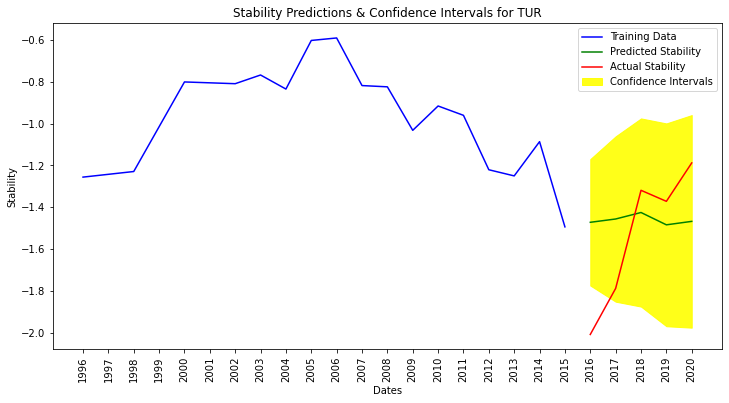

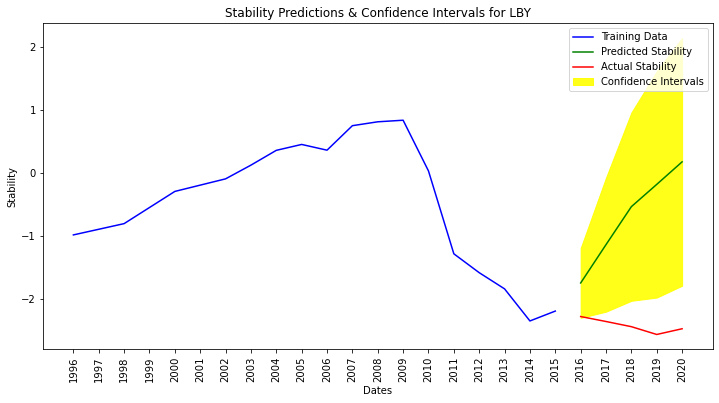

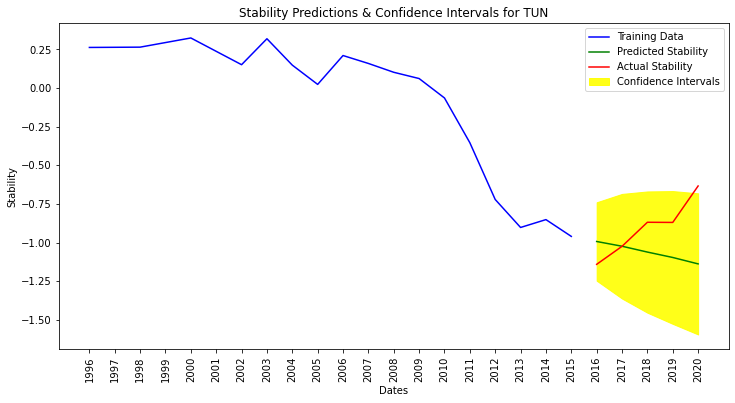

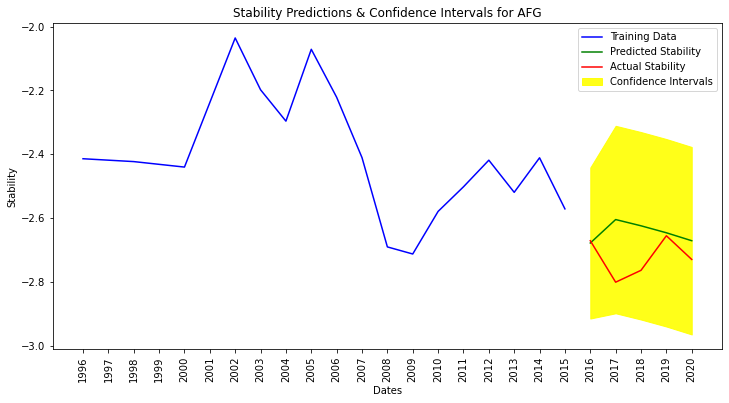

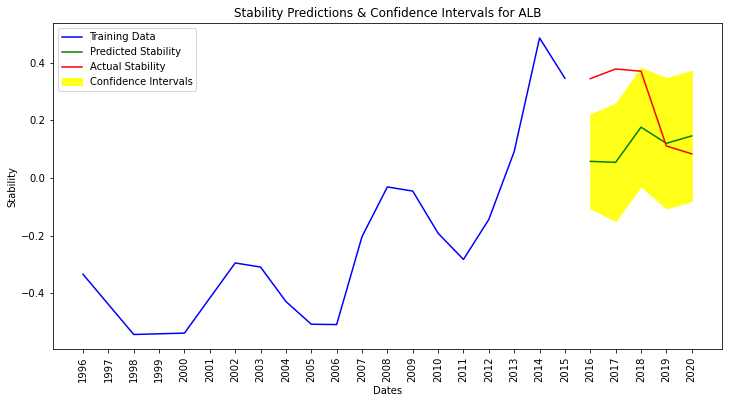

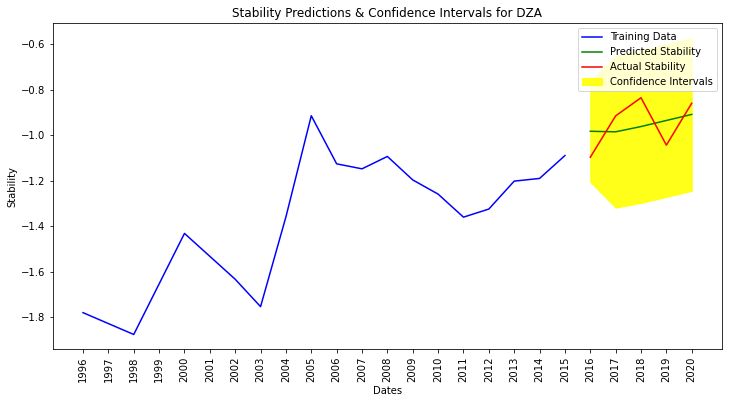

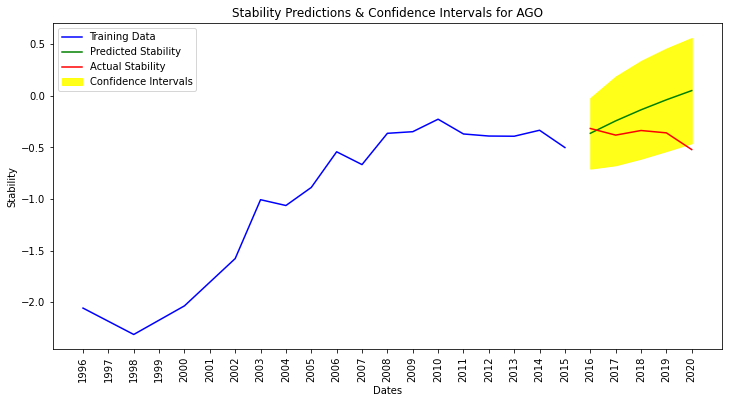

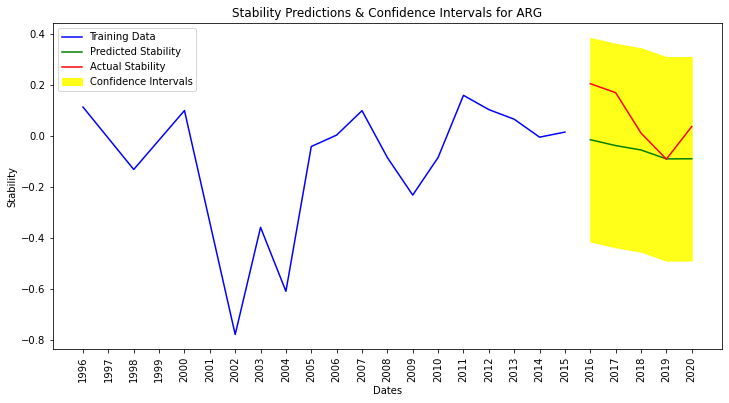

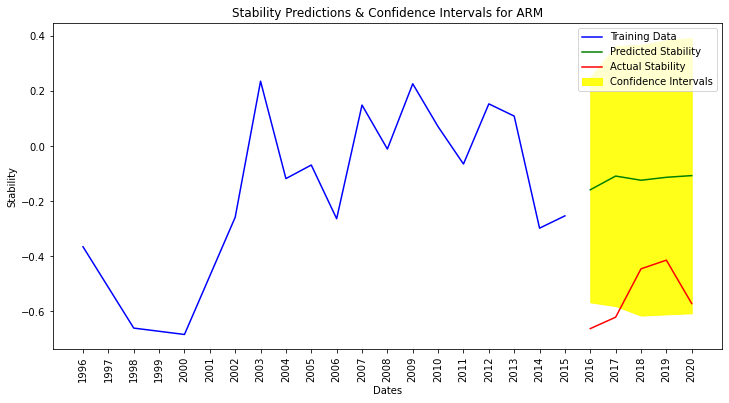

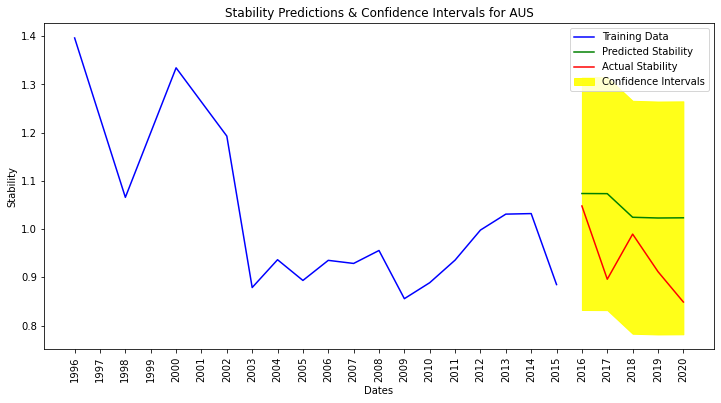

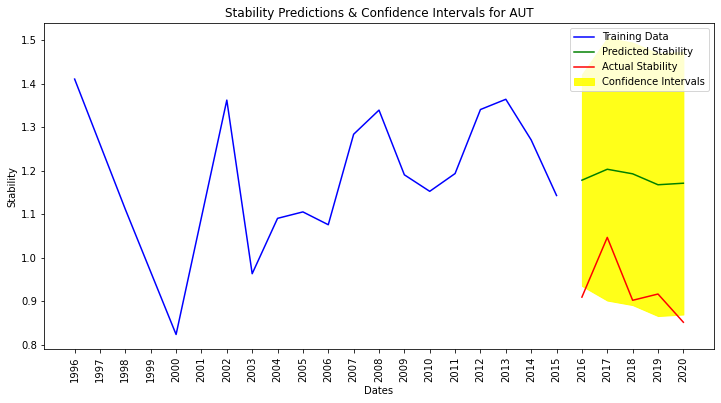

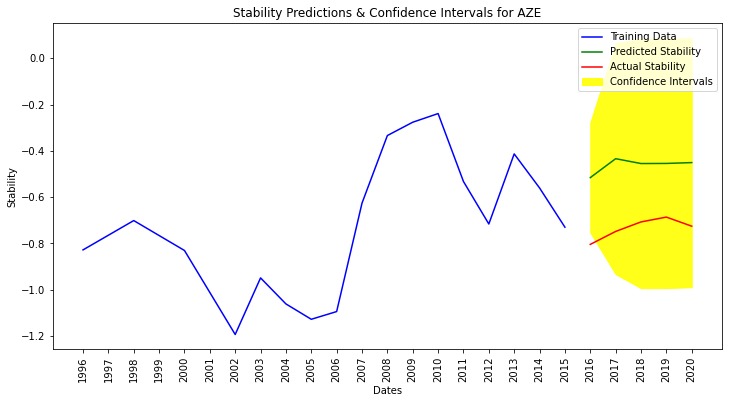

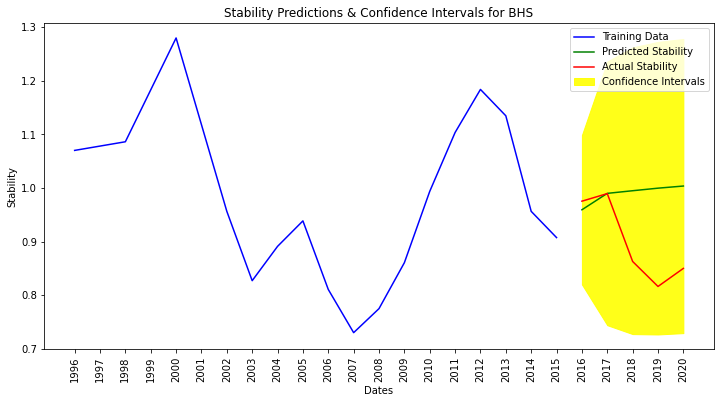

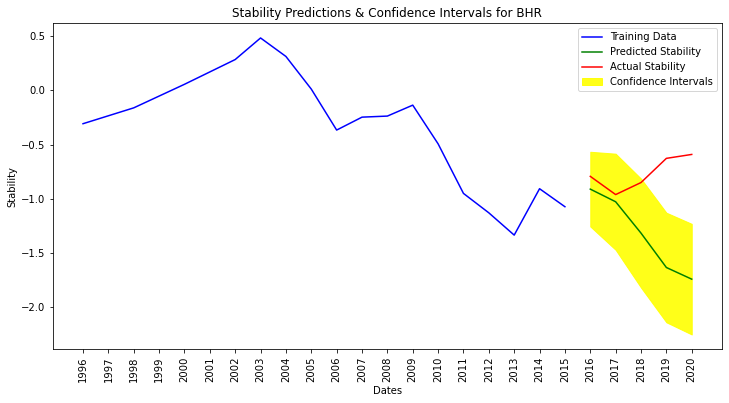

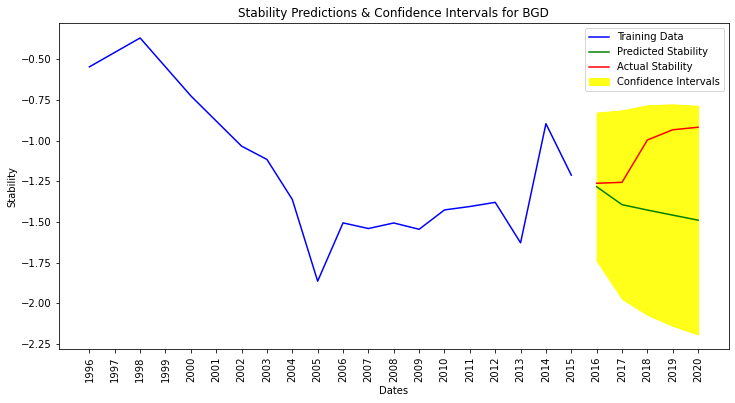

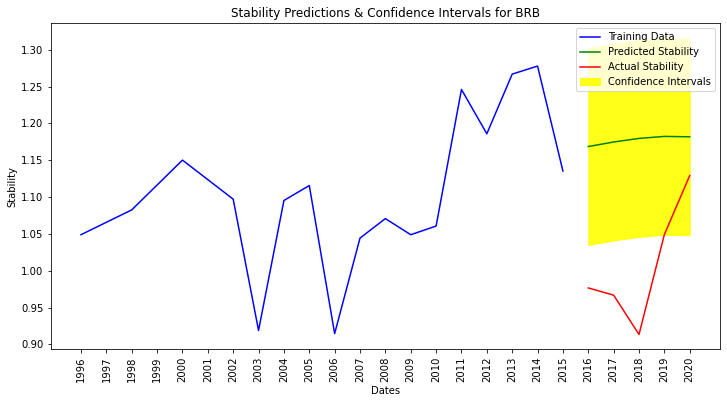

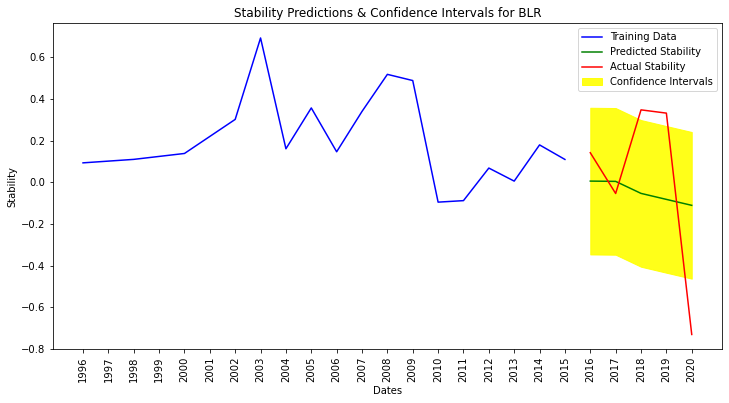

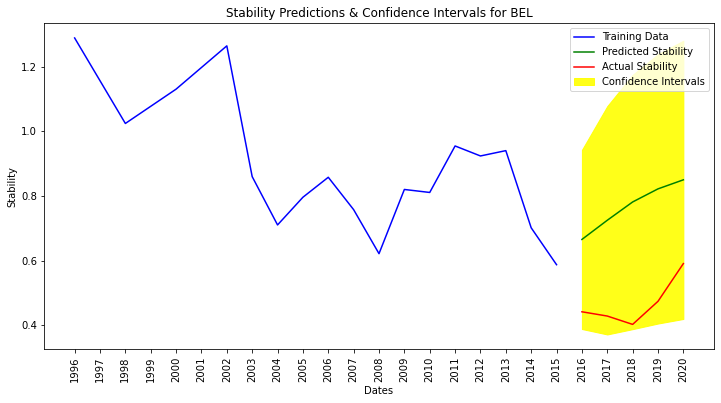

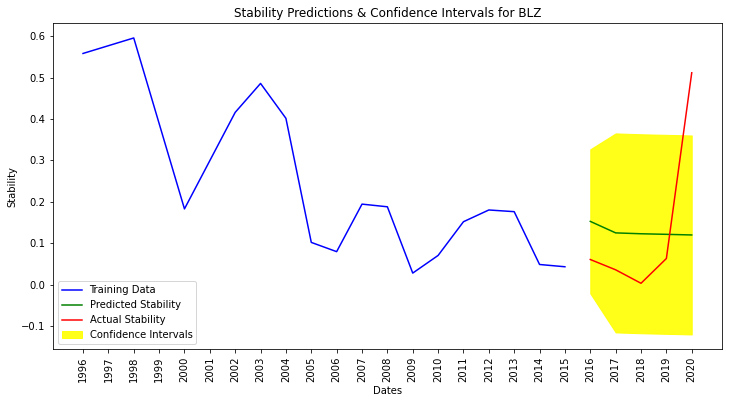

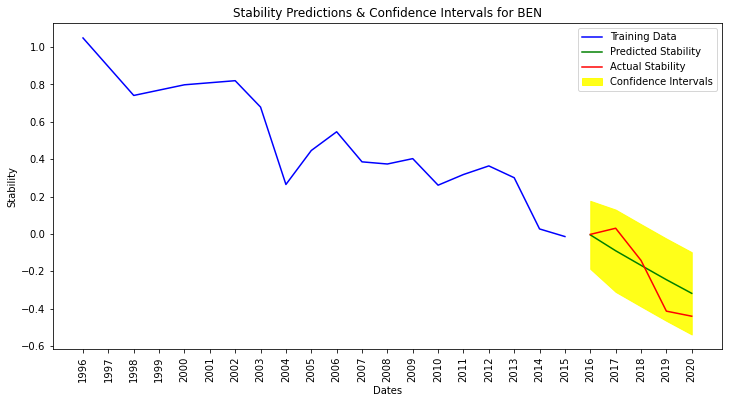

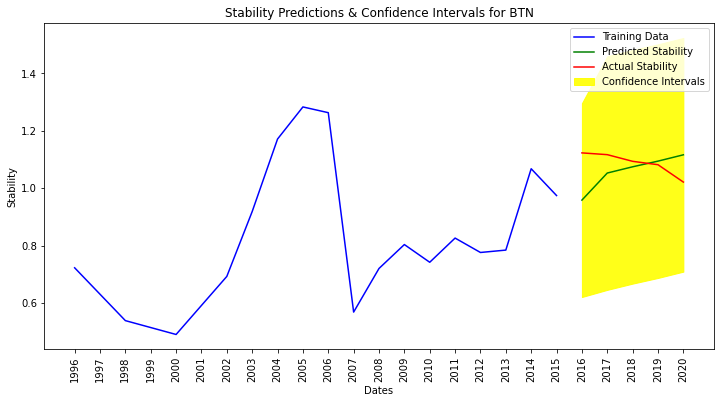

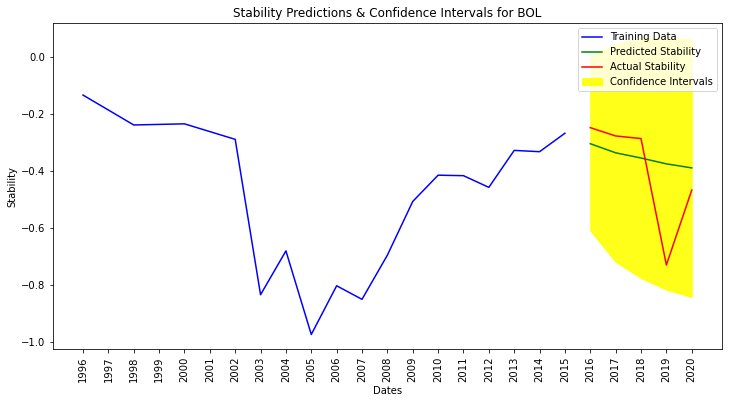

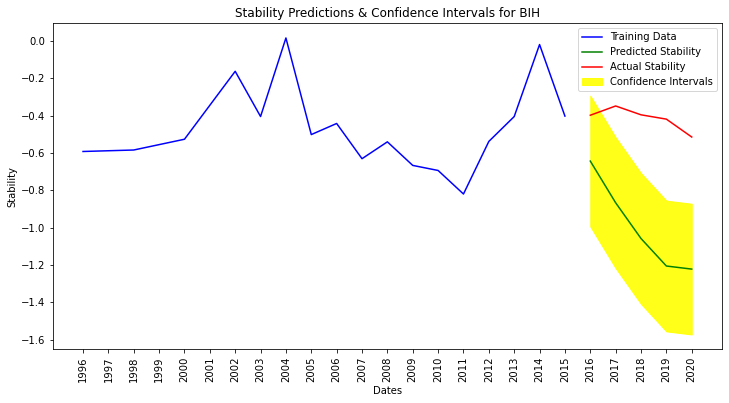

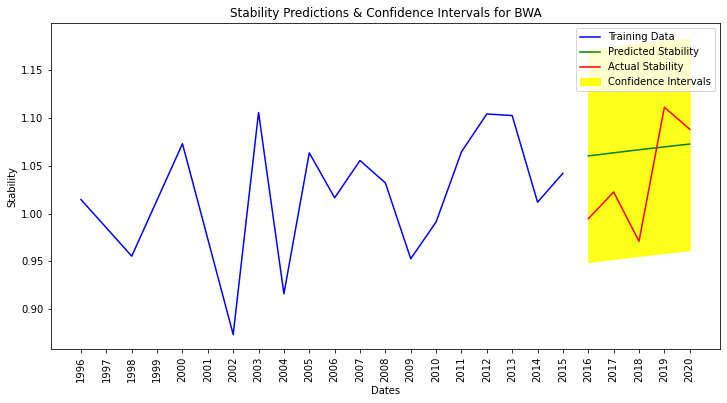

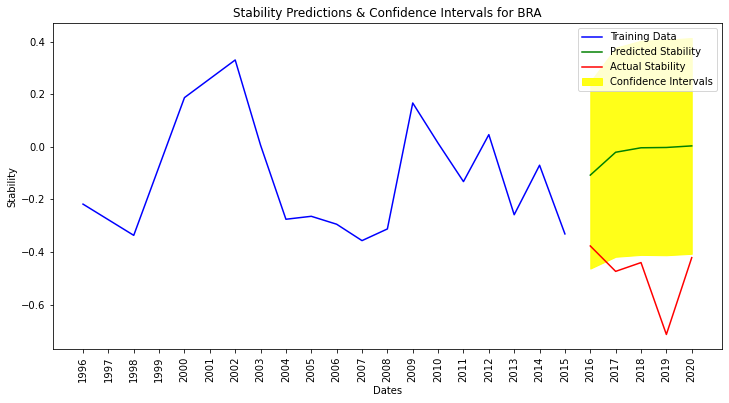

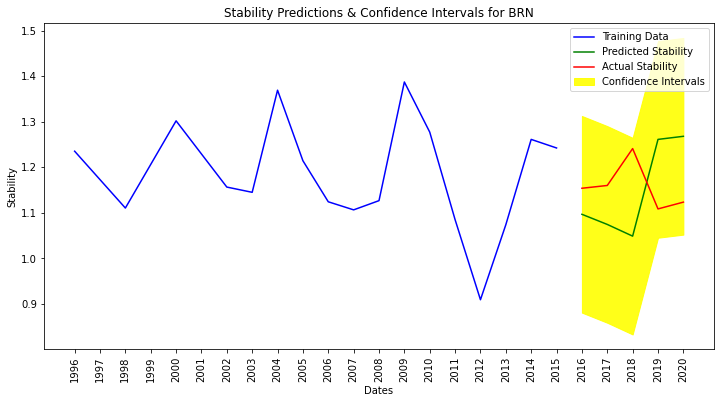

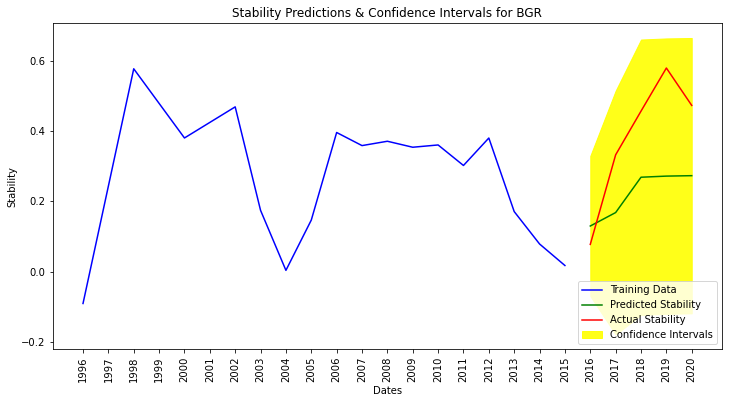

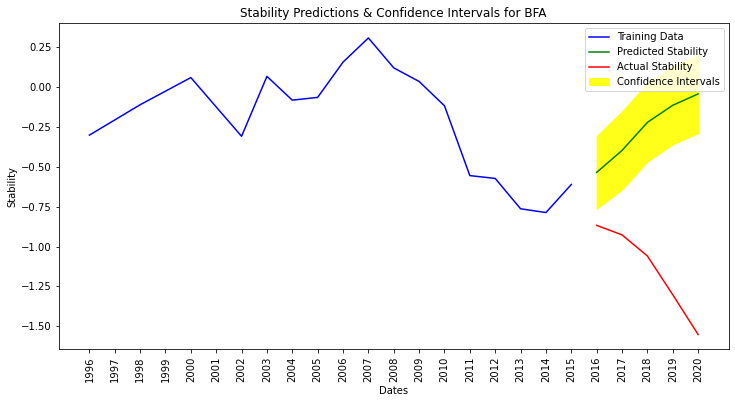

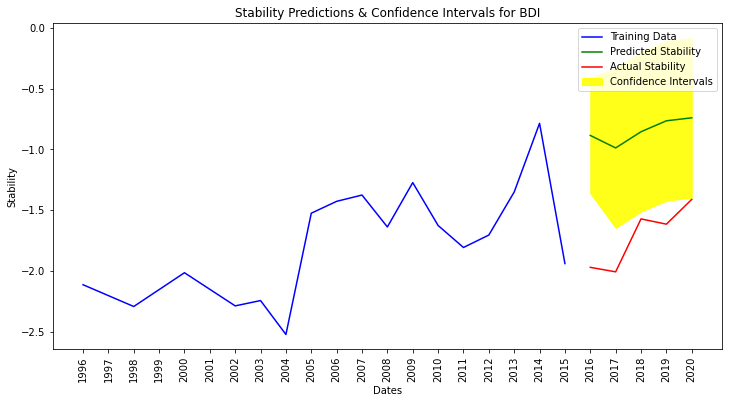

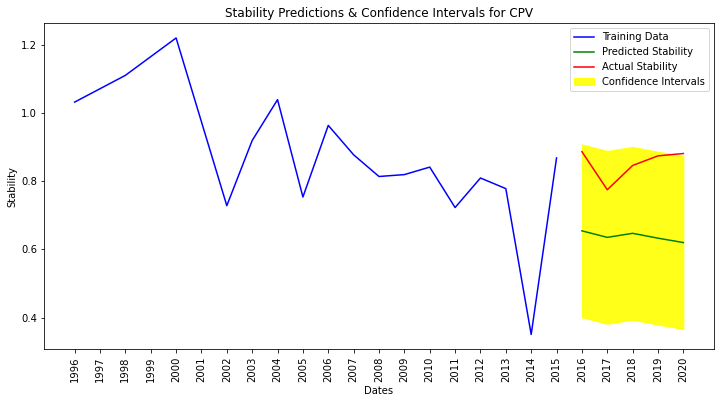

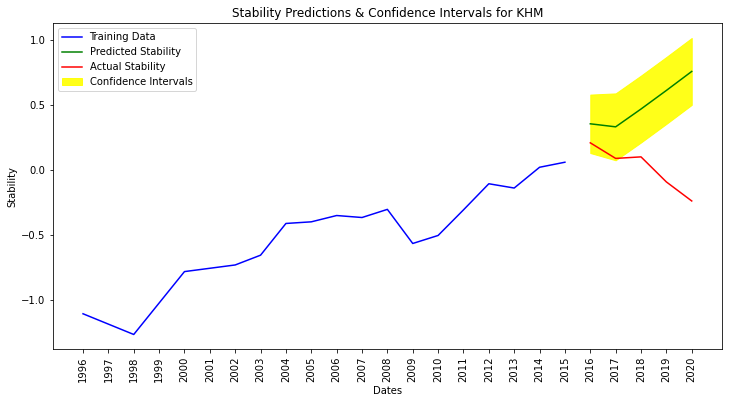

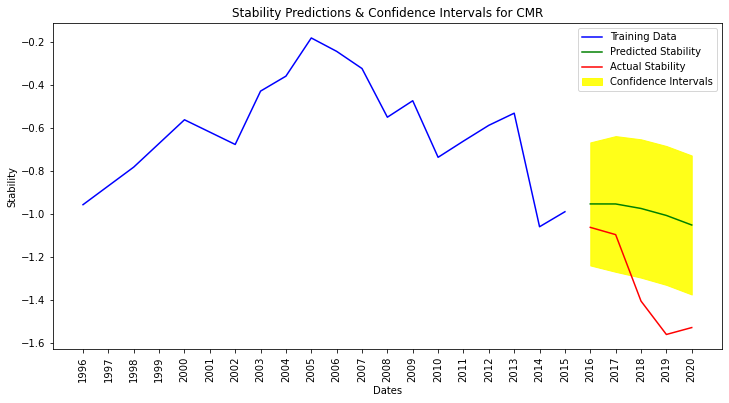

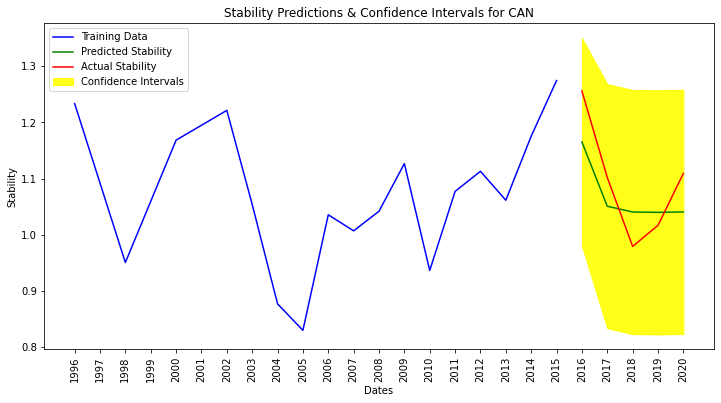

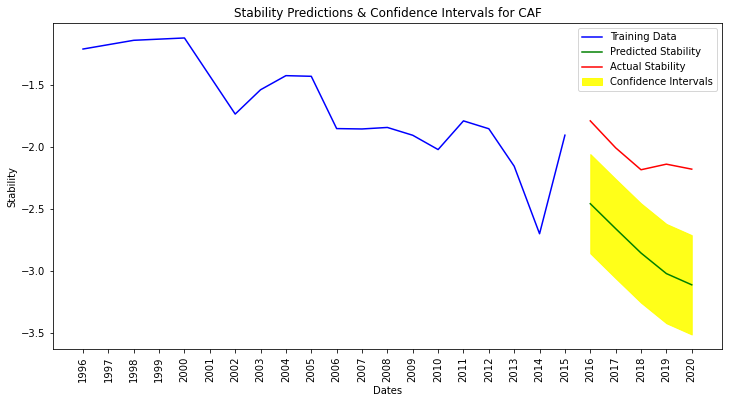

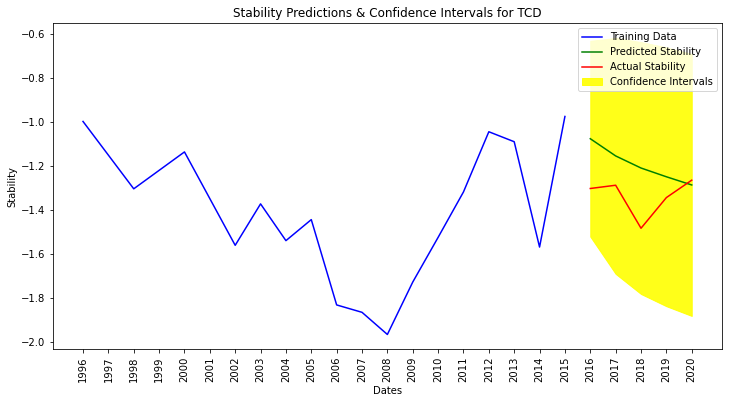

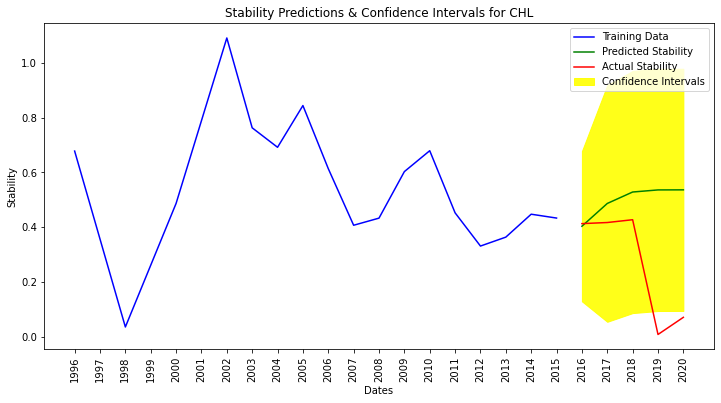

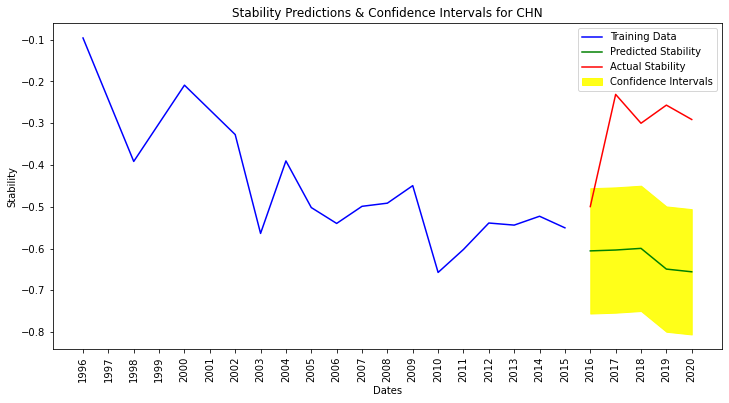

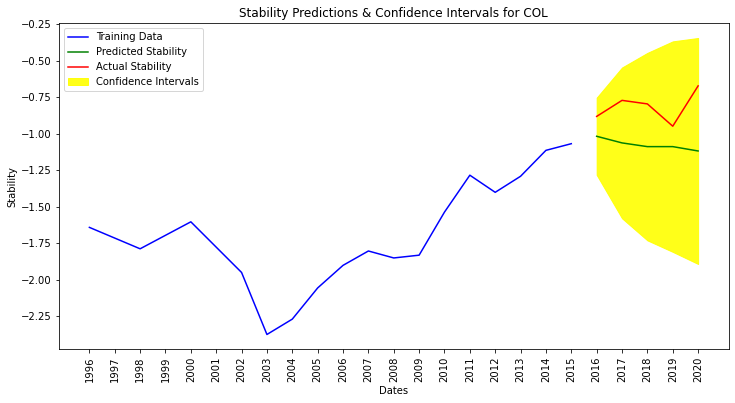

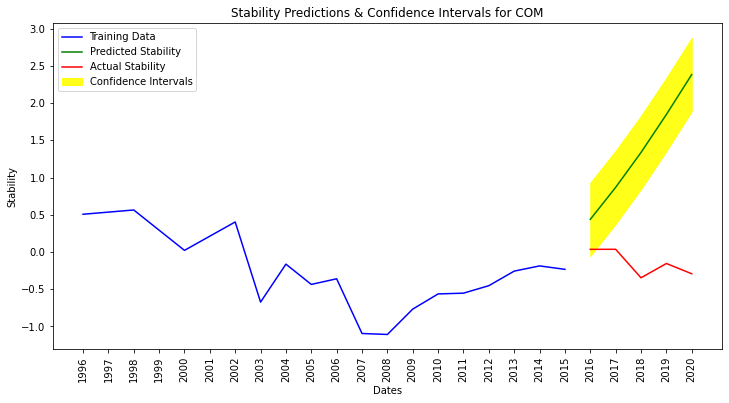

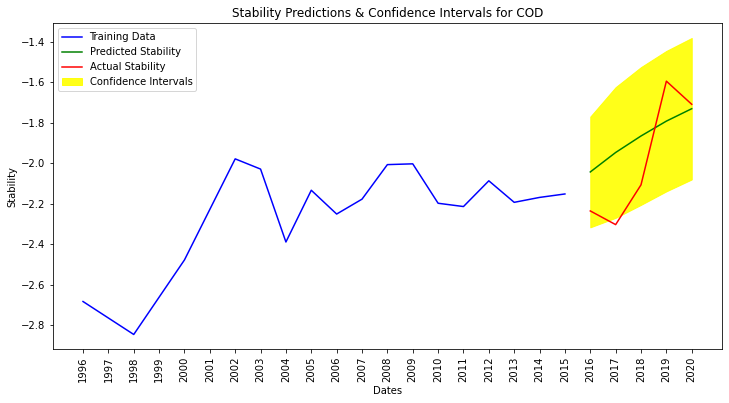

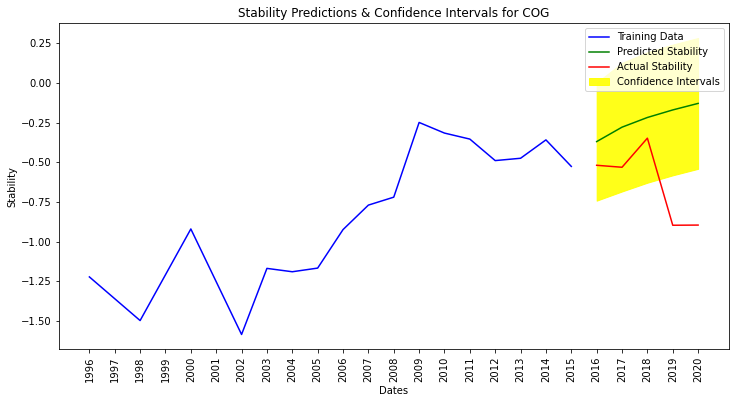

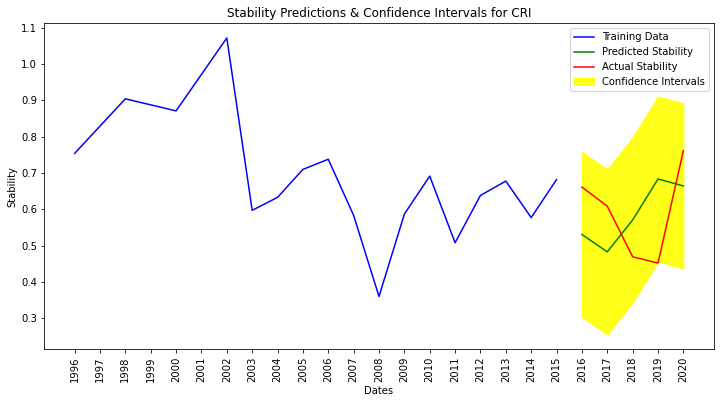

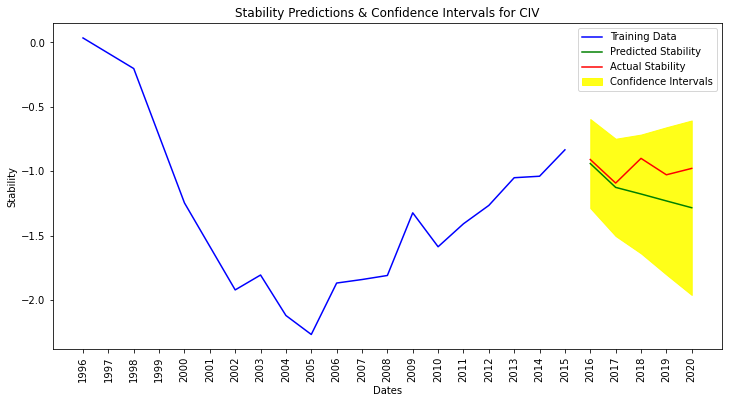

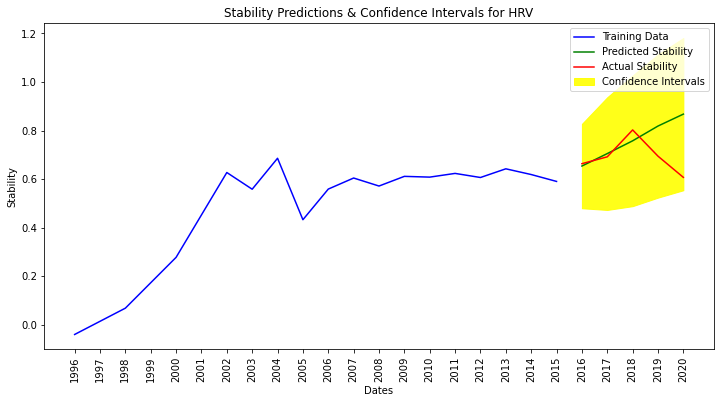

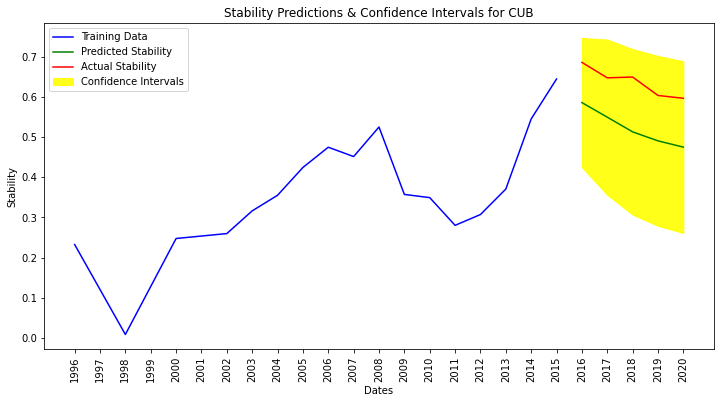

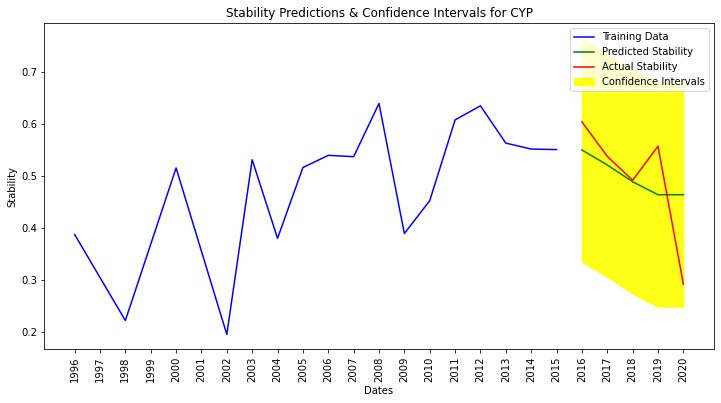

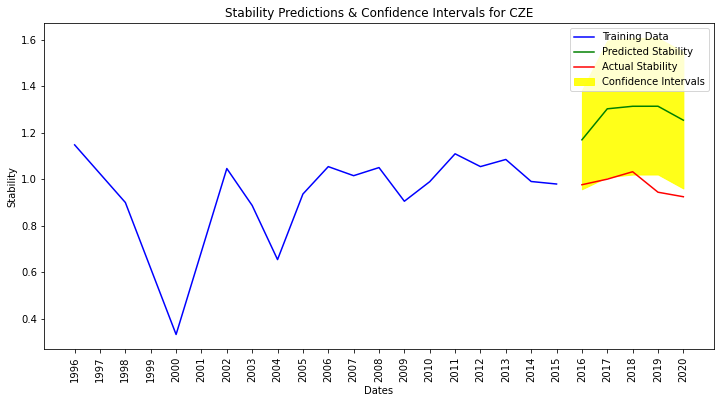

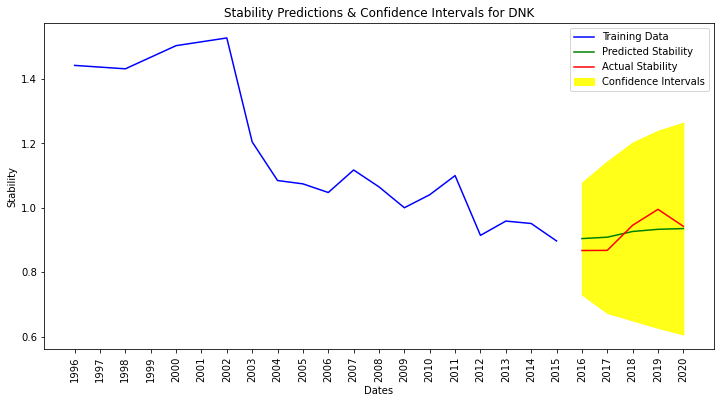

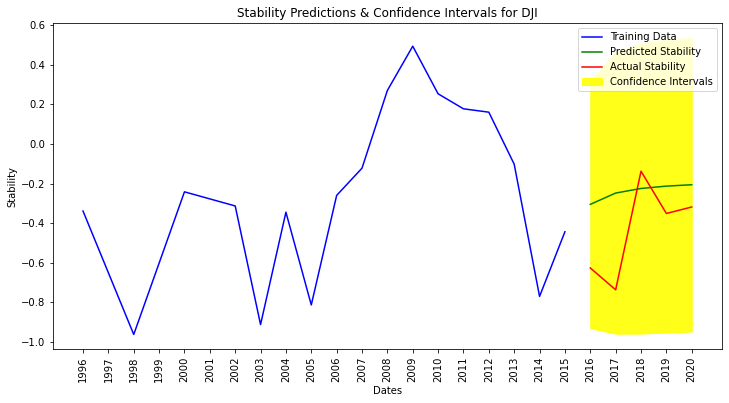

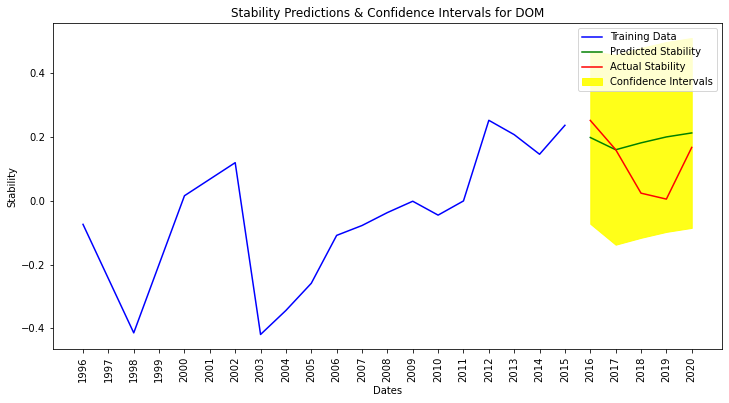

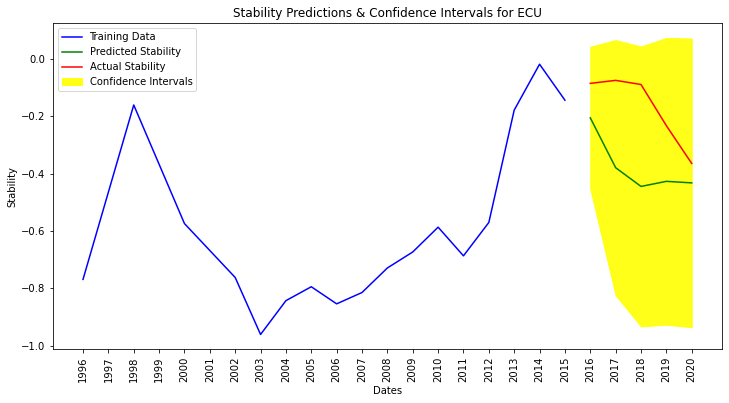

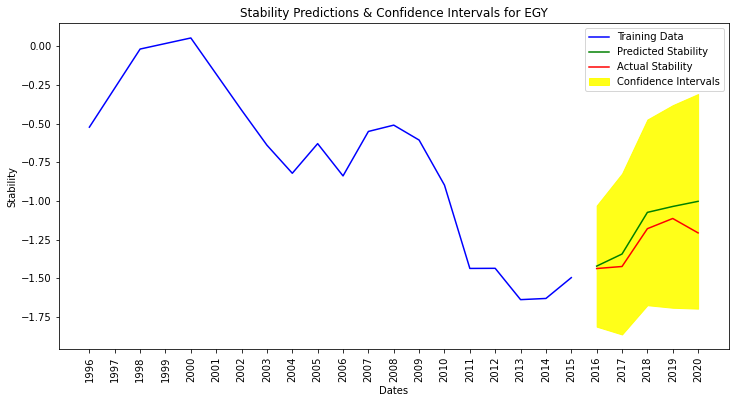

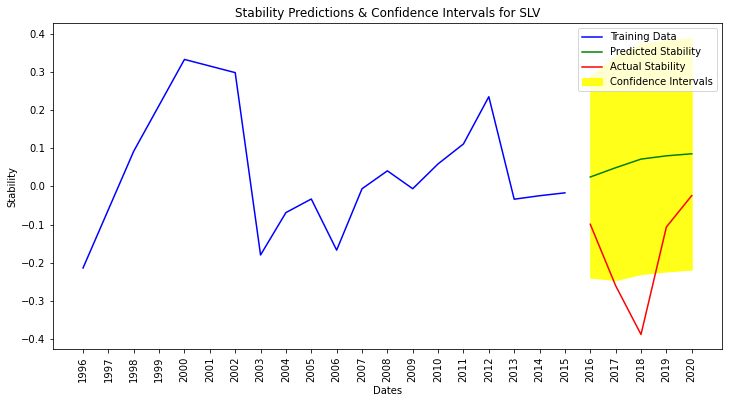

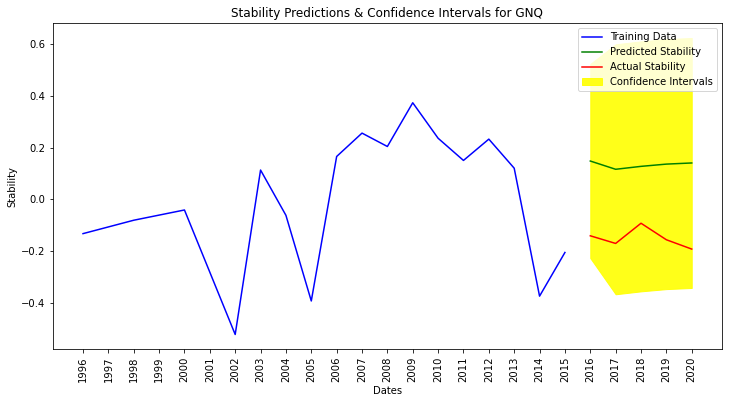

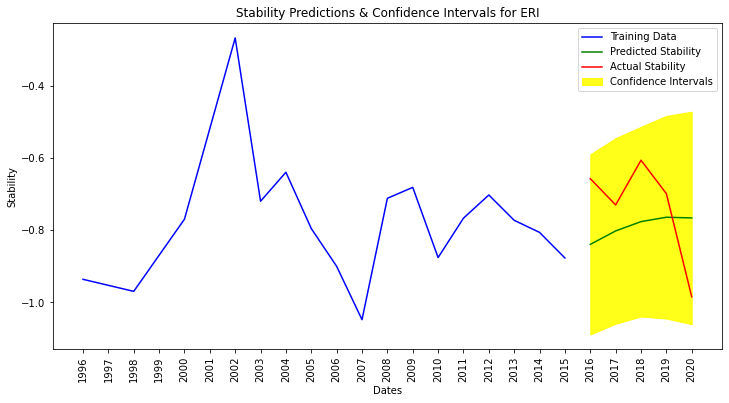

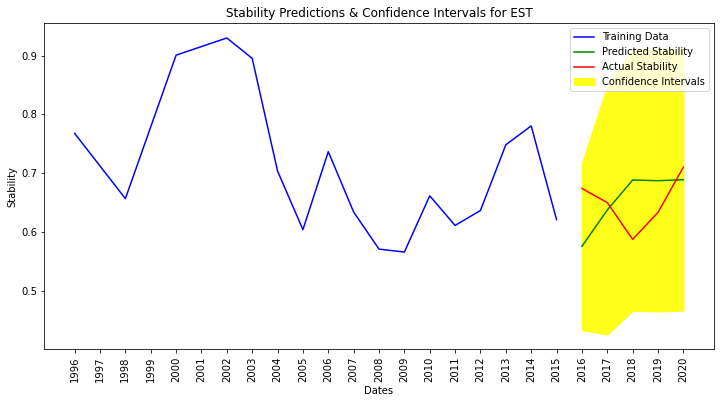

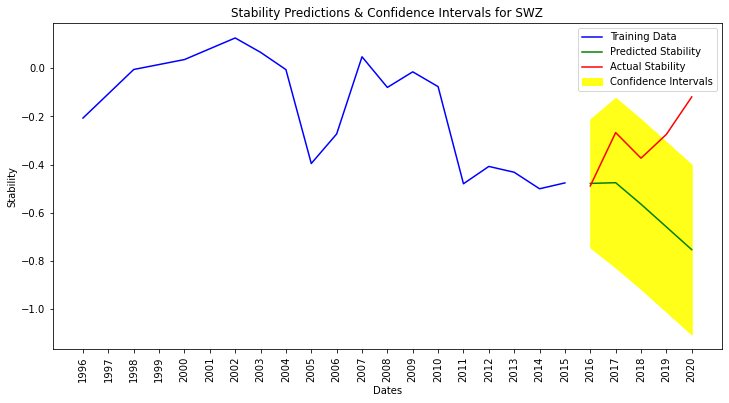

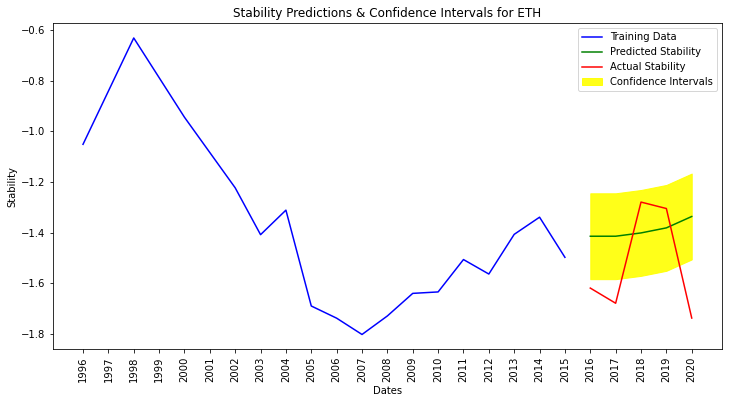

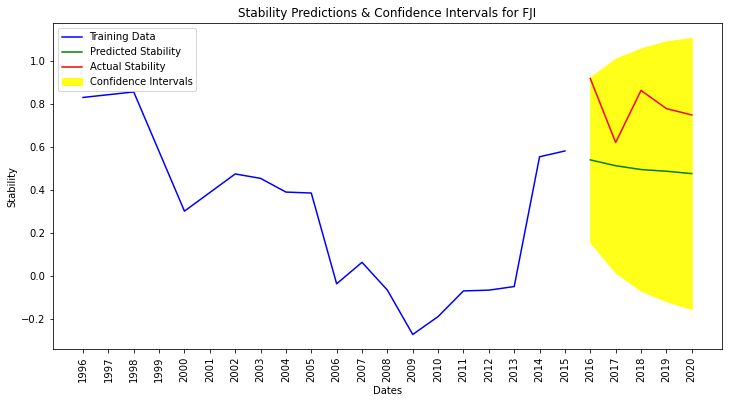

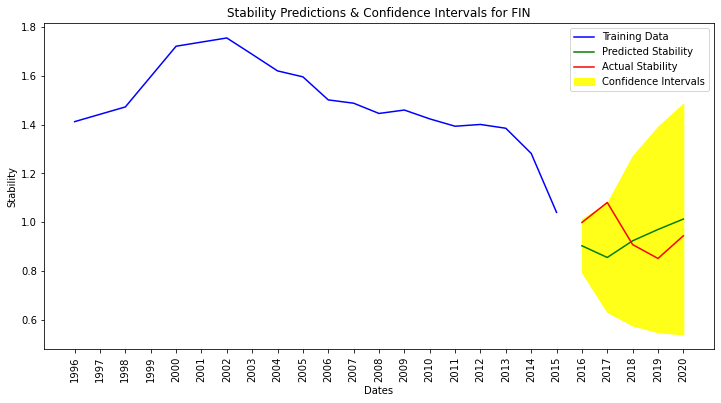

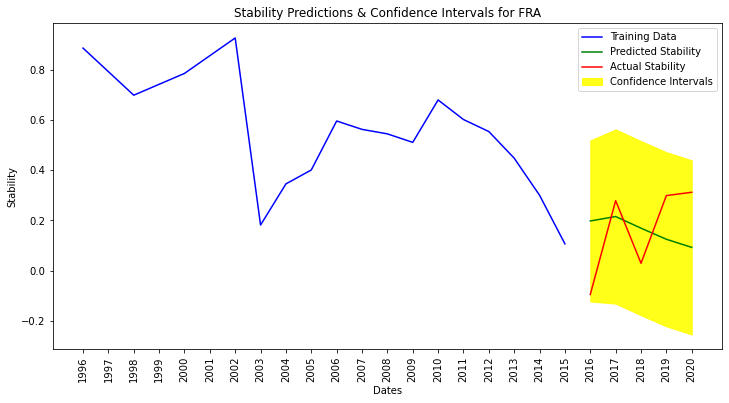

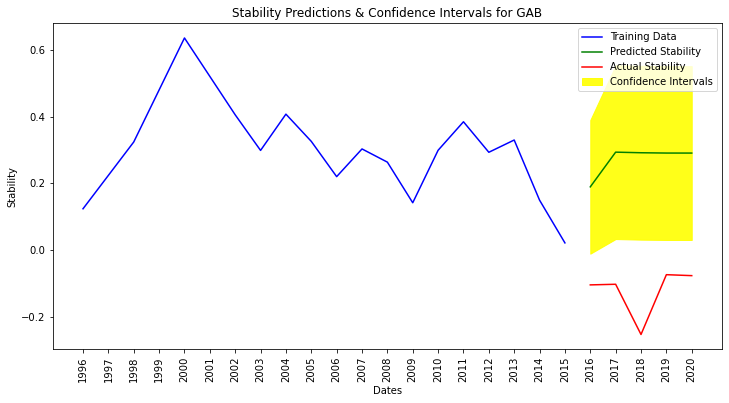

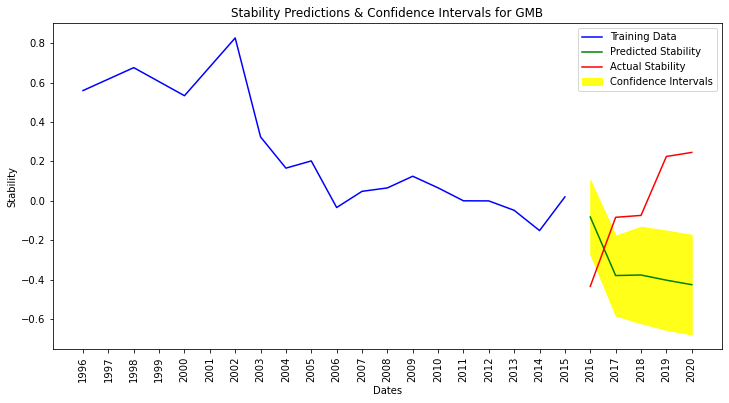

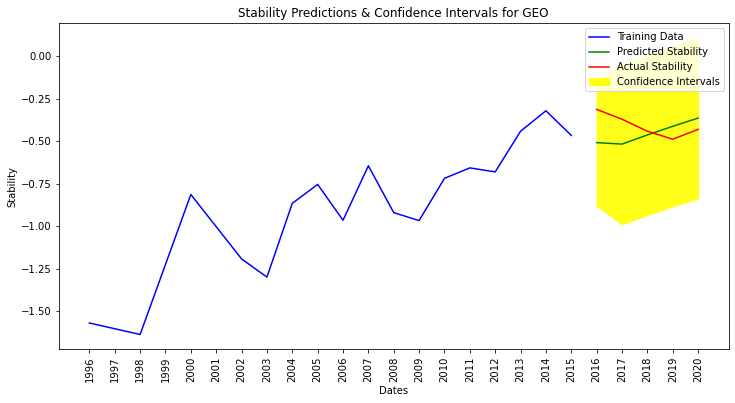

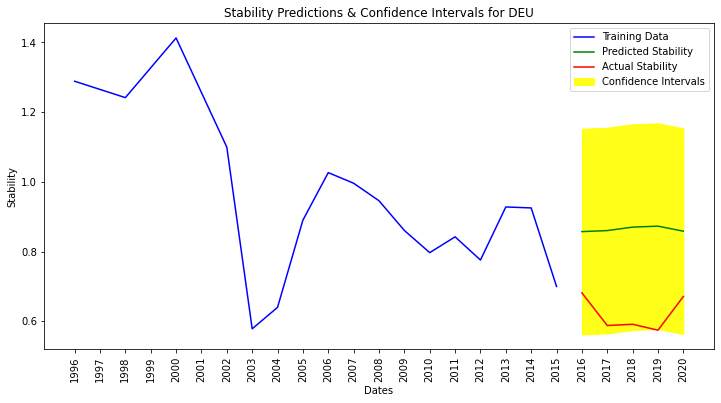

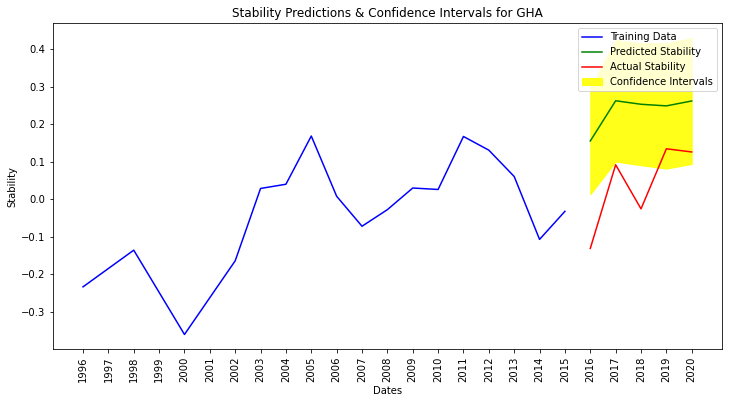

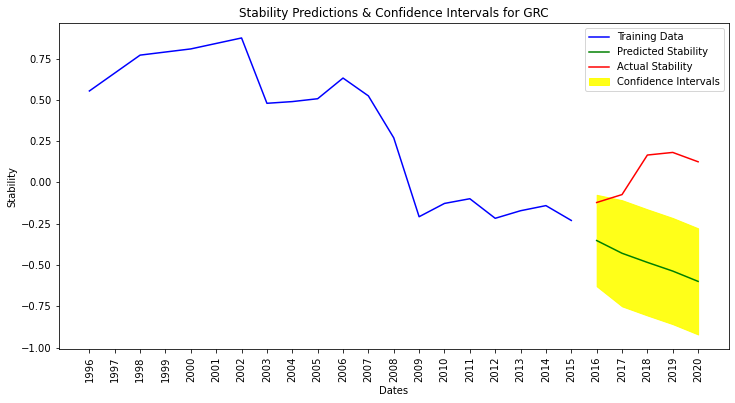

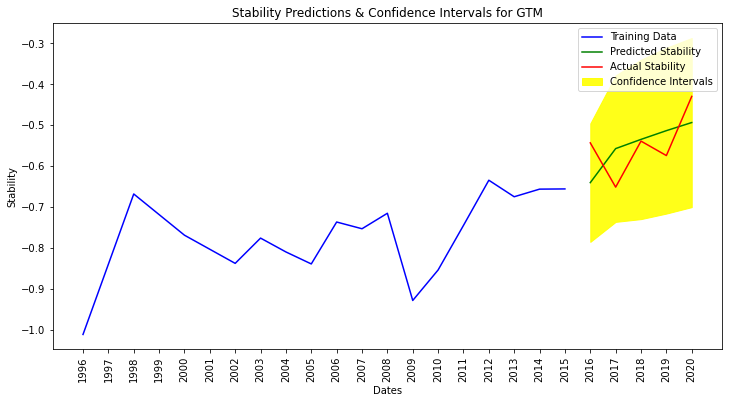

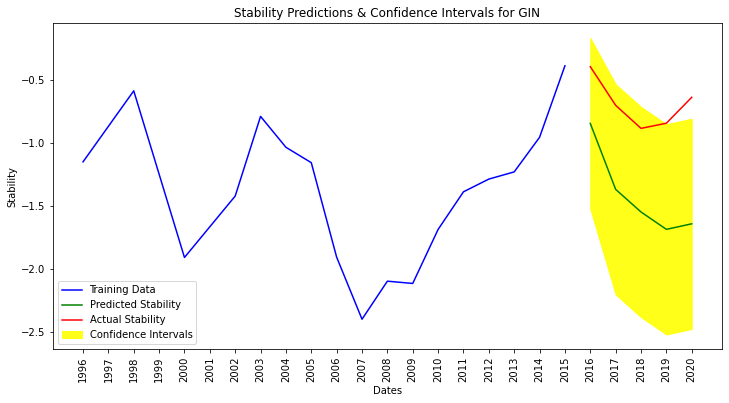

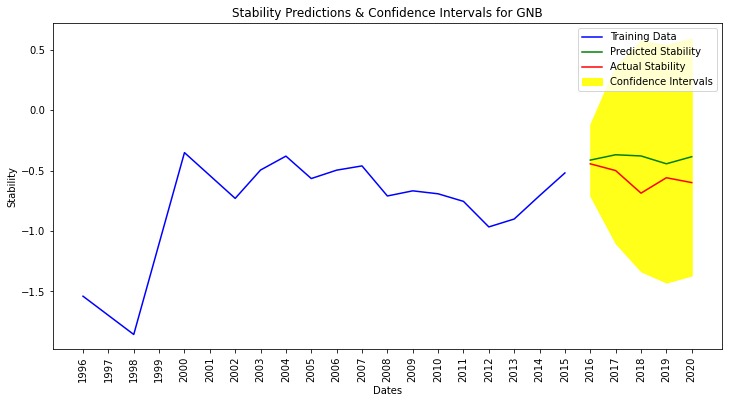

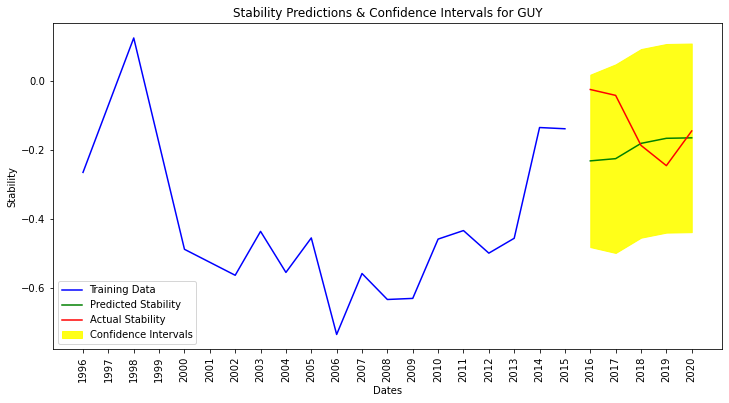

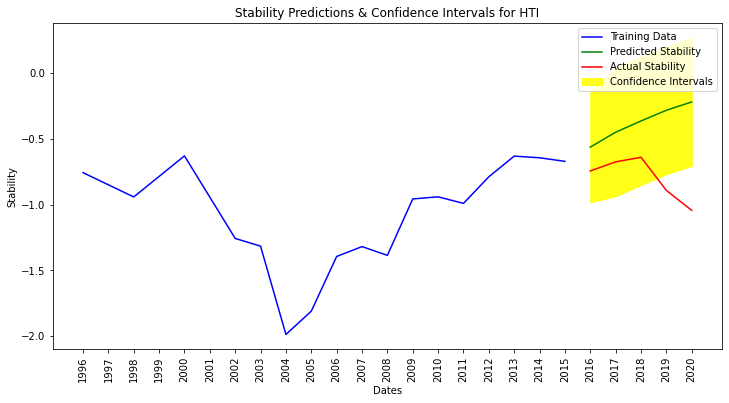

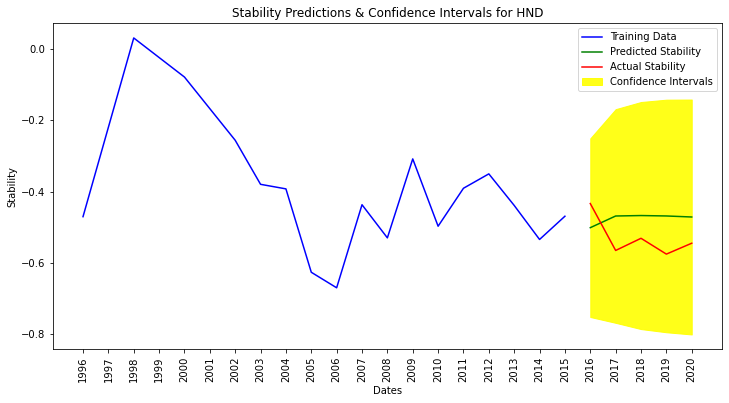

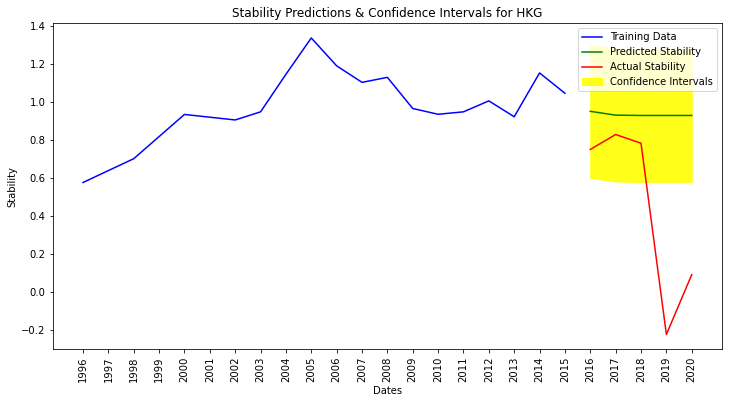

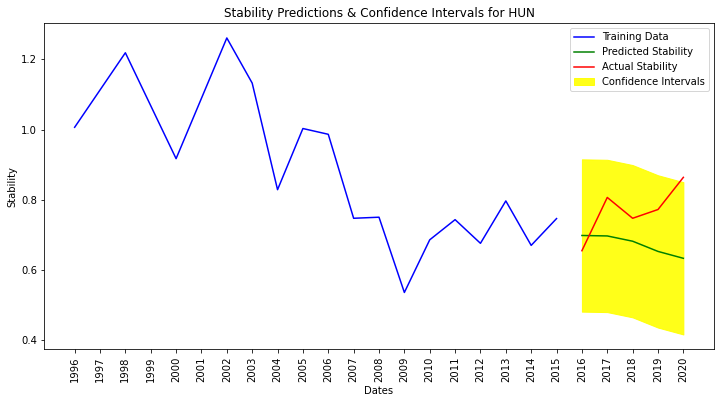

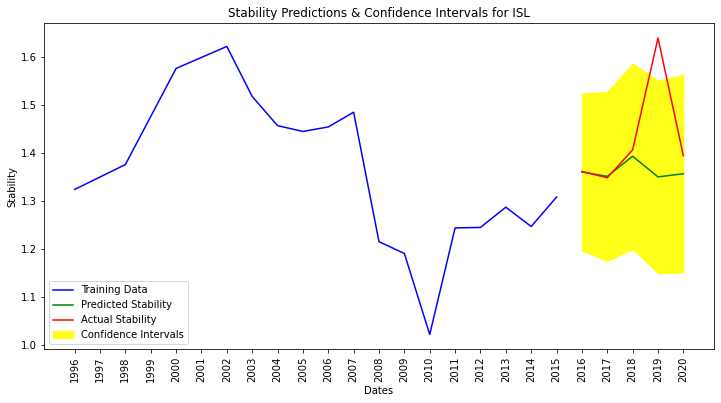

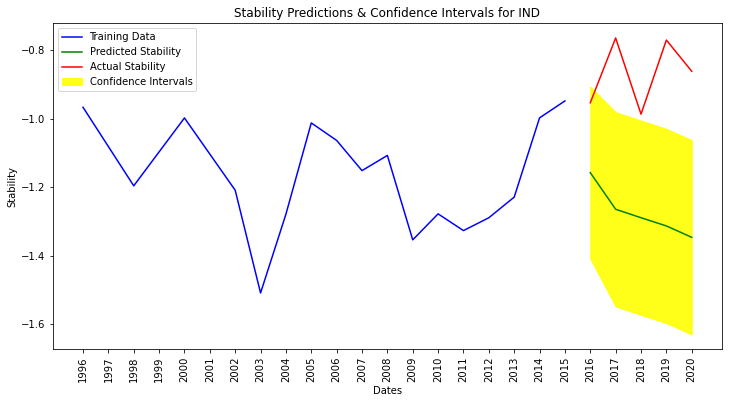

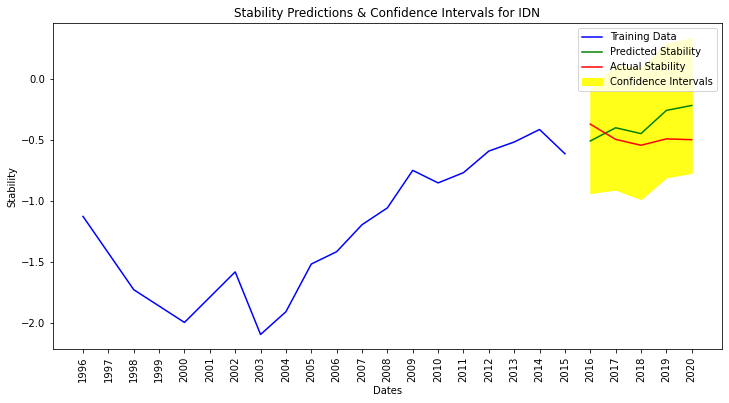

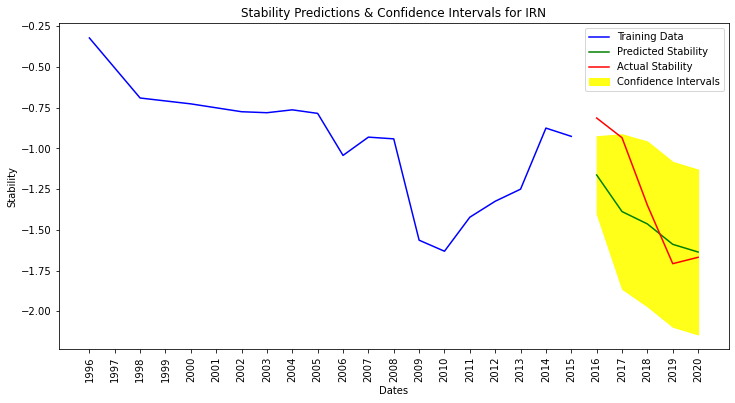

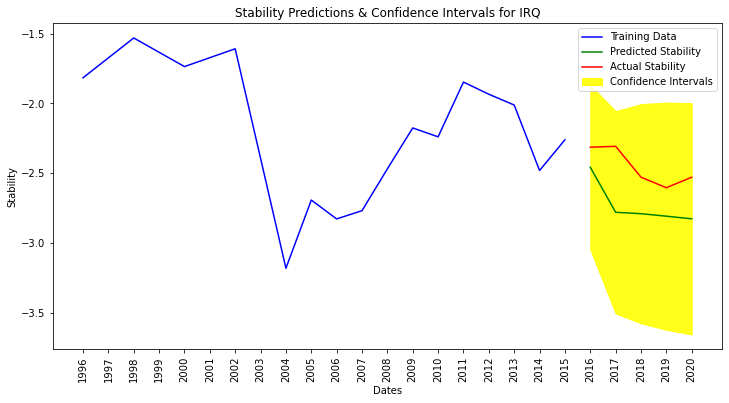

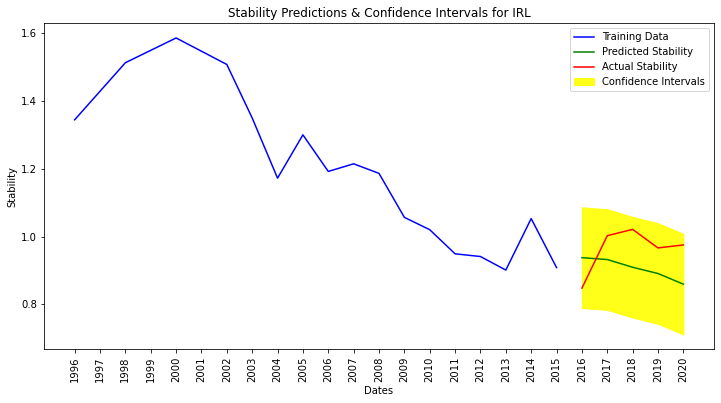

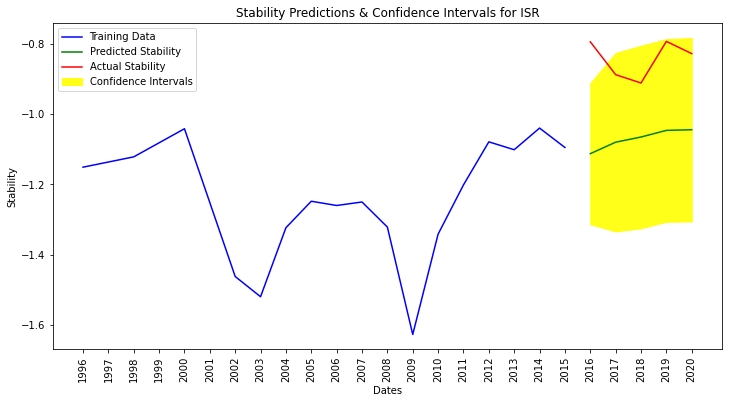

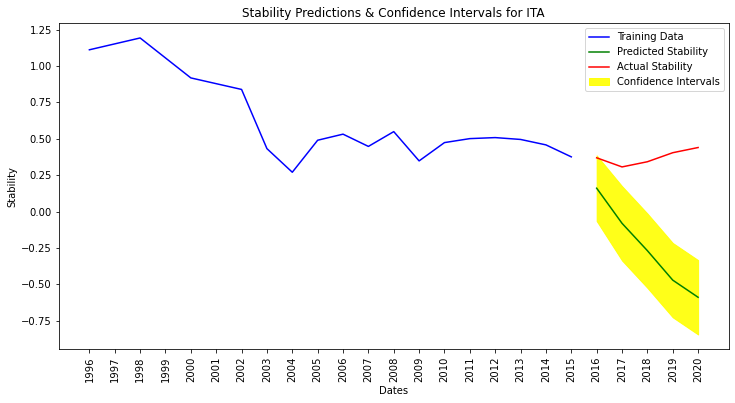

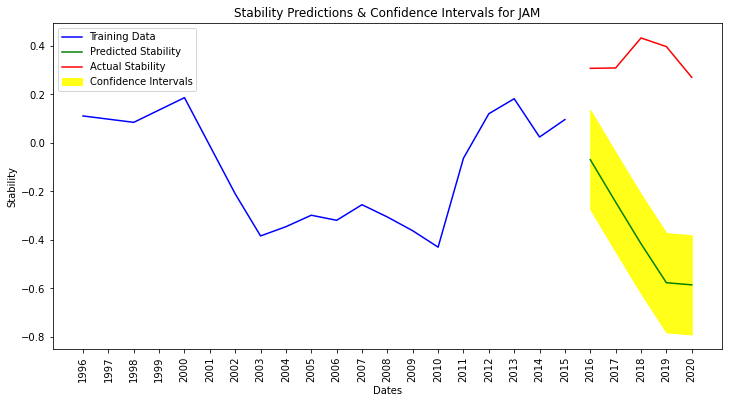

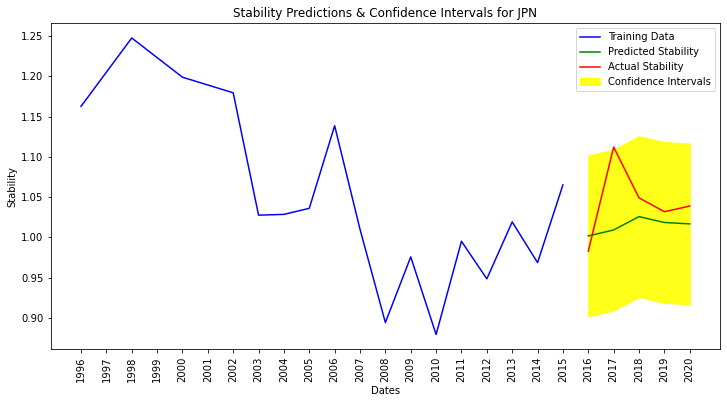

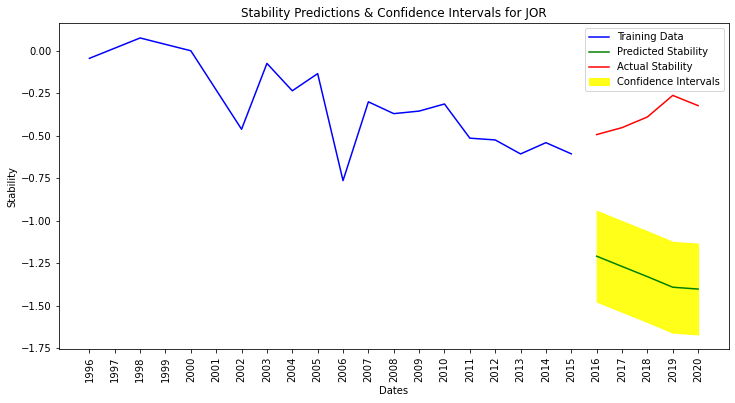

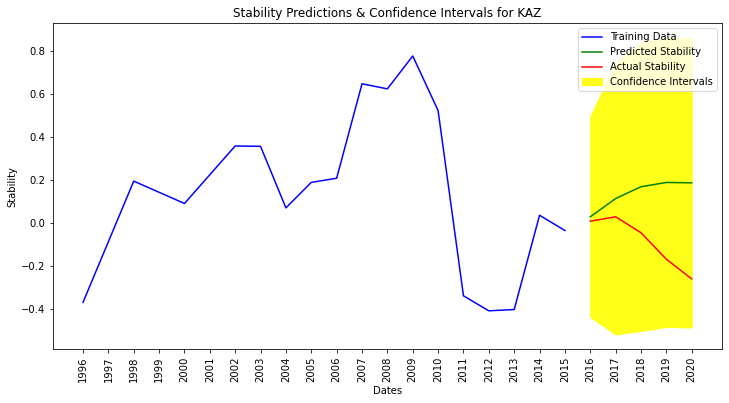

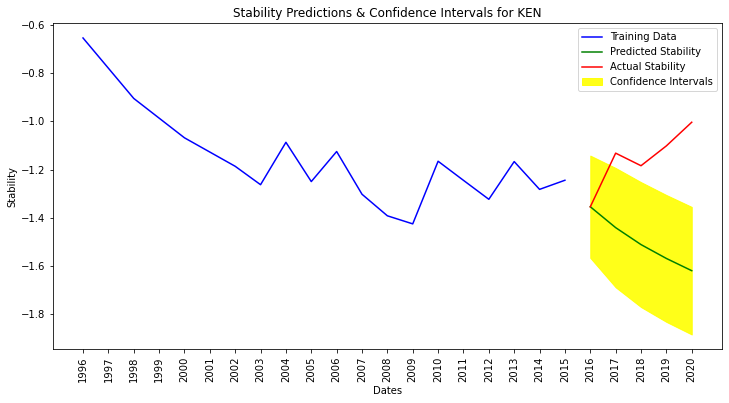

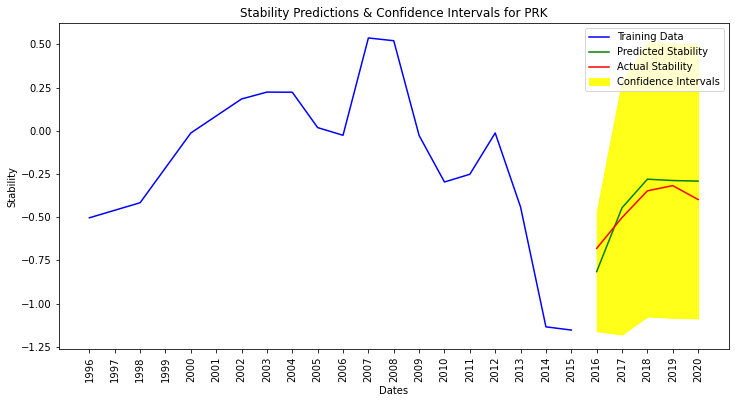

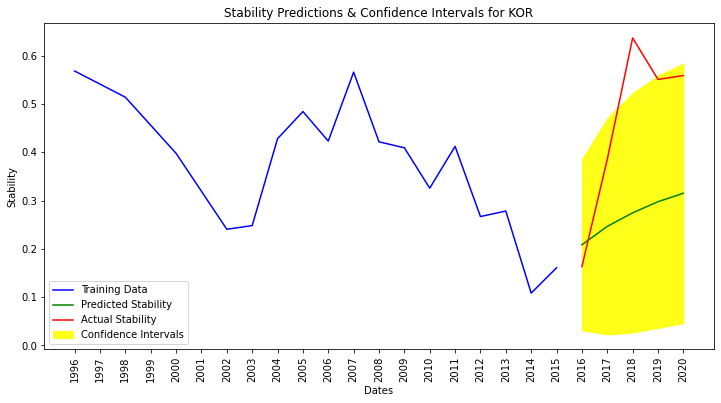

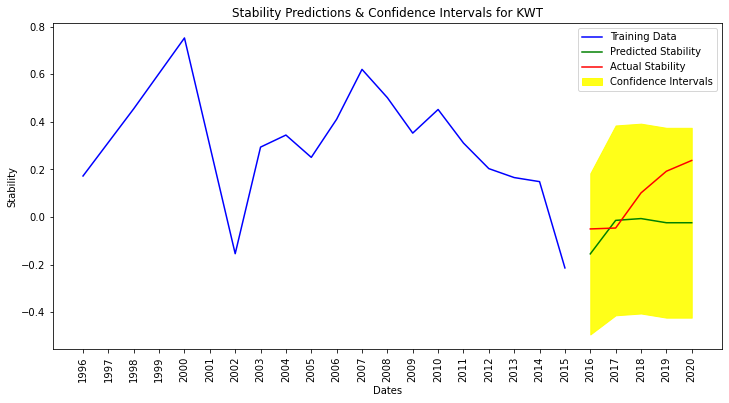

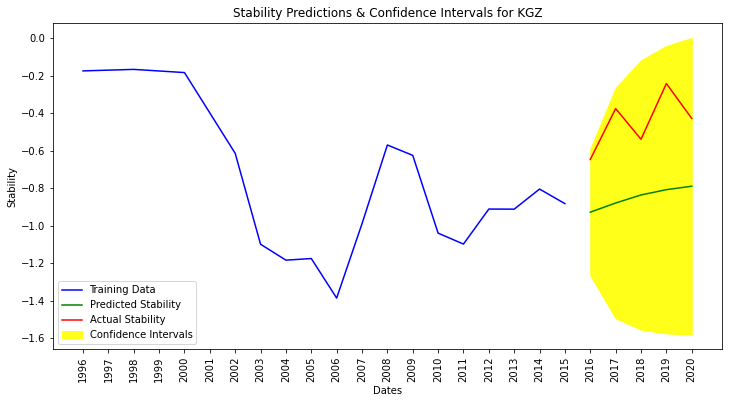

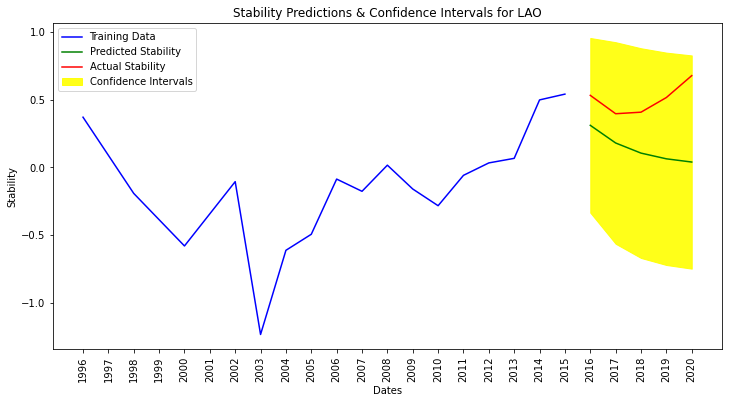

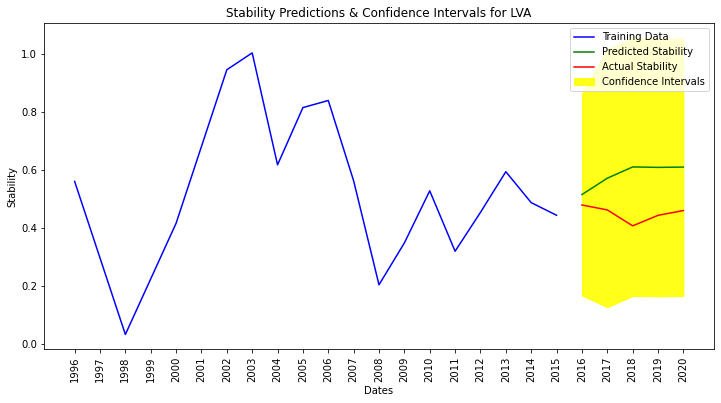

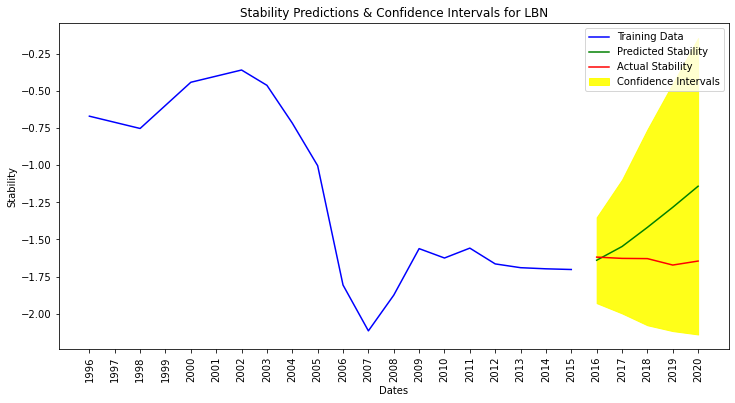

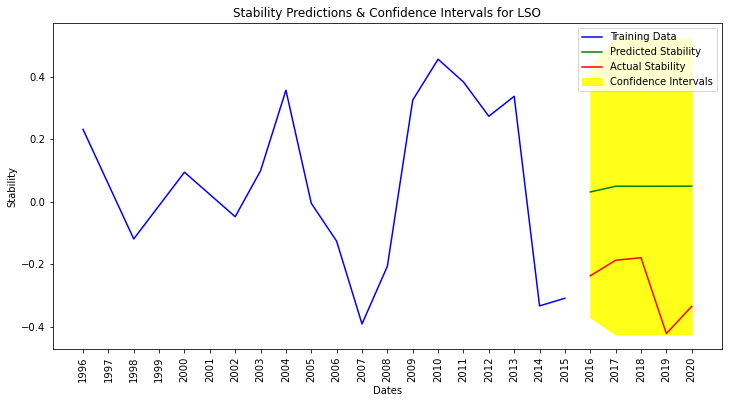

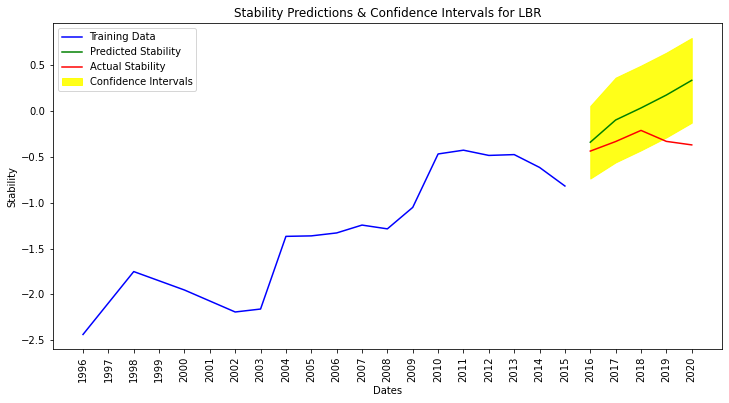

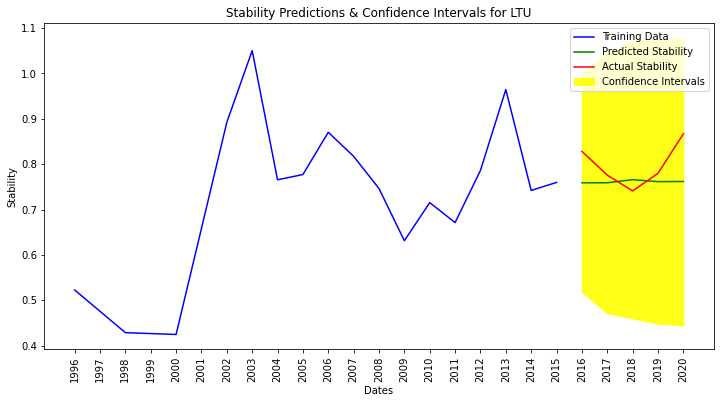

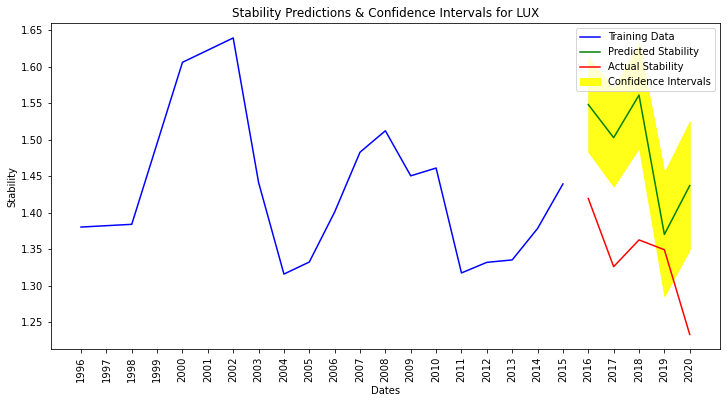

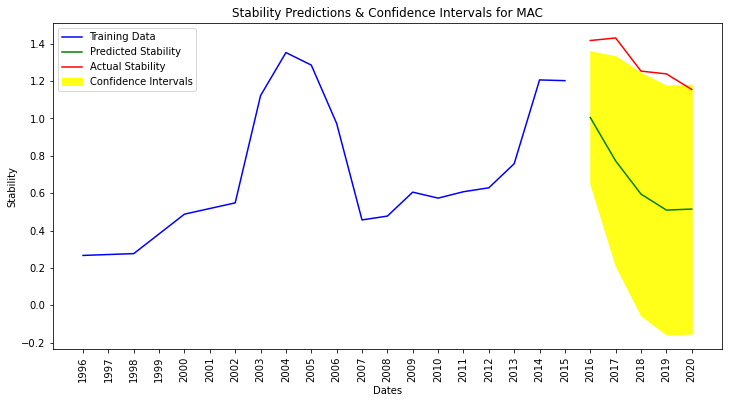

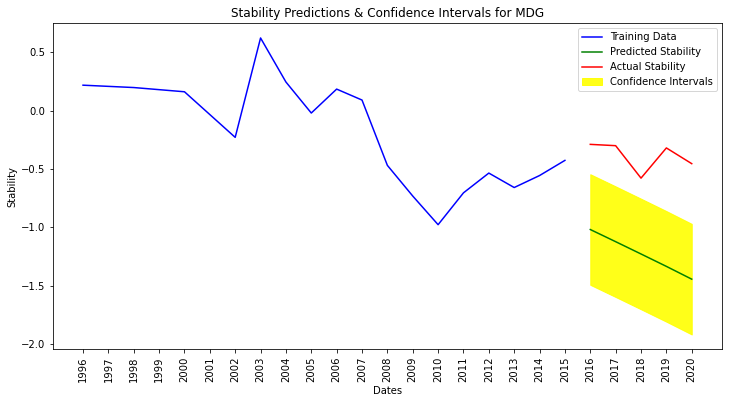

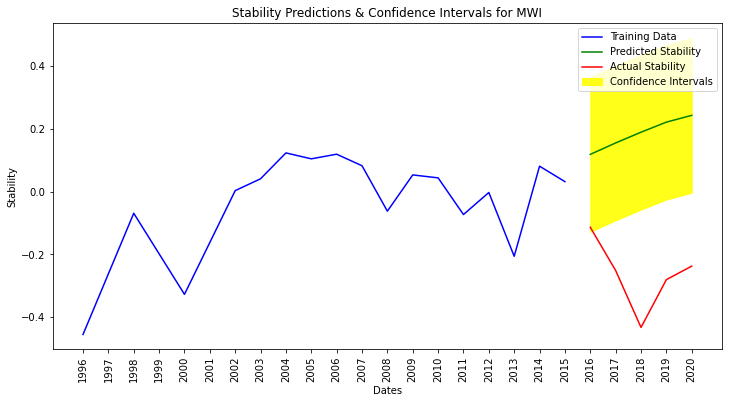

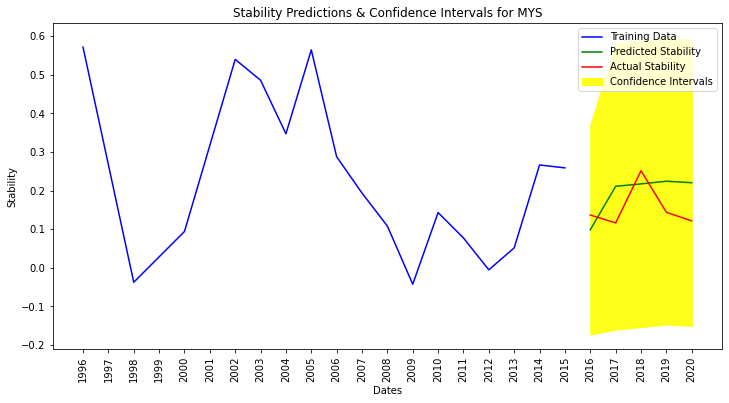

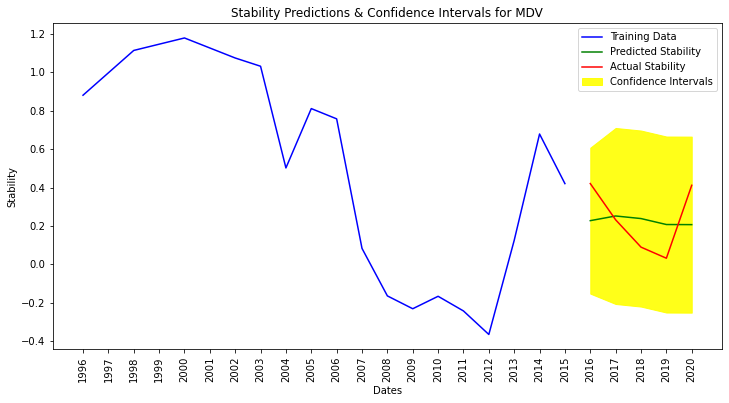

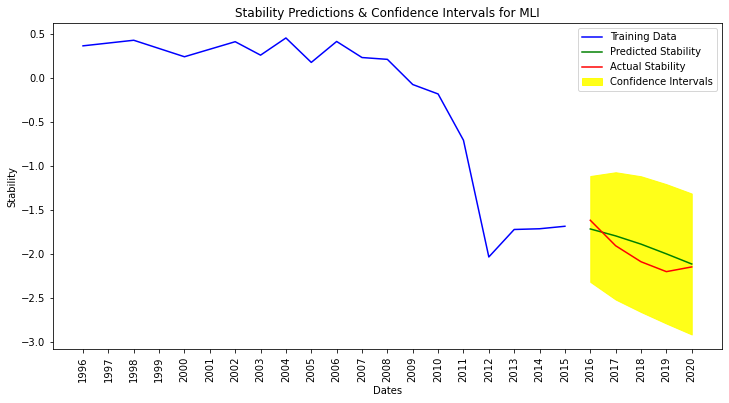

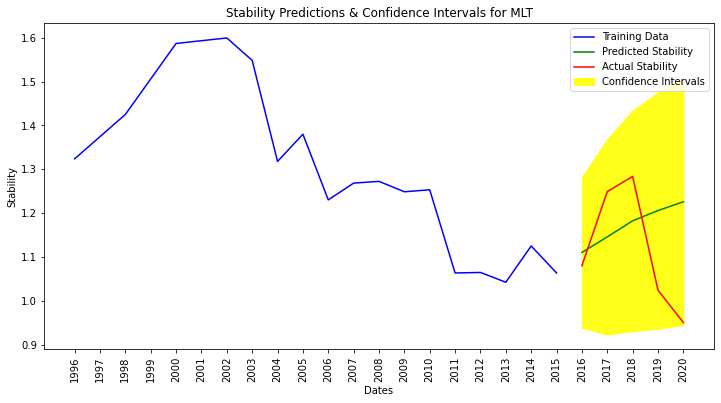

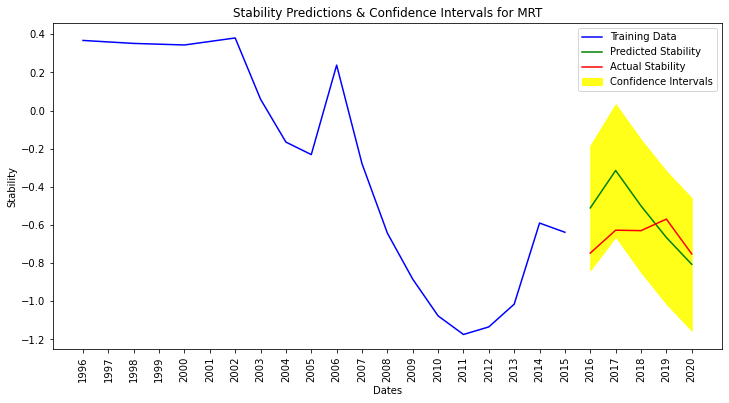

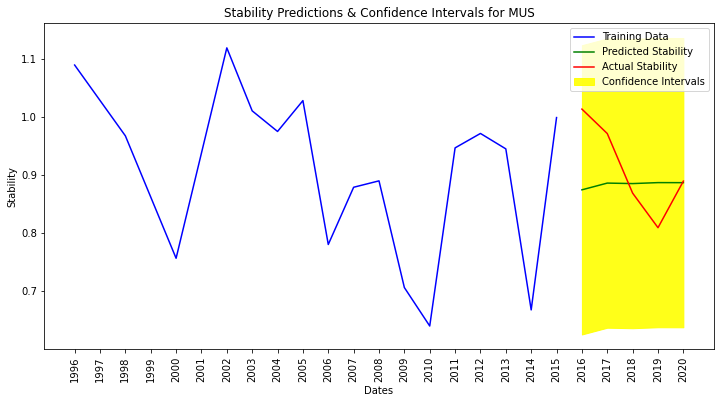

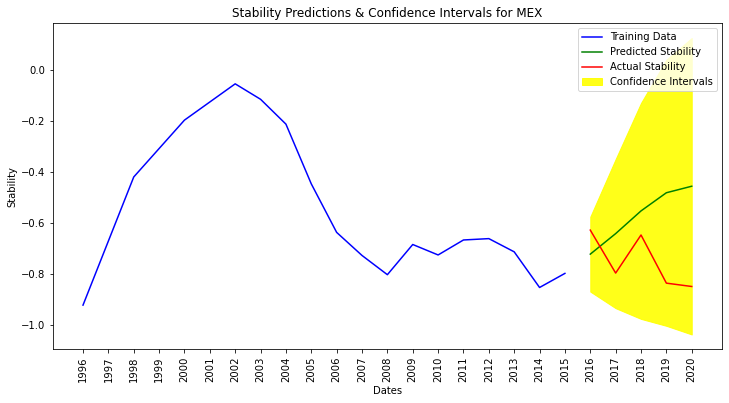

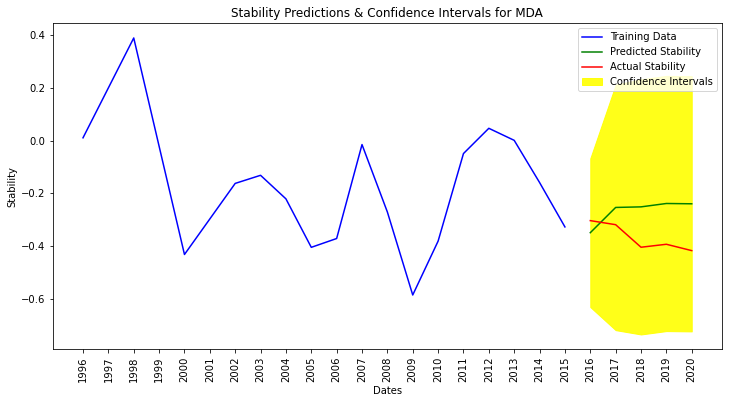

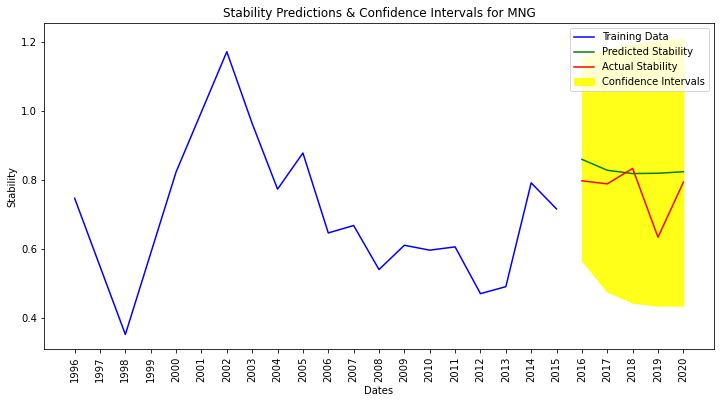

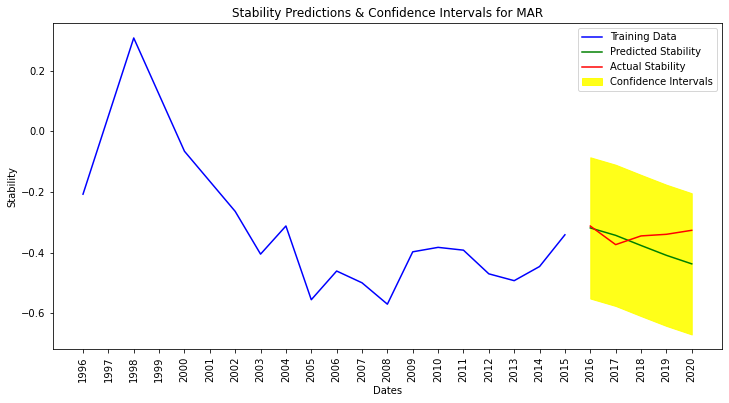

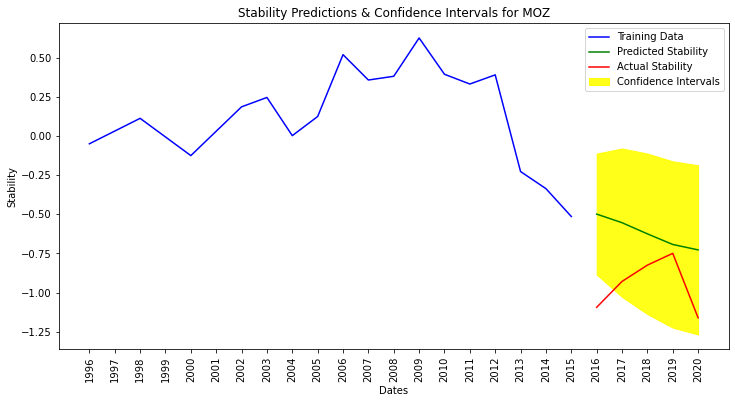

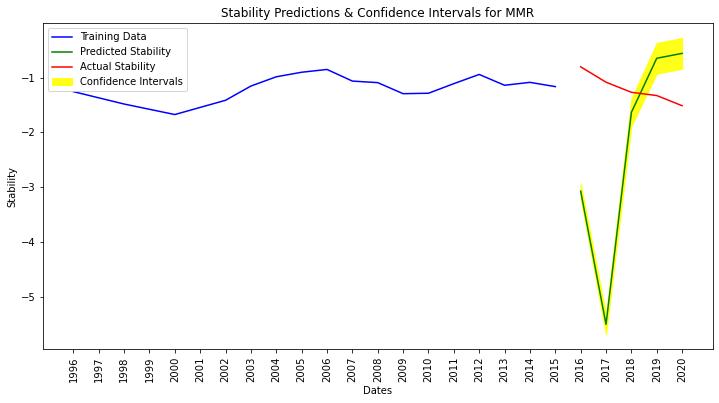

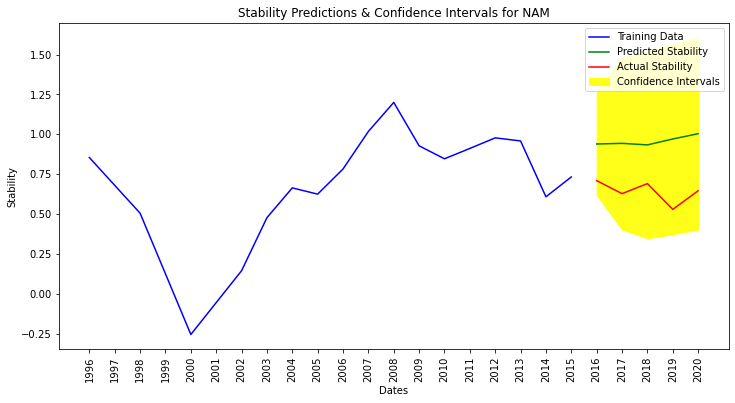

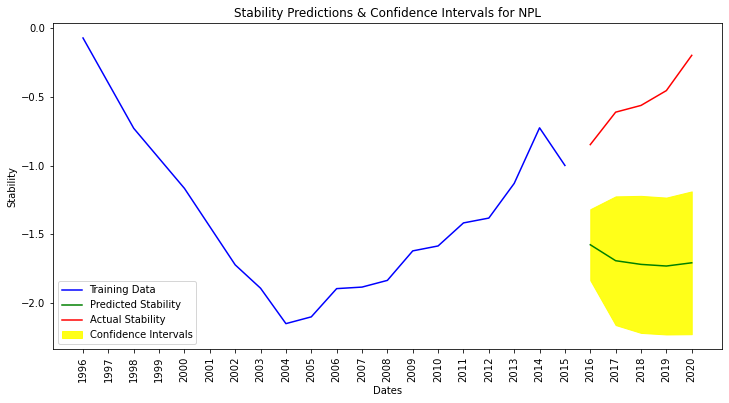

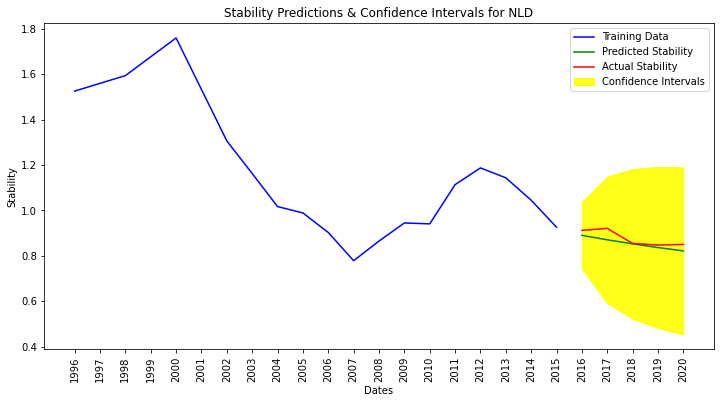

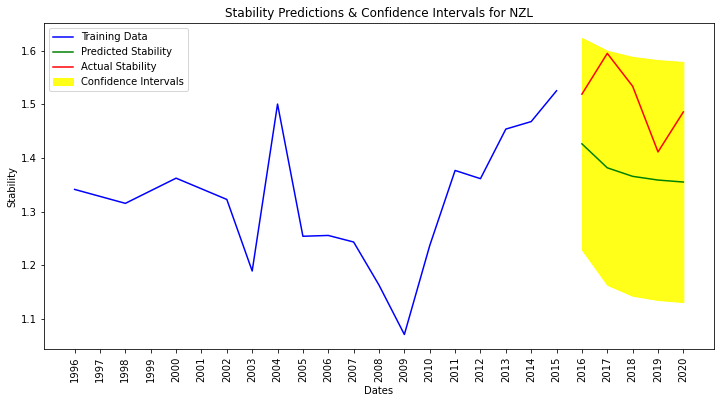

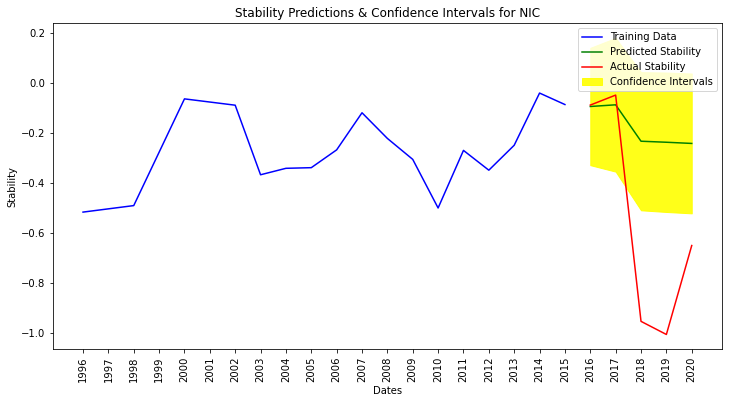

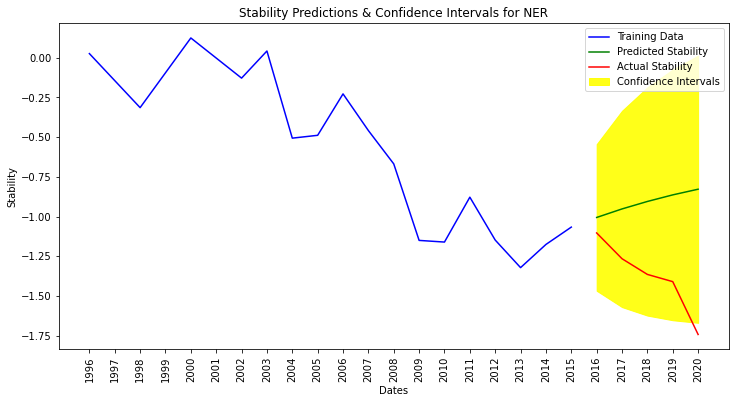

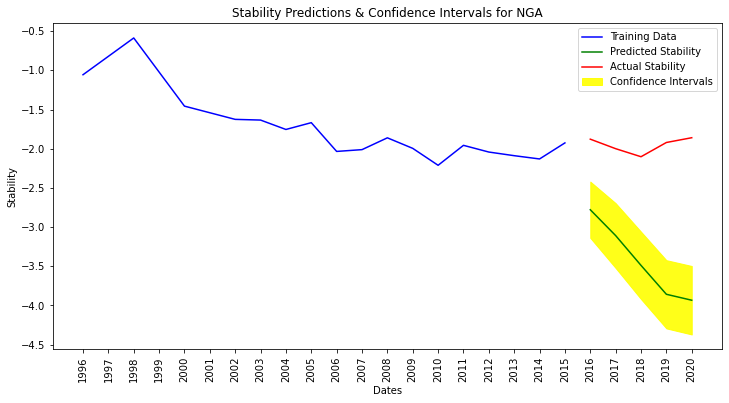

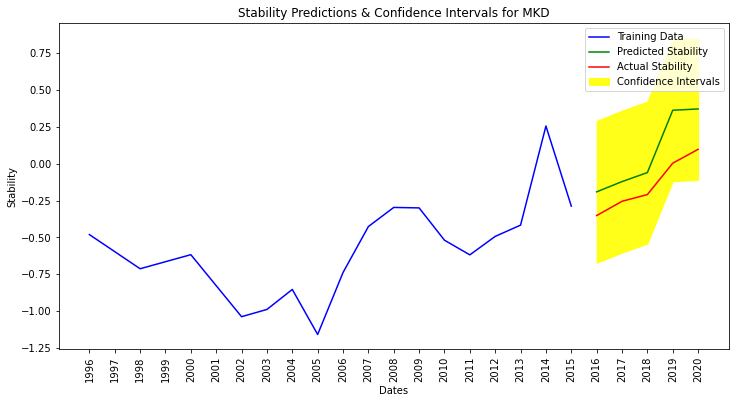

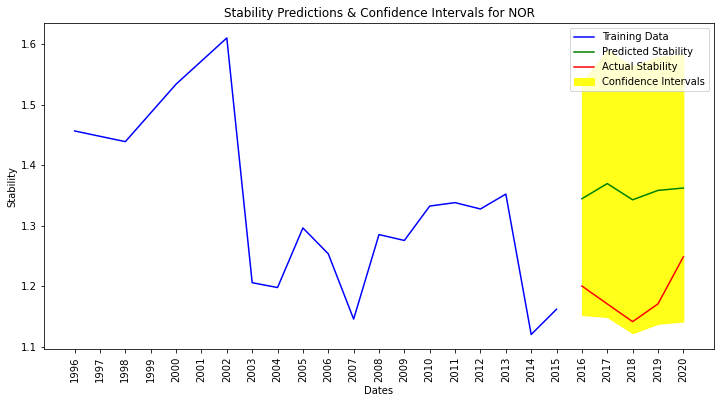

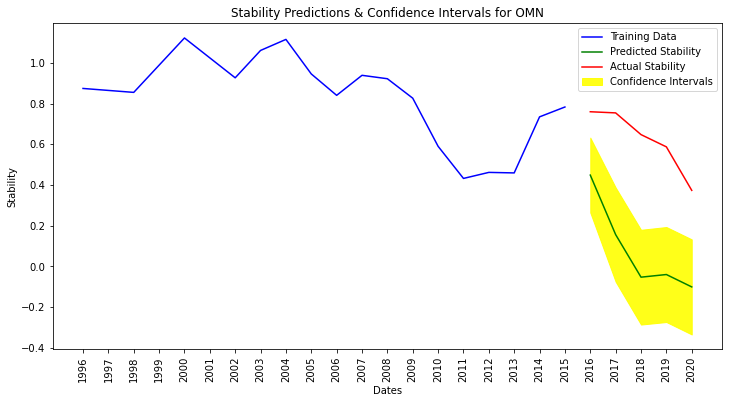

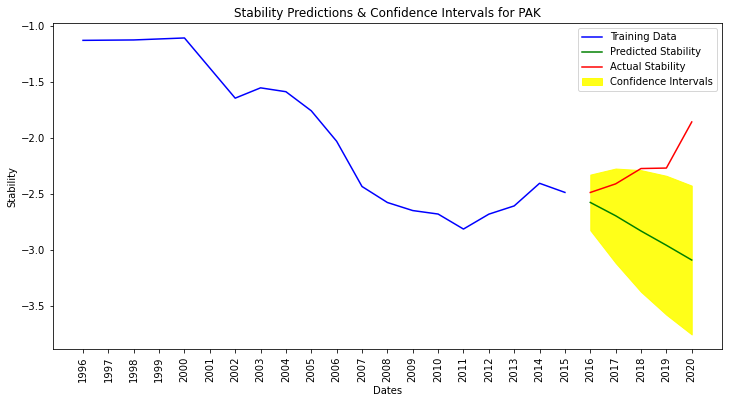

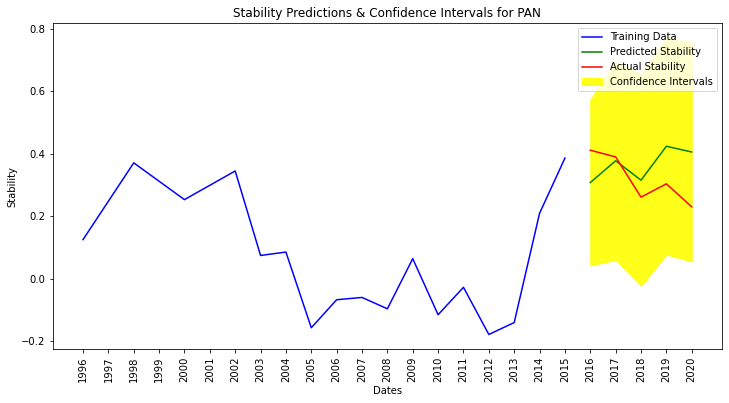

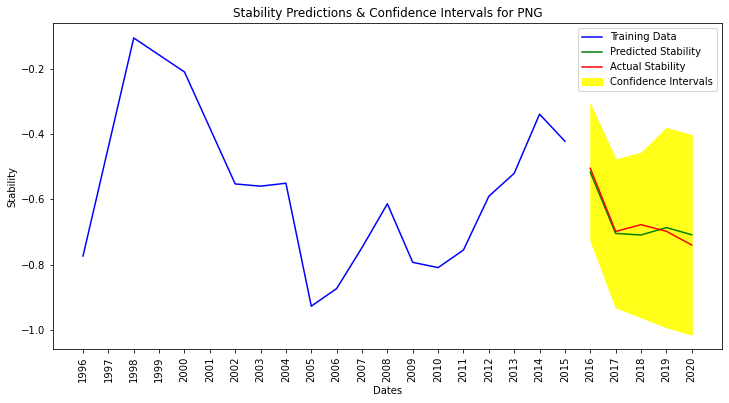

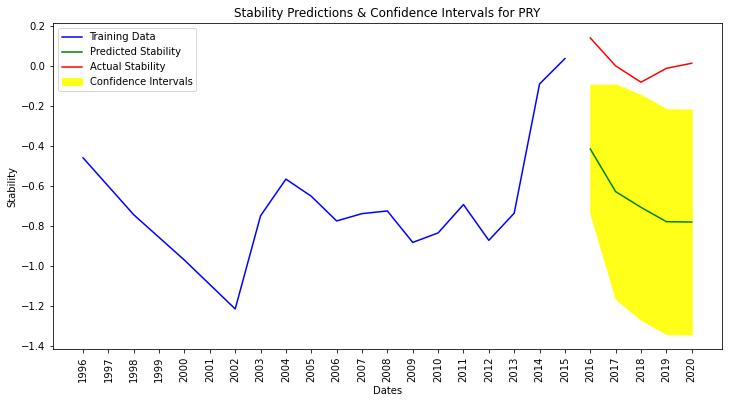

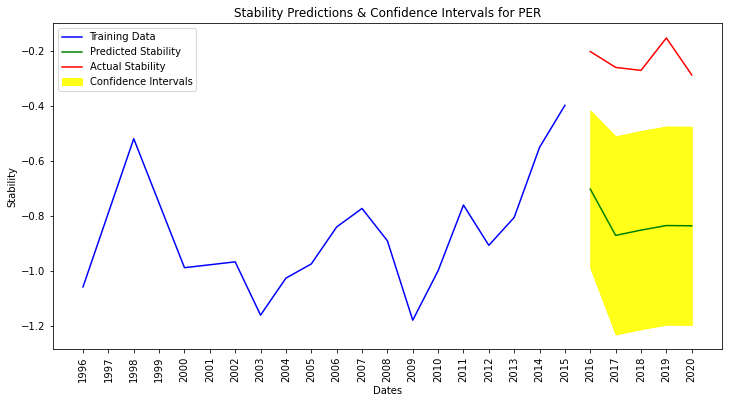

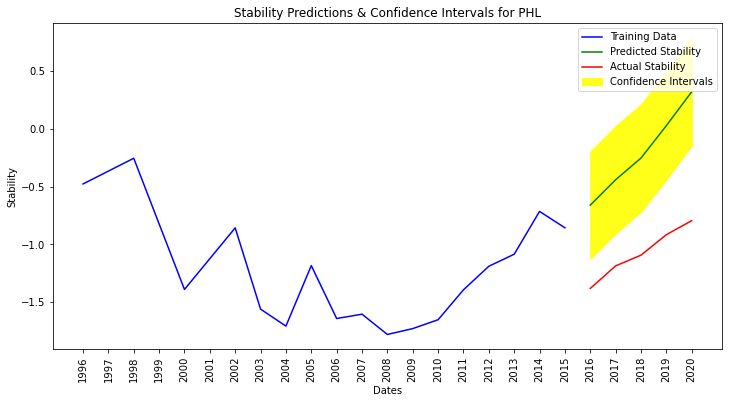

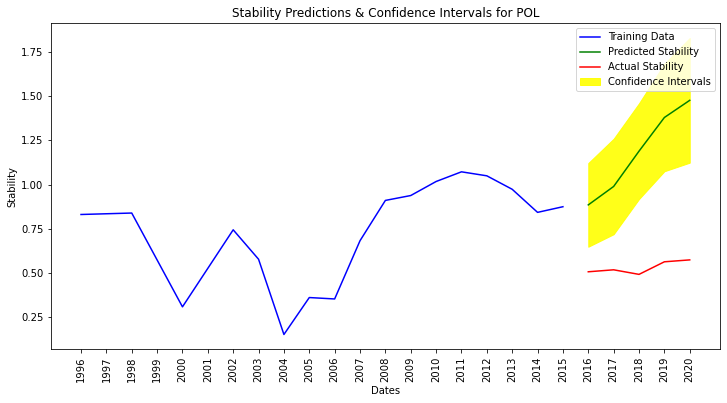

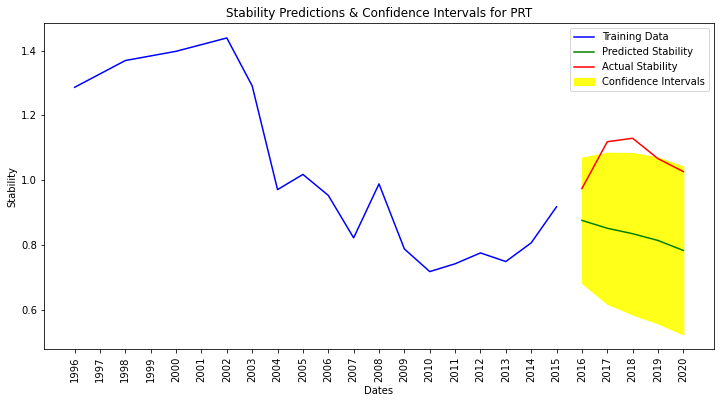

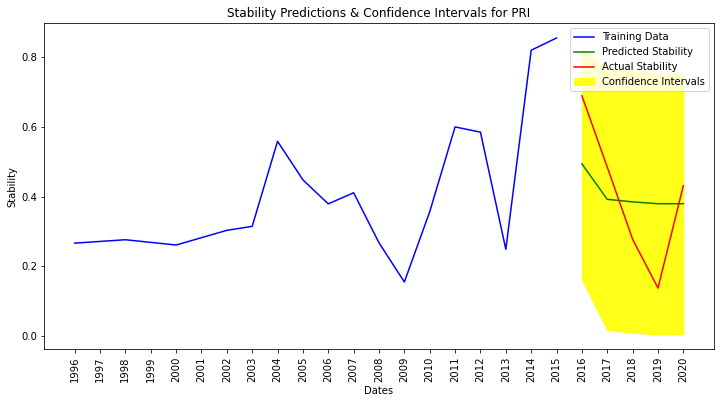

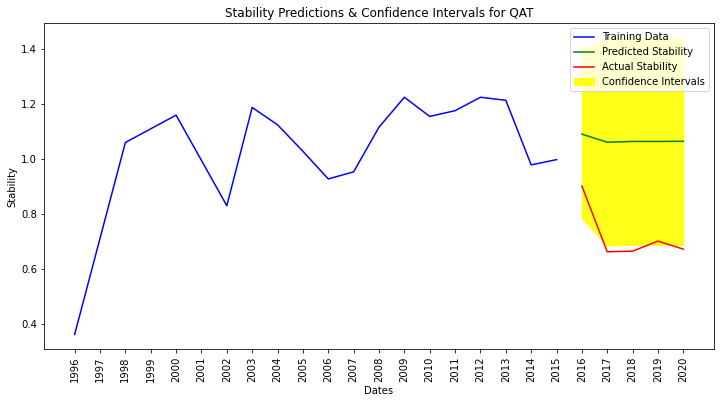

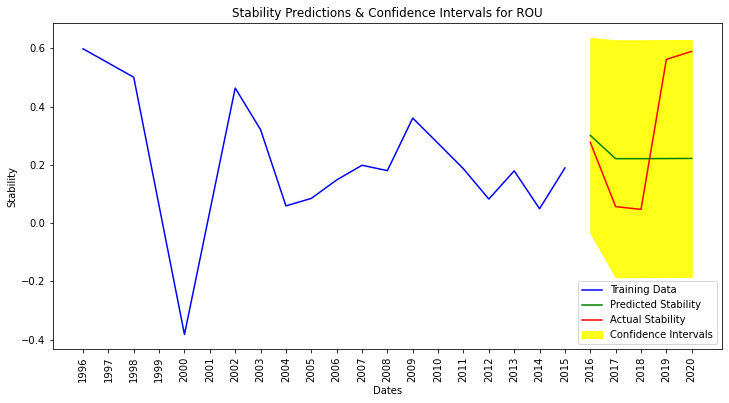

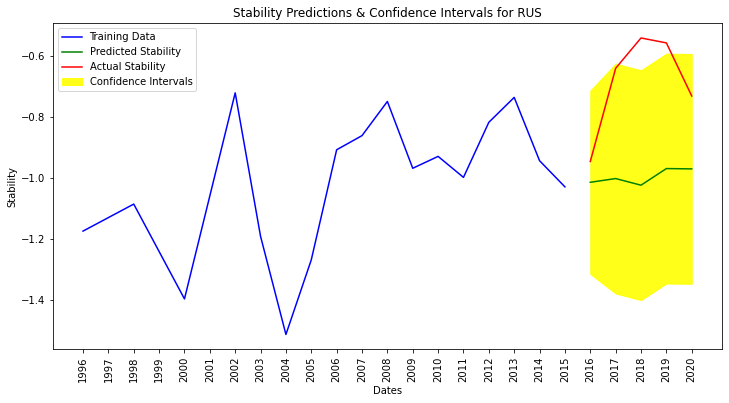

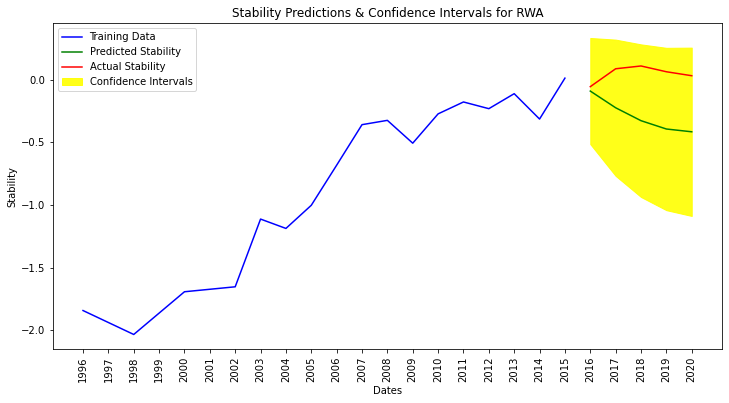

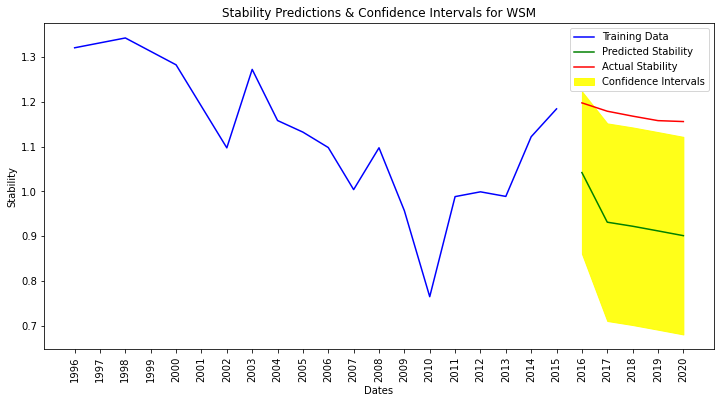

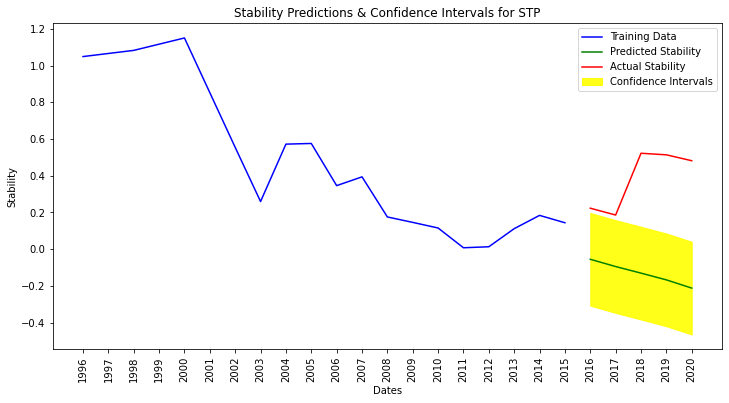

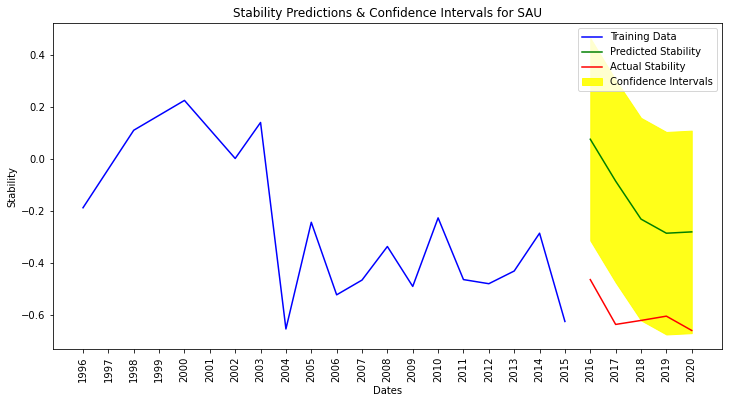

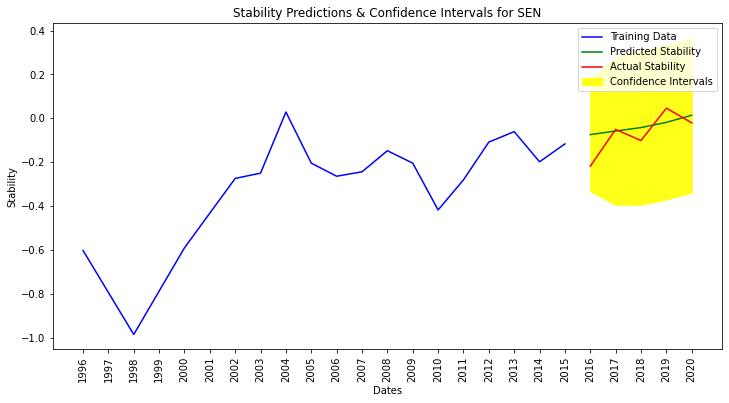

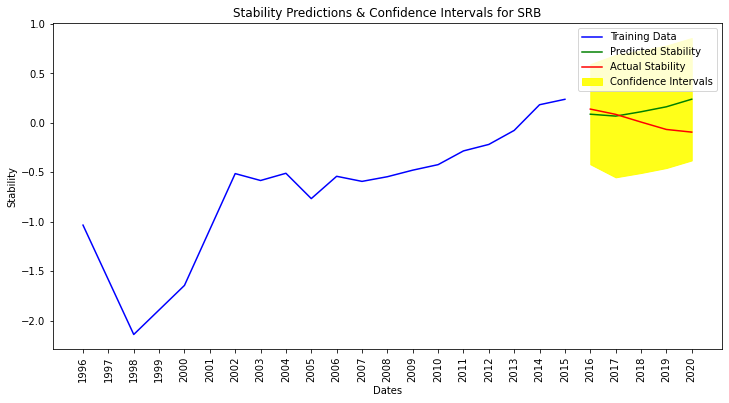

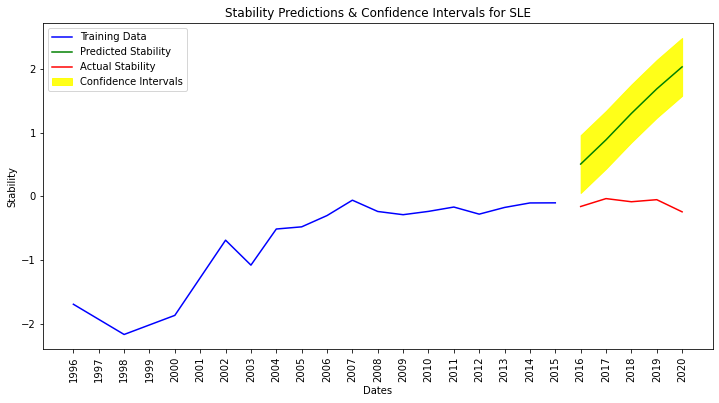

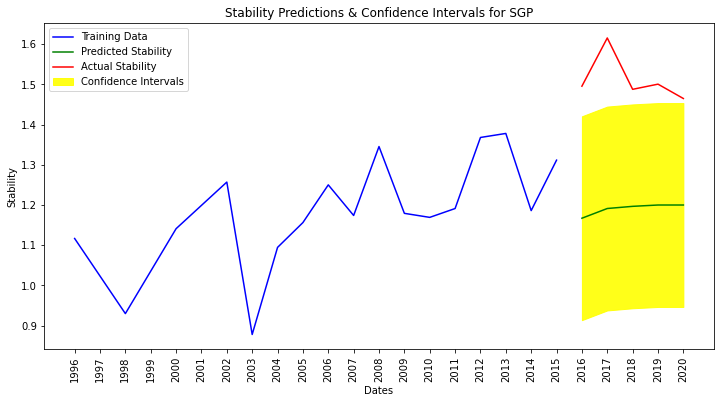

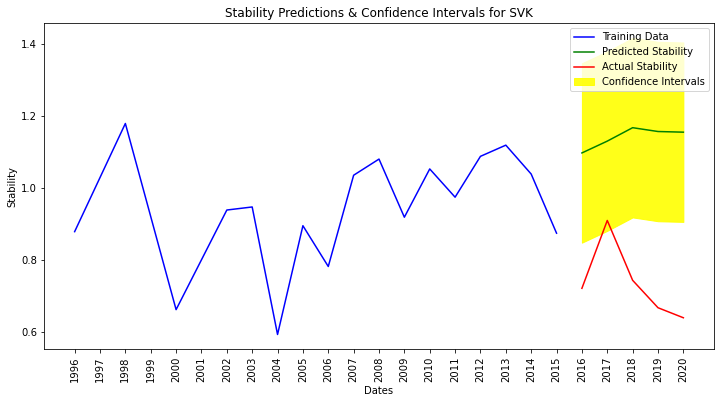

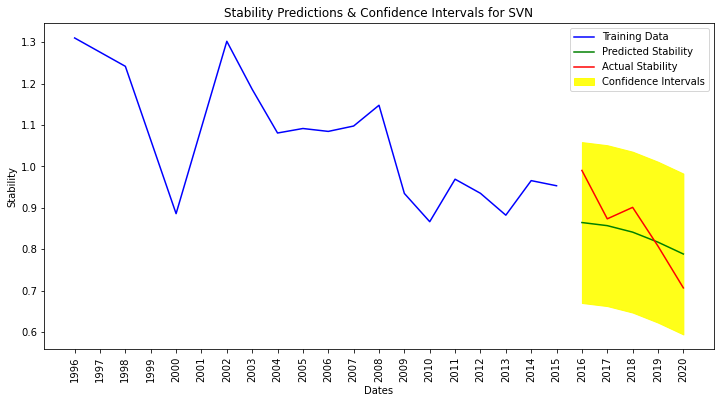

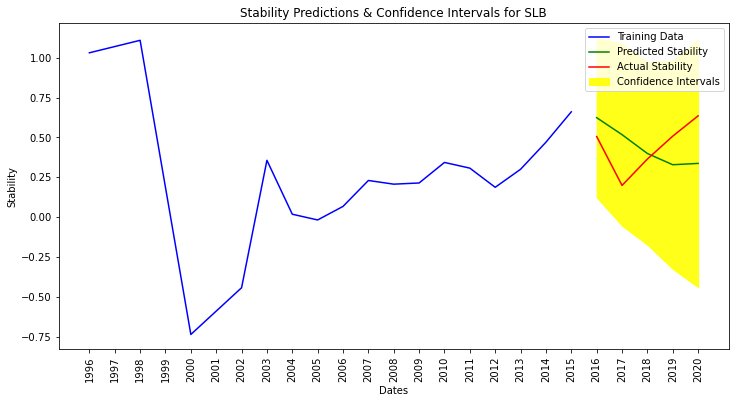

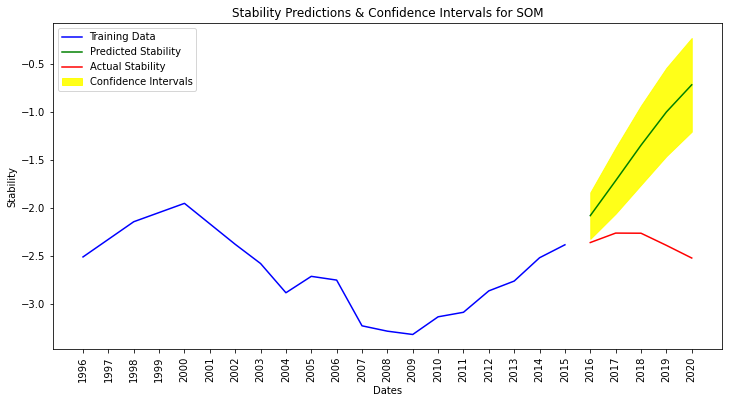

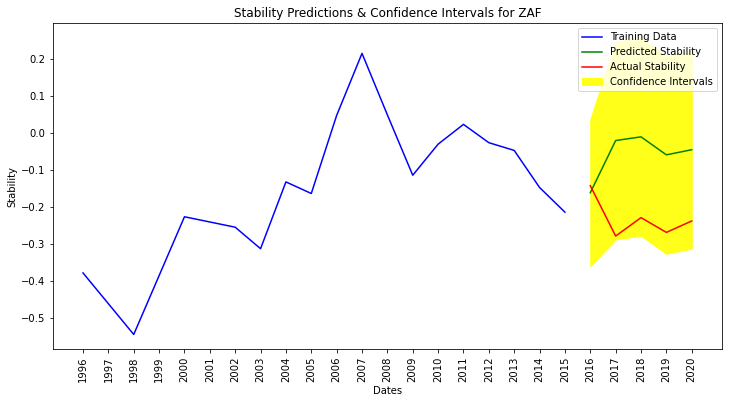

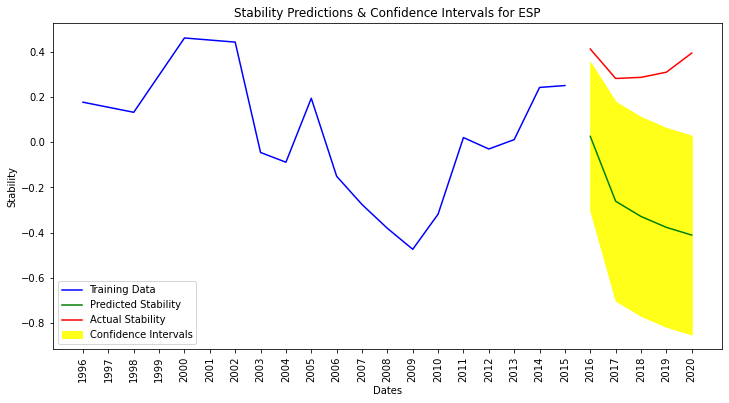

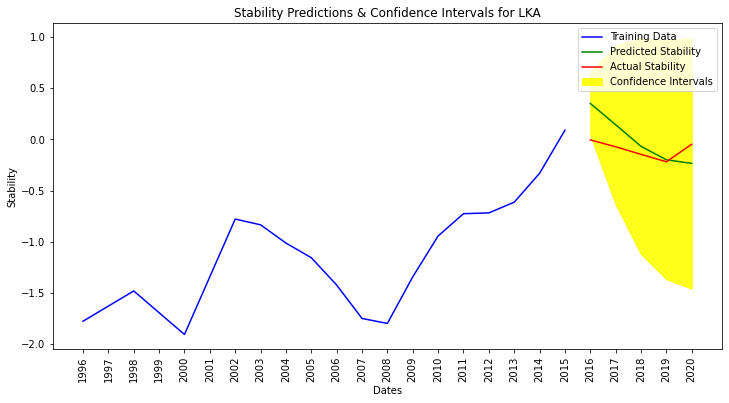

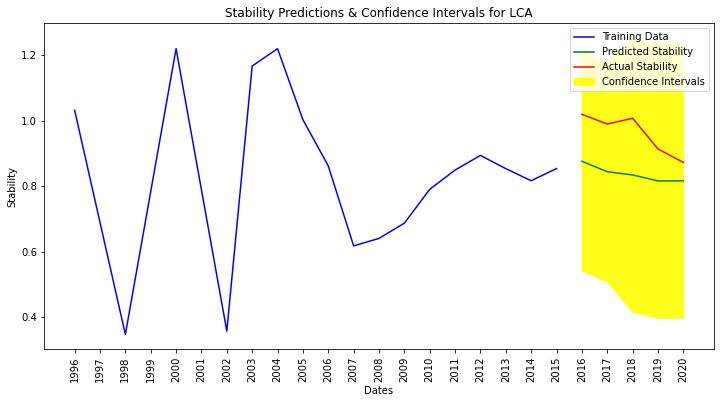

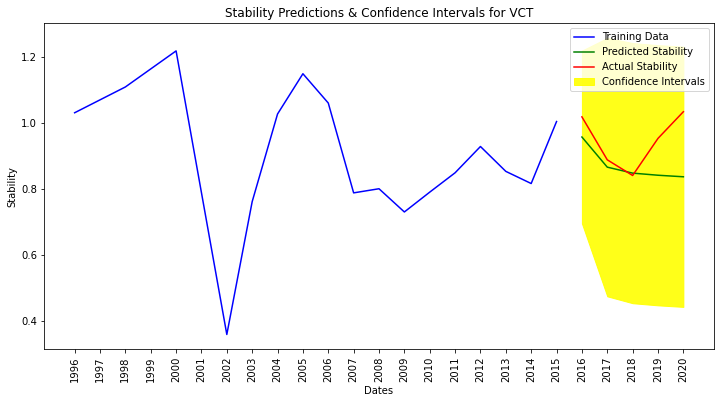

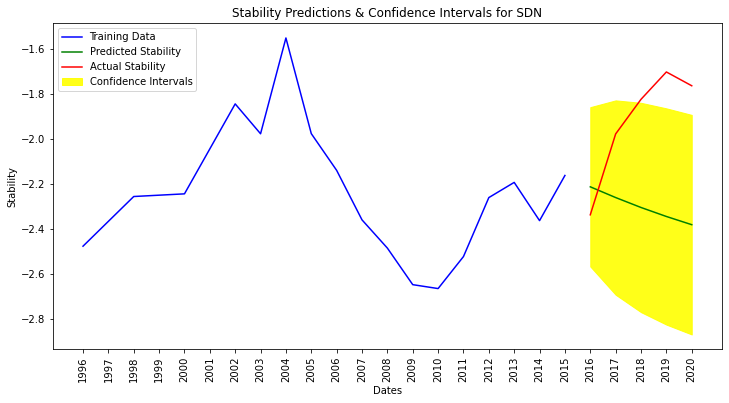

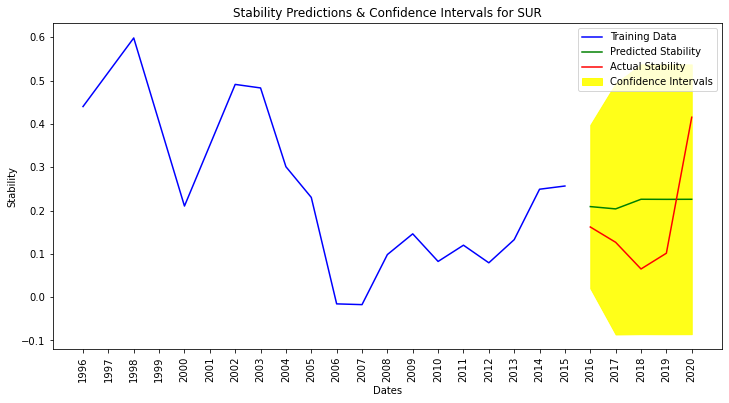

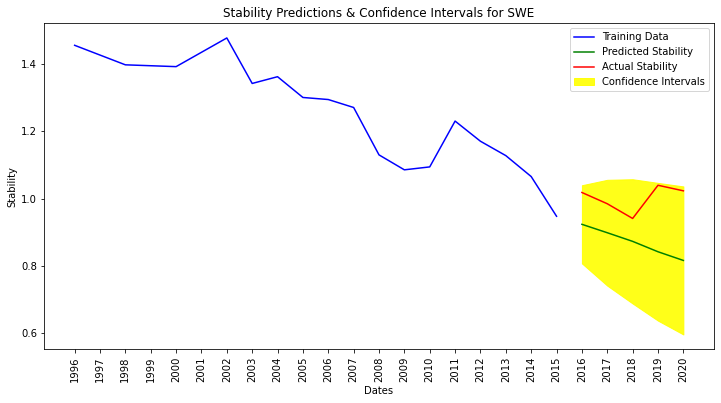

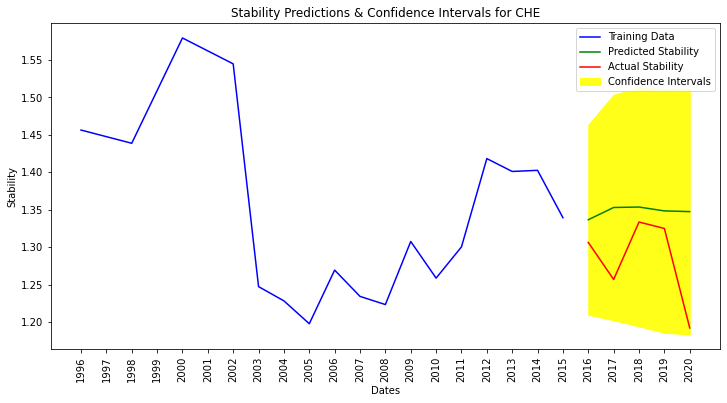

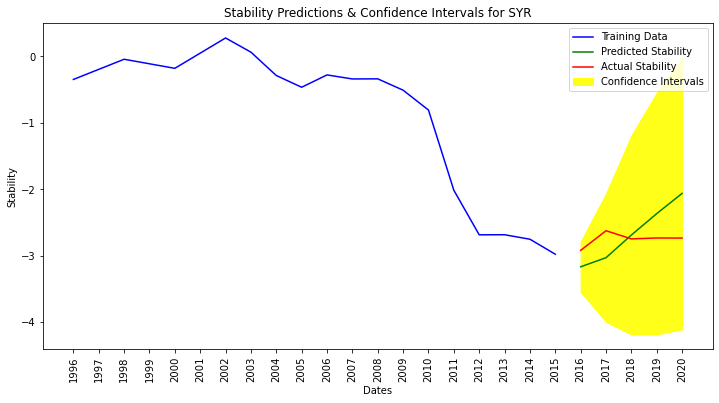

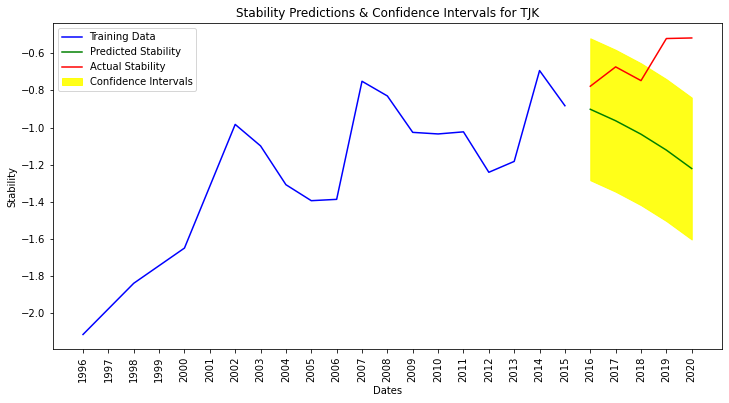

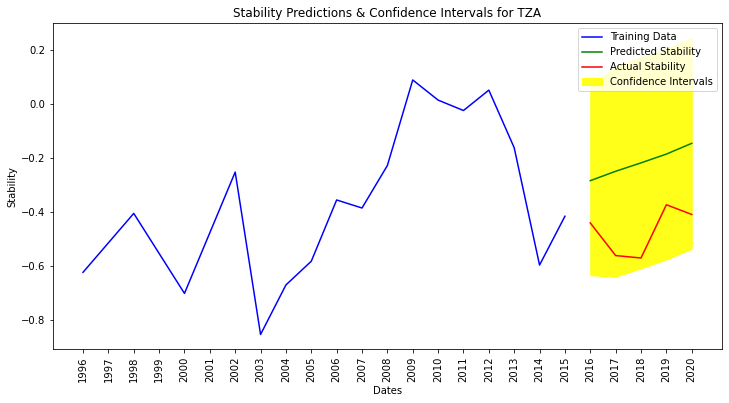

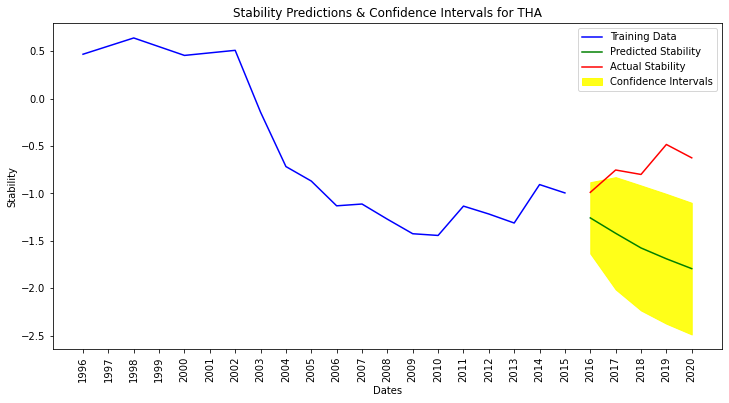

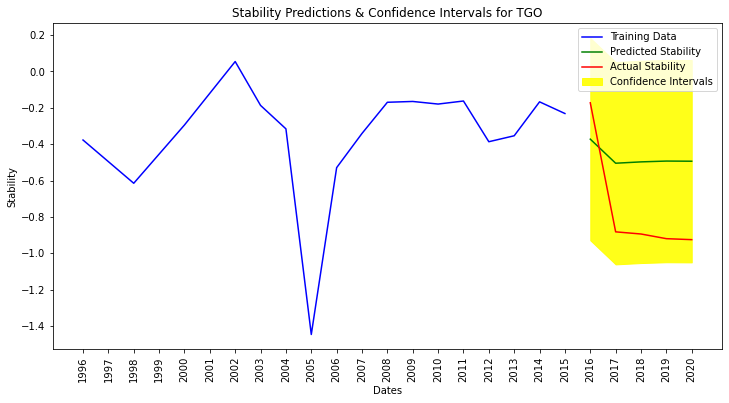

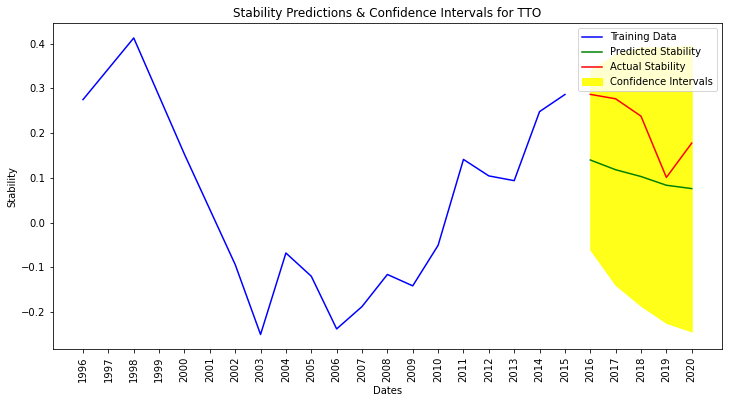

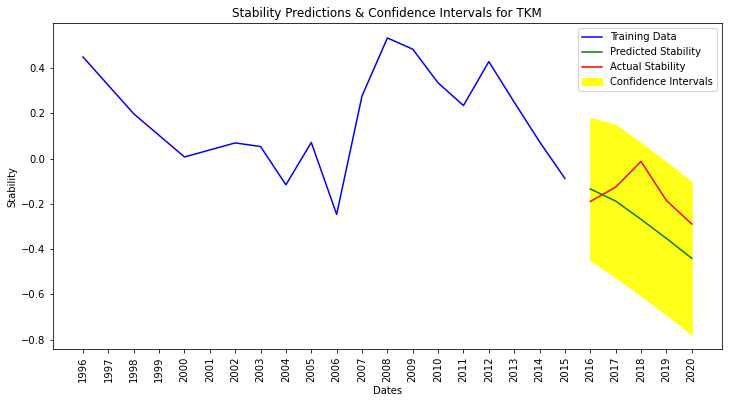

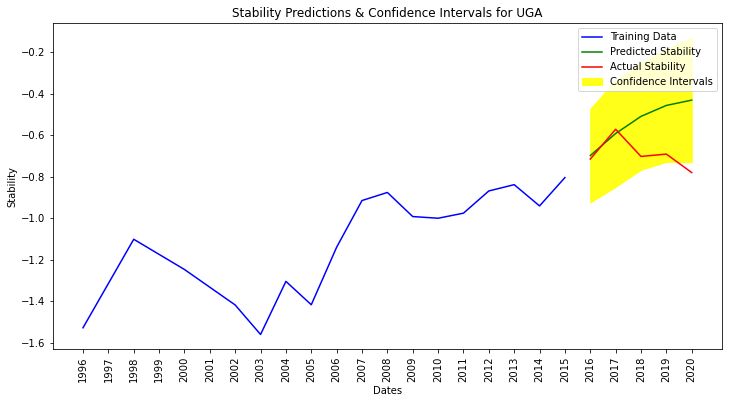

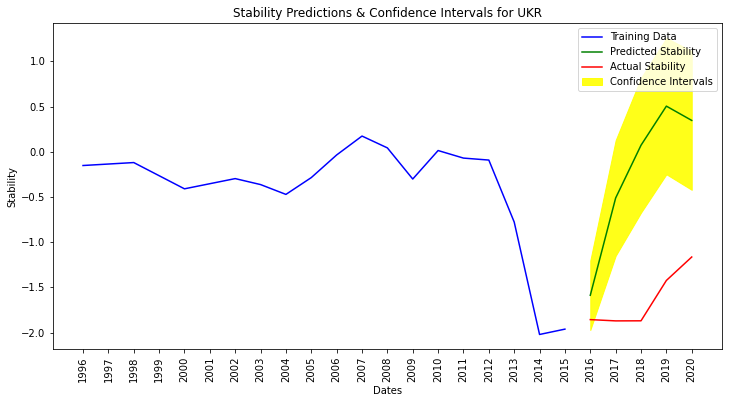

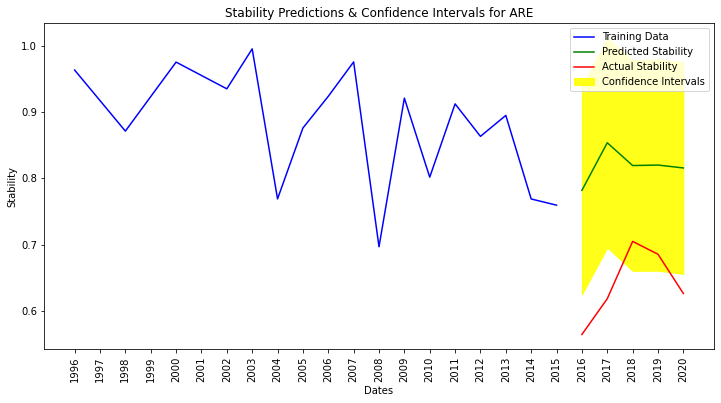

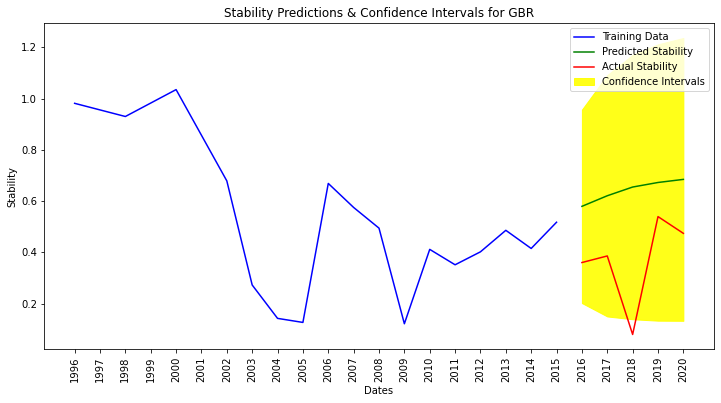

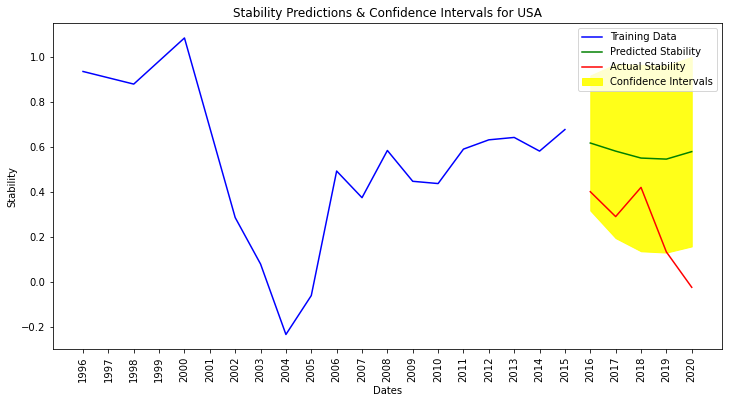

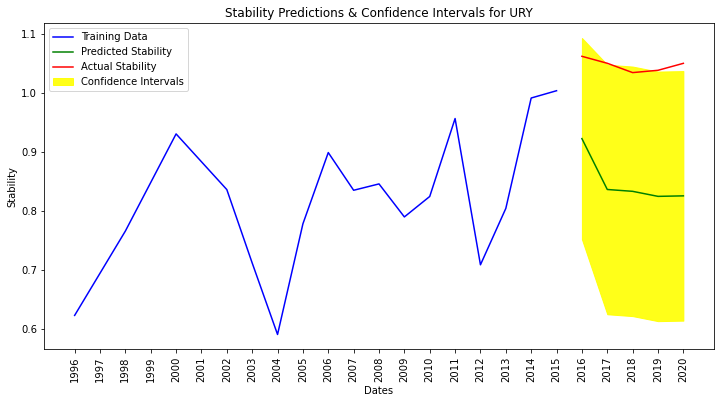

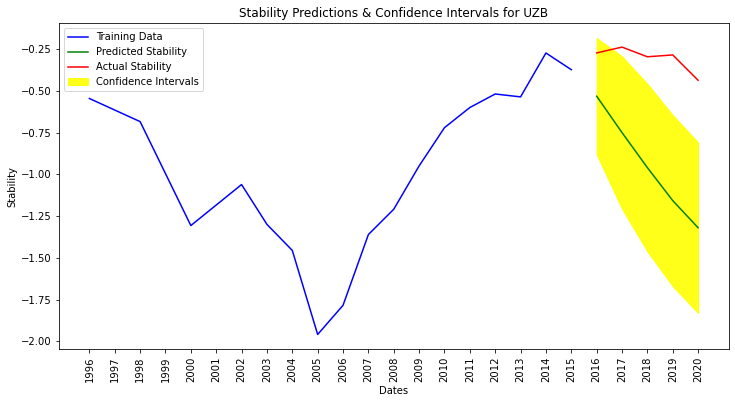

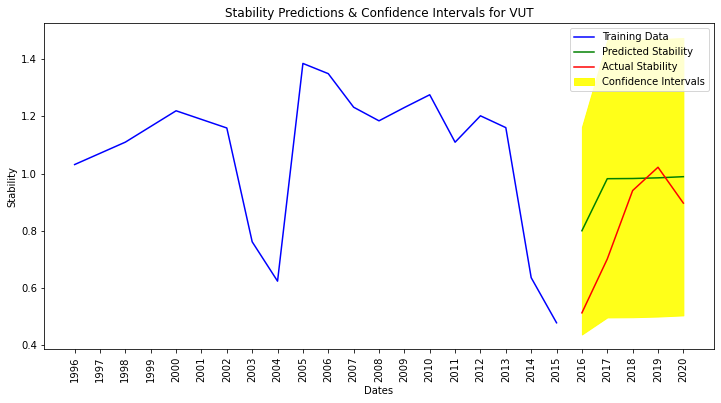

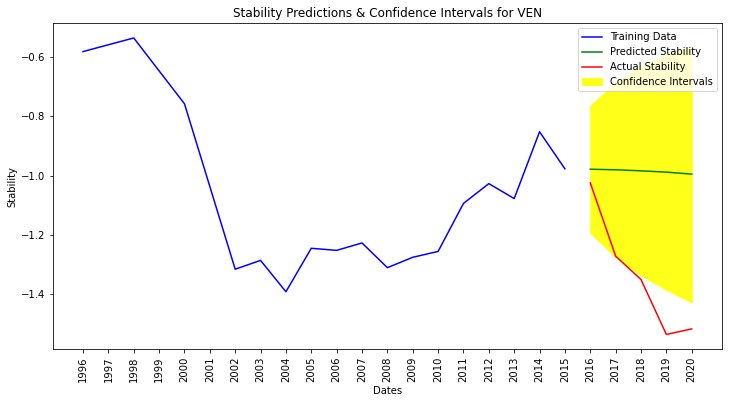

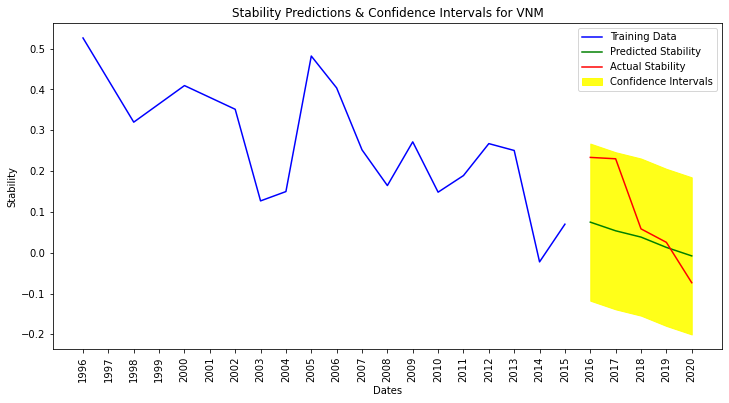

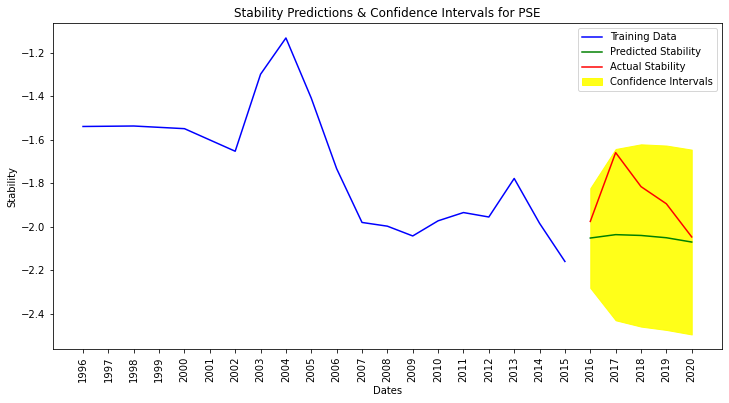

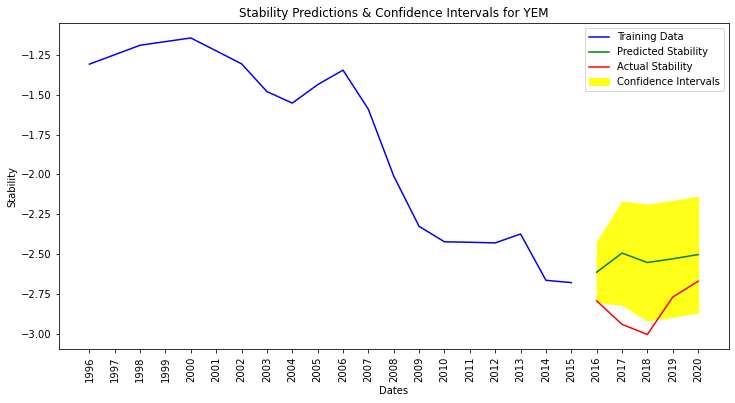

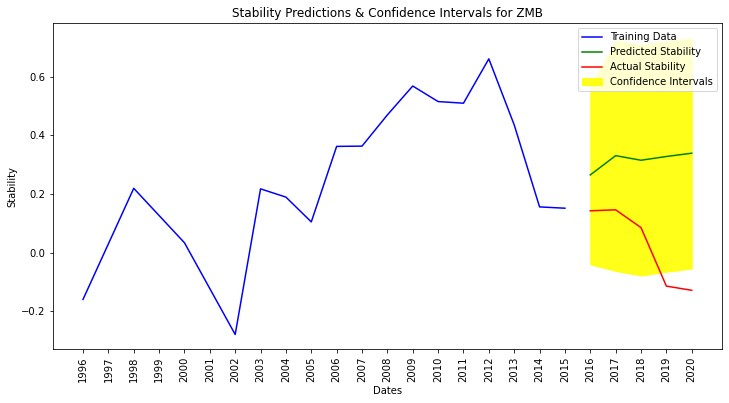

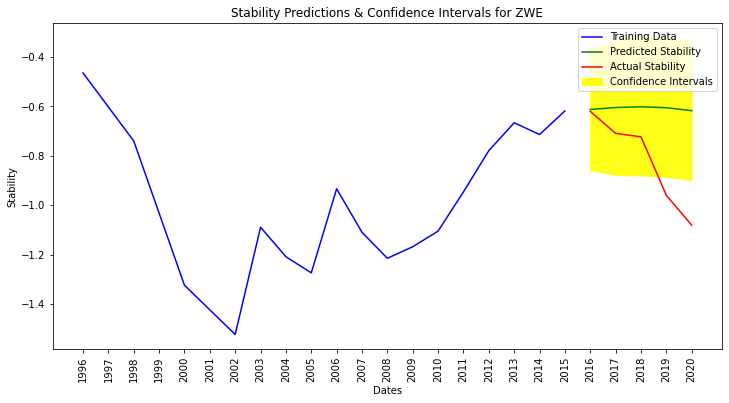

In [144]:
data = pick_country(country_names[:-1])

In [150]:
#dill.dump(data, open('stability_results.pkd', 'wb'))
data = dill.load(open('stability_results.pkd', 'rb'))

# Plotting on the map

In [41]:
# Import Libraries
import plotly.express as px

In [151]:
df = pd.DataFrame(data)

fig = px.choropleth(df, locations="iso_alpha",
                    color="Stability",
                    hover_name="country", # column to add to hover information
                    color_continuous_scale='Inferno')
fig.show()